# weCAN: A Cancer Survivability Predictor
## EDA and Feature Engineering

#### Author: Rahim Kaba
#### Contact: rkaba91@gmail.com
#### Date: Sept-Dec 2023

## Introduction:

In this notebook, we will be taking a look at the data we have prepared and cleaned for the weCAN Cancer Survivability Predictor in the data cleaning. We will be attempting to draw insights and conclusions from the EDA to direct our feature engineering, feature selection and modelling.

## Table of Contents
---
1. [Loading and Setup](#loadingandsetup)
2. [Data Assessment](#assessment)
3. [EDA](#eda)
4. [Feature Engineering (First Iteration)](#fa)
4. [Conclusions](#conclusions)

## Loading and Setup <a class="anchor" id="loadingandsetup"></a>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
#load the data, set saple ID as the index
df = pd.read_csv('/Users/RahimKaba/Desktop/Cancer_Survivability_Predictor/Data/cancer_data_clean.csv',index_col = 'Sample ID')

#drop the index that was added when the clean data was saved
df = df.drop(columns=['Unnamed: 0'])

## Data Assessment <a class="anchor" id="assessment"></a>

First we will refamiliarize ourselves with the cleaned data set

In [298]:
#check the shape of the data
df.shape

(25775, 46)

In [299]:
#inspect the fist 5 rows of the data set
df.head()

Age at Sequencing  Age at Surgical Procedure  \
Sample ID                                                         
P-0000004-T01-IM3              39.74                      37.03   
P-0000015-T01-IM3              44.44                      44.42   
P-0000024-T01-IM3              61.33                      61.00   
P-0000025-T02-IM5              74.81                      74.64   
P-0000026-T01-IM3              71.72                      71.58   

                          Cancer Type  \
Sample ID                               
P-0000004-T01-IM3       Breast Cancer   
P-0000015-T01-IM3       Breast Cancer   
P-0000024-T01-IM3  Endometrial Cancer   
P-0000025-T02-IM5  Endometrial Cancer   
P-0000026-T01-IM3  Endometrial Cancer   

                                                Cancer Type Detailed  \
Sample ID                                                              
P-0000004-T01-IM3                   Breast Invasive Ductal Carcinoma   
P-0000015-T01-IM3                   Breast Invasive Ductal Carcinoma   
P-0000024-T01-IM3                     Uterine Endometrioid Carcinoma   
P-0000025-T02-IM5  Uterine Serous Carcinoma/Uterine Papillary Ser...   
P-0000026-T01-IM3                     Uterine Endometrioid Carcinoma   

                  Distant Mets: Adrenal Gland Distant Mets: Biliary tract  \
Sample ID                                                                   
P-0000004-T01-IM3                          No                          No   
P-0000015-T01-IM3                          No                          No   
P-0000024-T01-IM3                          No                          No   
P-0000025-T02-IM5                         Yes                         Yes   
P-0000026-T01-IM3                          No                          No   

                  Distant Mets: Bladder/UT Distant Mets: Bone  \
Sample ID                                                       
P-0000004-T01-IM3                       No                Yes   
P-0000015-T01-IM3                       No                Yes   
P-0000024-T01-IM3                       No                Yes   
P-0000025-T02-IM5                       No                 No   
P-0000026-T01-IM3                       No                 No   

                  Distant Mets: Bowel Distant Mets: Breast  ...  \
Sample ID                                                   ...   
P-0000004-T01-IM3                  No                   No  ...   
P-0000015-T01-IM3                  No                   No  ...   
P-0000024-T01-IM3                  No                   No  ...   
P-0000025-T02-IM5                 Yes                   No  ...   
P-0000026-T01-IM3                 Yes                   No  ...   

                  Primary Tumor Site                  Race Category  \
Sample ID                                                             
P-0000004-T01-IM3             Breast                          White   
P-0000015-T01-IM3             Breast                          White   
P-0000024-T01-IM3             Uterus                          White   
P-0000025-T02-IM5             Uterus                          White   
P-0000026-T01-IM3             Uterus  Asian-far east/indian subcont   

                  Sample coverage Sample Type     Sex                 Subtype  \
Sample ID                                                                       
P-0000004-T01-IM3             428     Primary  Female  Breast Ductal HR+HER2-   
P-0000015-T01-IM3             281  Metastasis  Female  Breast Ductal HR+HER2-   
P-0000024-T01-IM3            1016  Metastasis  Female    Uterine Endometrioid   
P-0000025-T02-IM5            1147  Metastasis  Female          Uterine Serous   
P-0000026-T01-IM3            1222  Metastasis  Female    Uterine Endometrioid   

                  Subtype Abbreviation TMB (nonsynonymous) Tumor Purity  \
Sample ID                                                                 
P-0000004-T01-IM3         IDC HR+HER2-            4.436621         50.0   

In [300]:
#Display the info of the data set to check the null values and data types - there should be no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25775 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age at Sequencing              25775 non-null  float64
 1   Age at Surgical Procedure      25775 non-null  float64
 2   Cancer Type                    25775 non-null  object 
 3   Cancer Type Detailed           25775 non-null  object 
 4   Distant Mets: Adrenal Gland    25775 non-null  object 
 5   Distant Mets: Biliary tract    25775 non-null  object 
 6   Distant Mets: Bladder/UT       25775 non-null  object 
 7   Distant Mets: Bone             25775 non-null  object 
 8   Distant Mets: Bowel            25775 non-null  object 
 9   Distant Mets: Breast           25775 non-null  object 
 10  Distant Mets: CNS/Brain        25775 non-null  object 
 11  Distant Mets: Distant LN       25775 non-null  object 
 12  Distant Mets: Female Ge

**Observations**

The above is the summary of the imported cleaned data set with 25,775 entries and 46 features. Previous to this, the original data set was processed and cleaned to filter out initally apparent redundant columns and to replace null values with useful values.  What you see above is the cleaned version of the data set.

The original data set contained 25,775 rows and 55 features. There were no duplicated columns or rows, however there were columns removed that showed full correlation.  There were also 14 columns with null values that were either dropped or filled in during cleaning. There are now 34 object columns, 3 integer columns, 8 float columns and 1 bool column.  Further processing may be needed as we get to the modeling phase of the project.  There are no more missing values. The original data set was retained and can be loaded if dropped features and replaced values are needed in the future.

In [301]:
#Lets take a look at the statistical properties of the numerical columns
df.describe()

Age at Sequencing  Age at Surgical Procedure  Fraction Genome Altered  \
count       25775.000000               25775.000000             25775.000000   
mean           62.306086                  61.507243                 0.194728   
std            12.833110                  12.930445                 0.191612   
min            18.290000                  17.160000                 0.000000   
25%            54.450000                  53.550000                 0.029900   
50%            63.660000                  62.810000                 0.142800   
75%            71.430000                  70.630000                 0.305400   
max            90.000000                  90.000000                 1.000000   

          Met Count  Met Site Count     MSI Score  Overall Survival (Months)  \
count  25775.000000    25775.000000  25775.000000               25775.000000   
mean       3.857187        3.011988      1.285071                  22.133393   
std        3.736549        2.579182      4.635787                  17.657943   
min        0.000000        0.000000     -1.000000                   0.000000   
25%        1.000000        1.000000      0.000000                   8.480000   
50%        3.000000        2.000000      0.230000                  17.540000   
75%        6.000000        5.000000      0.860000                  33.020000   
max       31.000000       15.000000     53.440000                  80.890000   

       Sample coverage  TMB (nonsynonymous)  Tumor Purity   Average Age  
count     25775.000000         25775.000000  25775.000000  25775.000000  
mean        660.395267             7.954993     39.735375     62.303043  
std         212.485348            19.447016     20.516239     12.791423  
min         100.000000             0.000000      0.000000     18.296667  
25%         526.000000             2.218311     20.000000     54.435000  
50%         653.000000             4.323490     40.000000     63.655000  
75%         790.000000             6.917585     50.000000     71.347500  
max        2778.000000           654.576458    100.000000     90.000000

There are 11 numerical columns. The above shows a summary of core statistics for these columns:
- `Count`: Number of entries
- `Mean`: Average value down the colum
- `std`: The standard deviation
- `min`: The minimum value found in that column
- `Percentiles`: The upper, middle and lower percentile values of the data
- `max`: The max value of that column

## EDA <a class="anchor" id="eda"></a>

Lets split up the numerical and categorical columns for ease of EDA

In [5]:
numerical_columns = df.select_dtypes(include = ['int64', 'float64'])
categorical_columns = df.select_dtypes(include = ['object'])

First we are going to explore the numerical columns

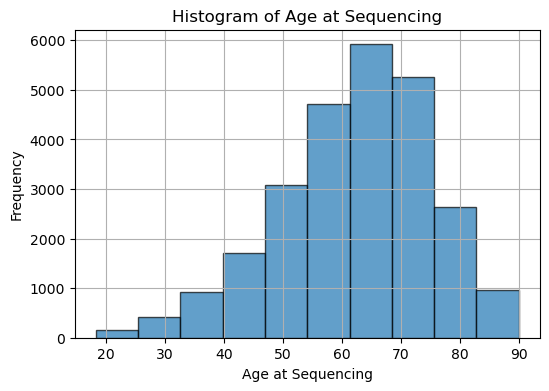

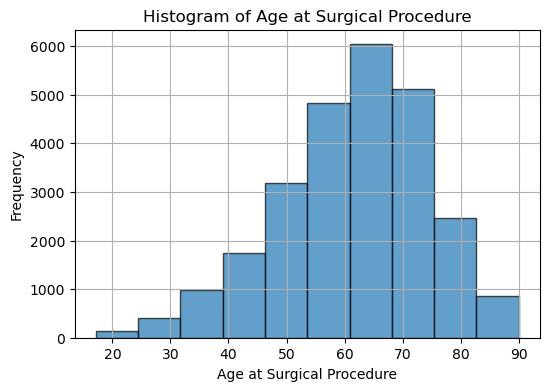

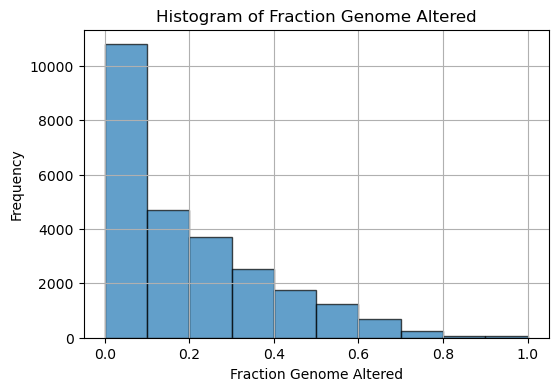

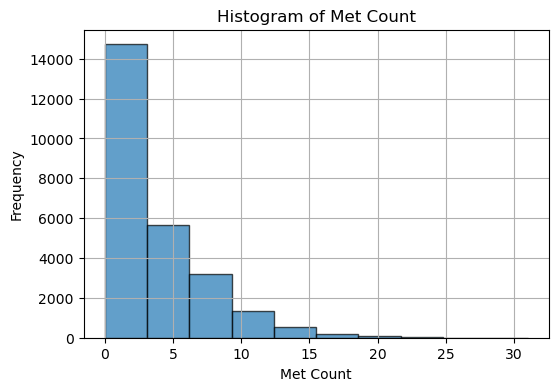

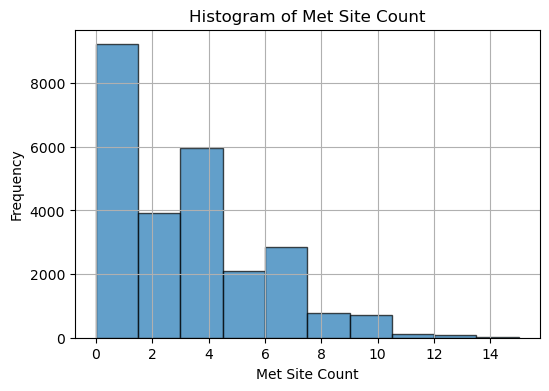

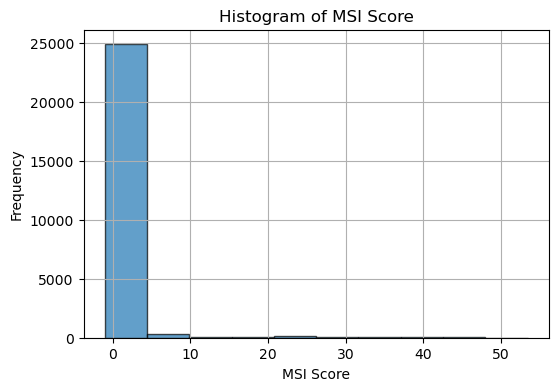

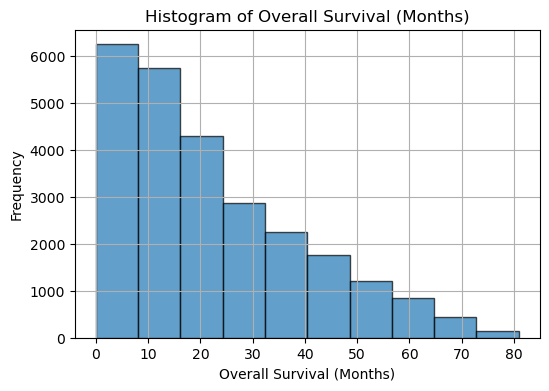

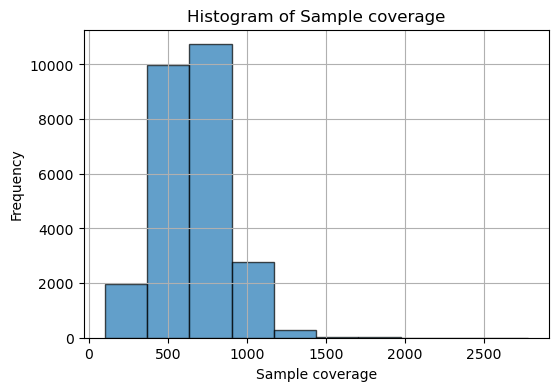

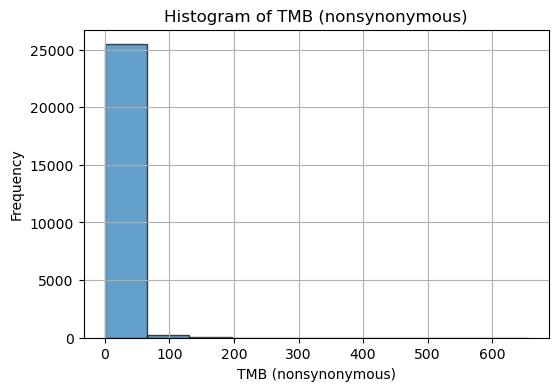

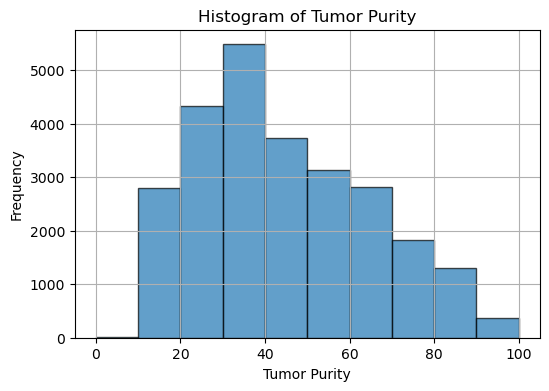

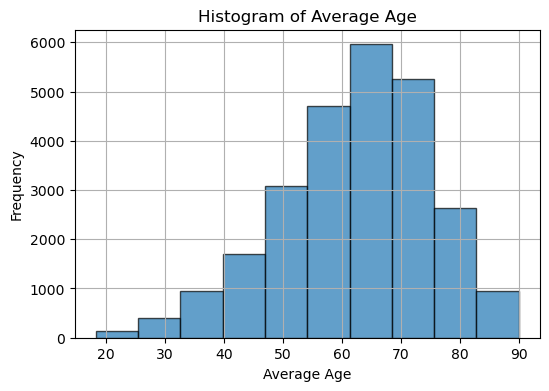

In [303]:
for column in numerical_columns.columns:
    plt.figure(figsize=(6, 4))  
    plt.hist(df[column], bins=10, edgecolor='k', alpha=0.7)  
    plt.title(f'Histogram of {column}') 
    plt.xlabel(column) 
    plt.ylabel('Frequency') 
    plt.grid(True)
    plt.show()  

**Findings:**

There are 11 numerical columns for which I have plotted the histogram distribution above.

There are some distributions to note:
- `Age at Sequencing`,`Age at Surgical Procedure`,`Average Age` are the age columns which are all normally distributed with a slight skew to the left. This makes sense as variation in ages will remain the same throughout the study so if they start out normally distributed, they will remain that way.
- `Fractional Fenome Altered`, `Met Count`, `Met Site Count`, `Overall Survival (months)` are very right (positively) skewed - meaning most of their values fall in the lower end of their range 
- `Sample coverage` seems to have a left shifted normal distribution
- `MSI score` and `TMB` do not have a very wide distribution most values are clustered in the lower range.
- The target variable `Overall Survival (Months)` has a right skew. There are a lot of different values in this feature and it moving forward I will categorize these into year groups that hold a certain number of years. More on this in the feature engineering.



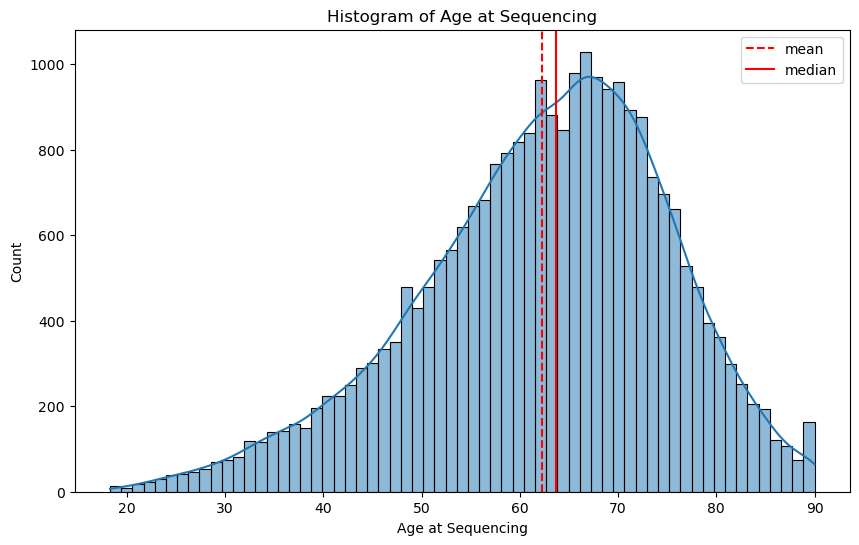

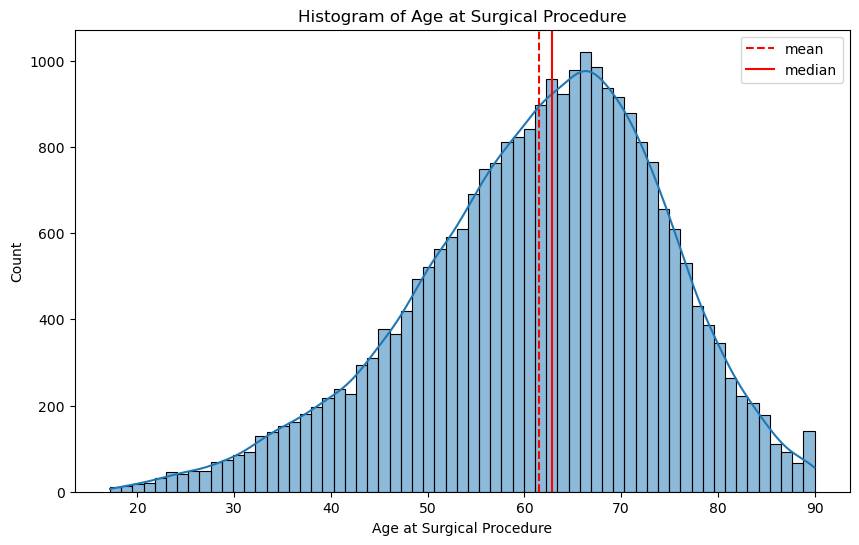

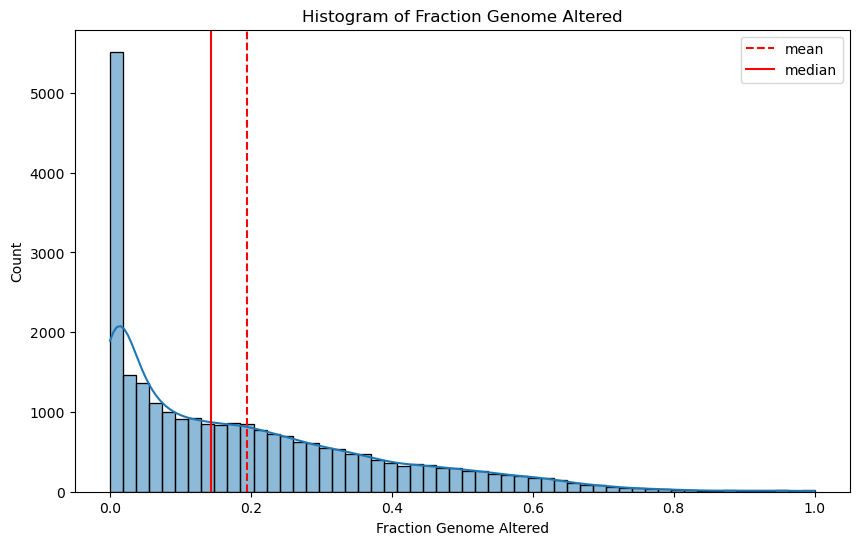

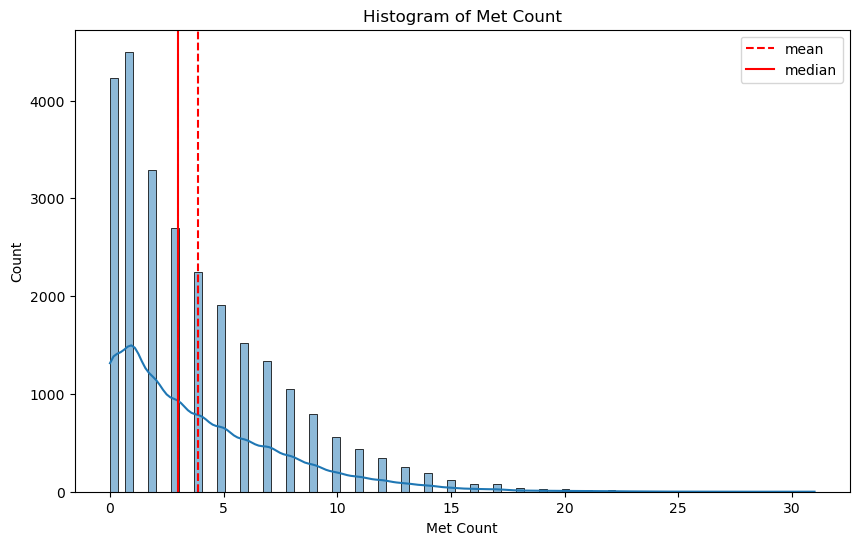

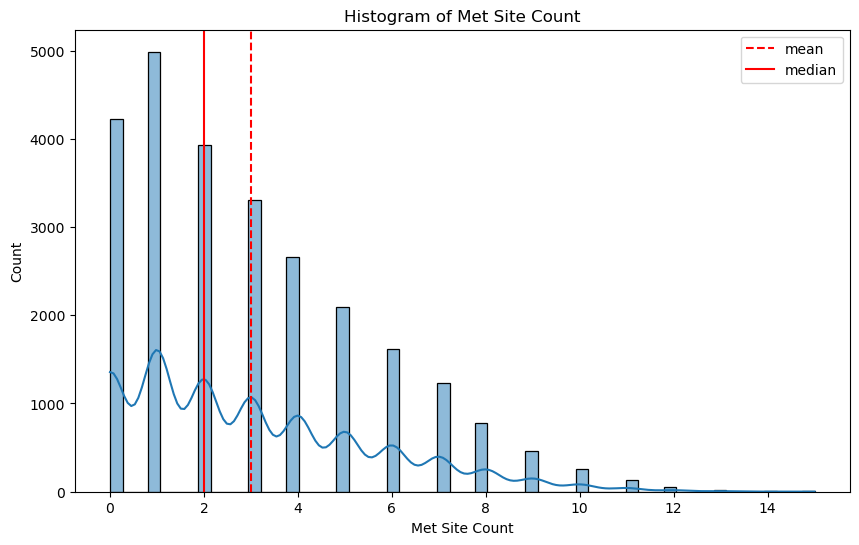

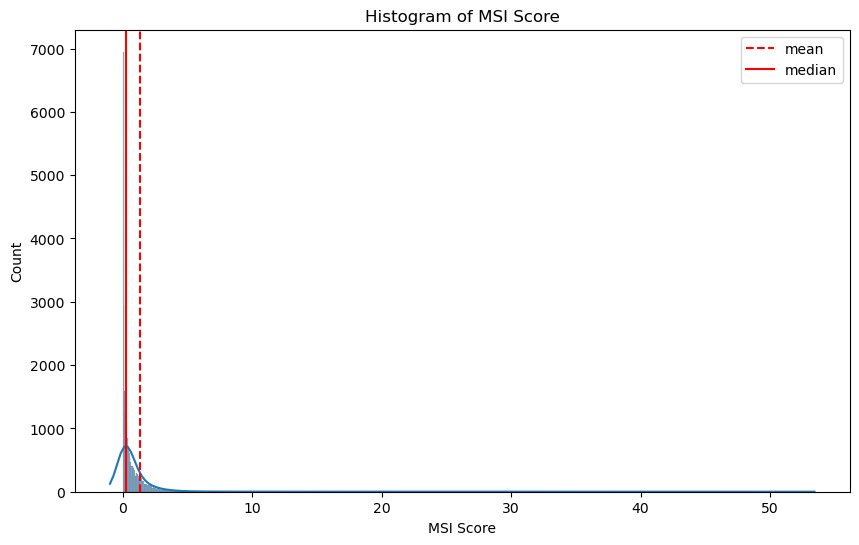

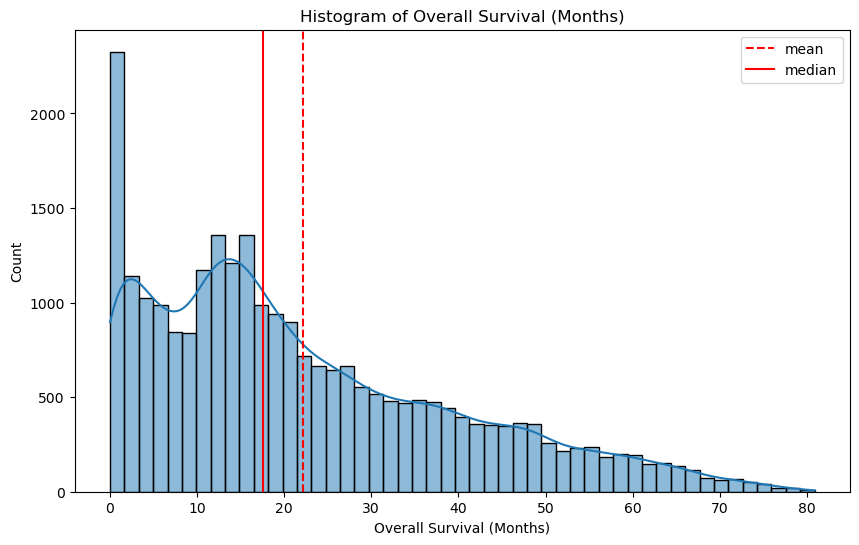

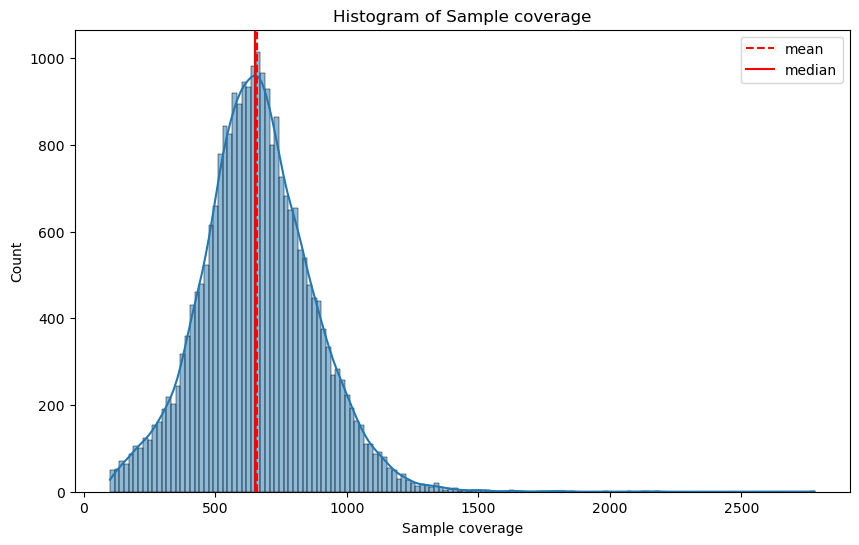

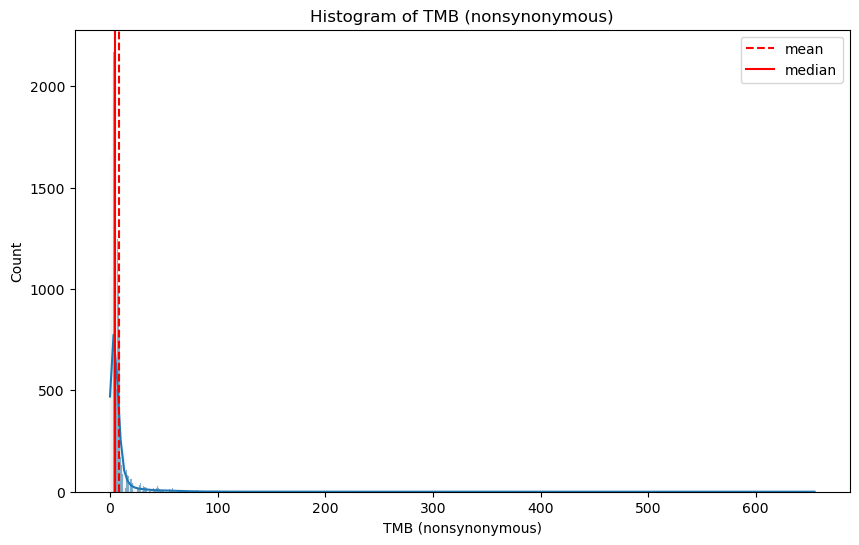

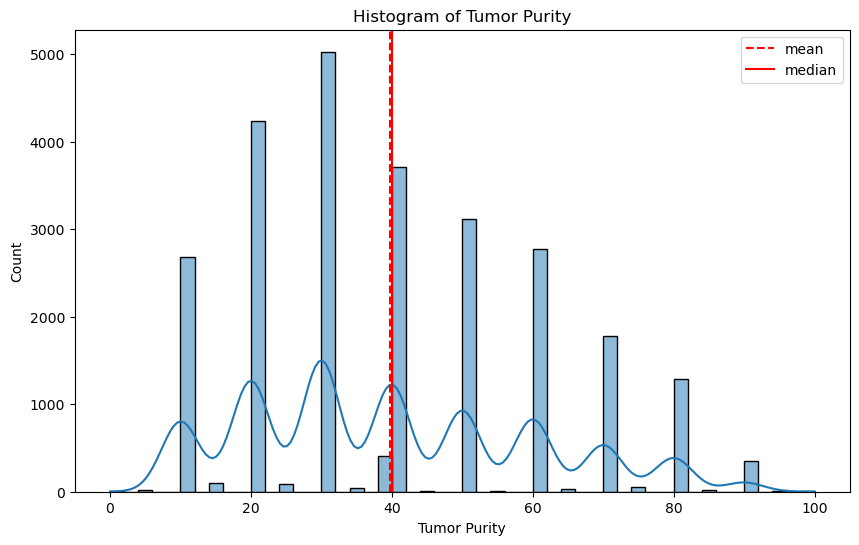

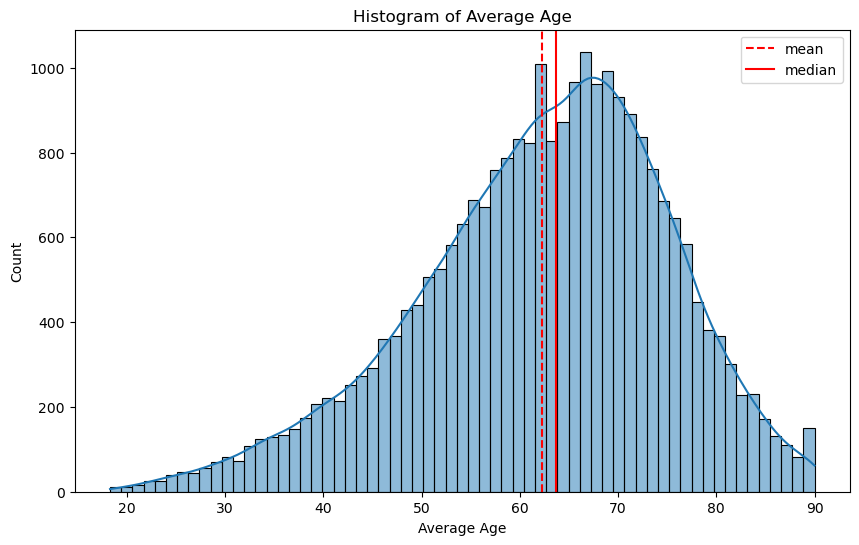

In [304]:
# another way to visualize using seaborn
for column in numerical_columns.columns:

    column_mean=df[column].mean()
    column_median=df[column].median()

# Plot a histogram of the numerical columns, with lines marking mean and median
###
    plt.figure(figsize=(10,6))
    sns.histplot(df[column], kde=True)
    plt.axvline(column_mean, label='mean',color='r',linestyle='--')
    plt.axvline(column_median, label='median', color='r')
    plt.title(f'Histogram of {column}')
    plt.legend()

    plt.show()


Seaborn will automatically calculate the best bin size to use. Note the distributions are similar but these are a better visualization of the true distribution.

Lets now take a look at the categorical columns:

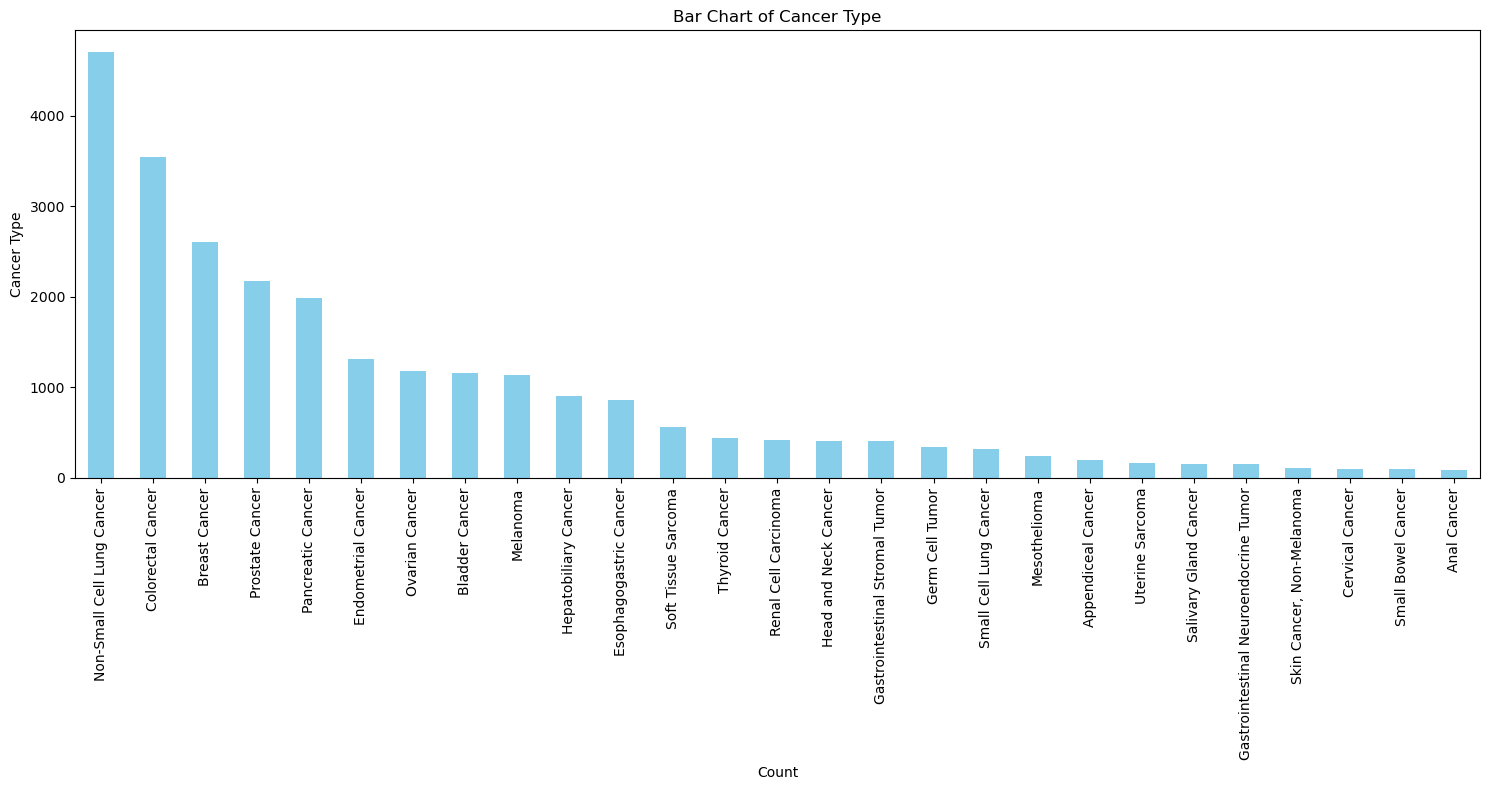

/var/folders/dp/r86j009572g6fk5d87hv187h0000gp/T/ipykernel_923/3412052754.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout


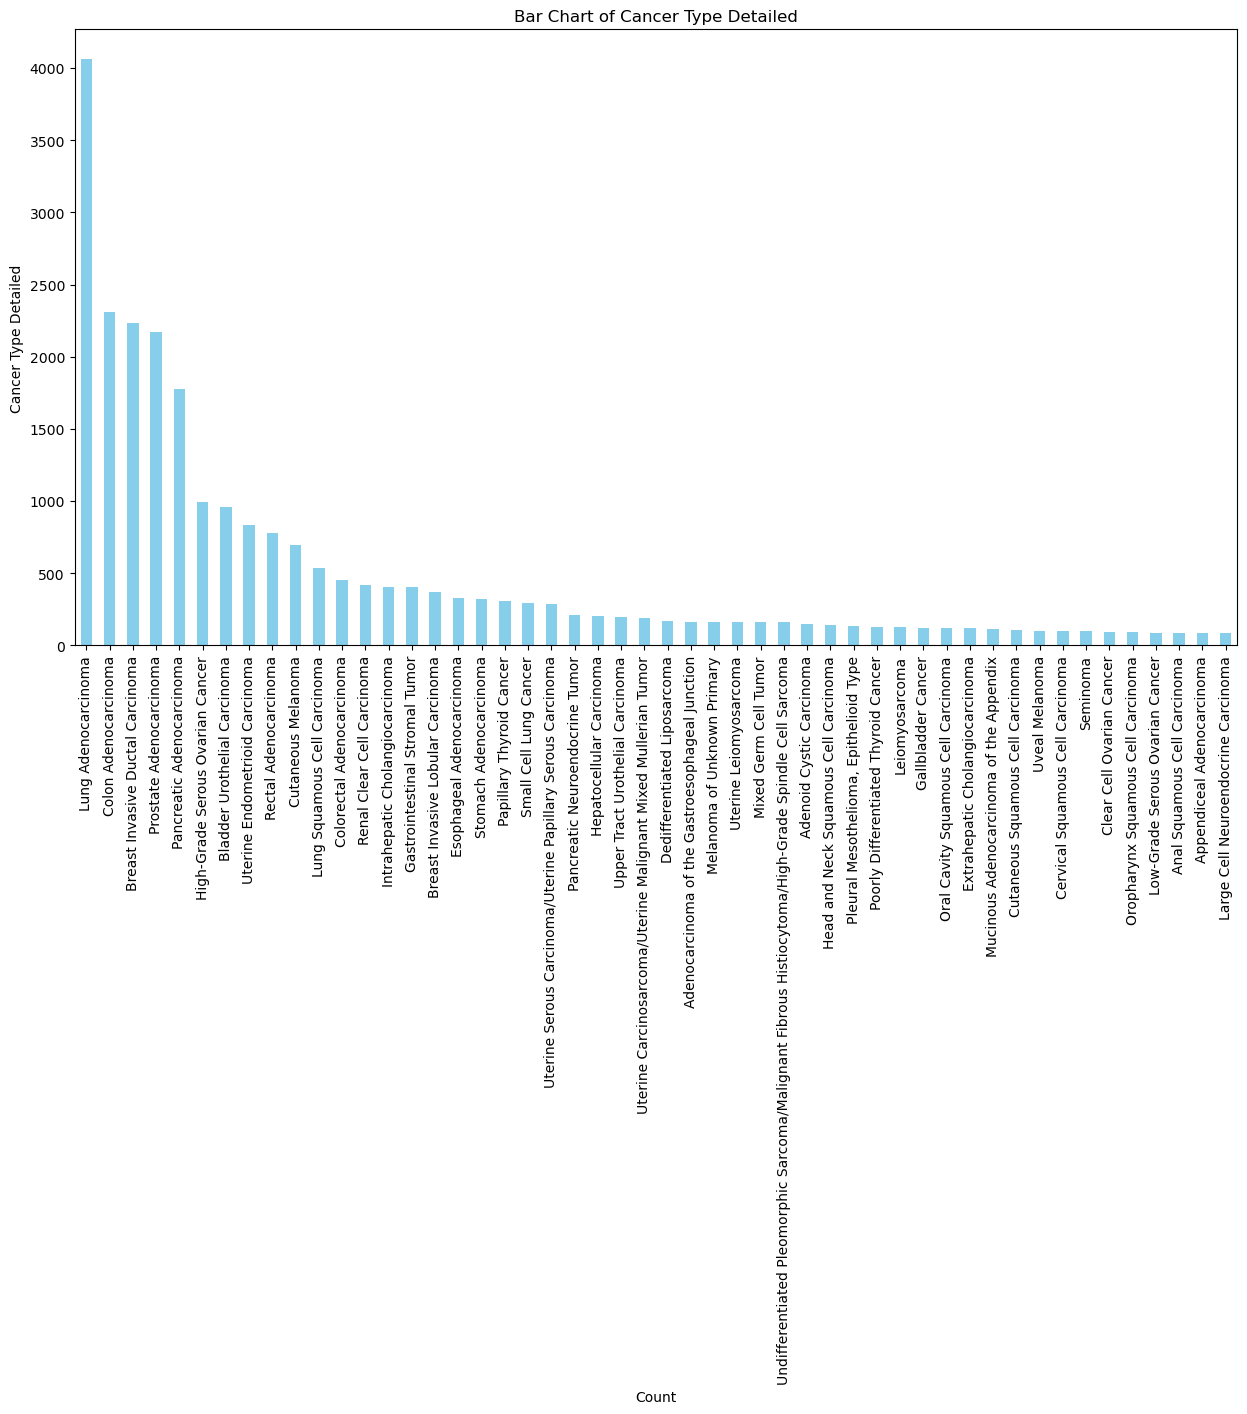

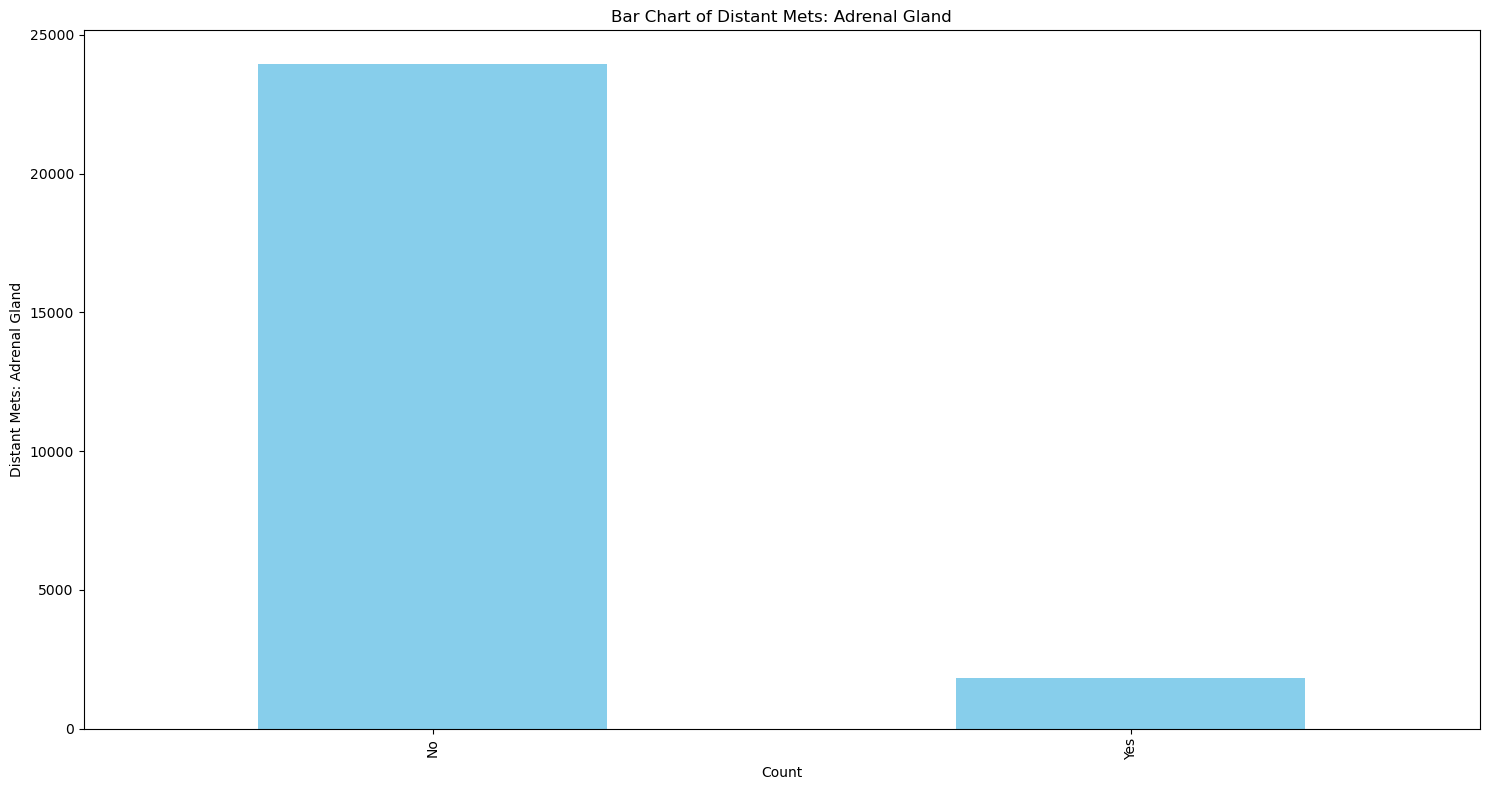

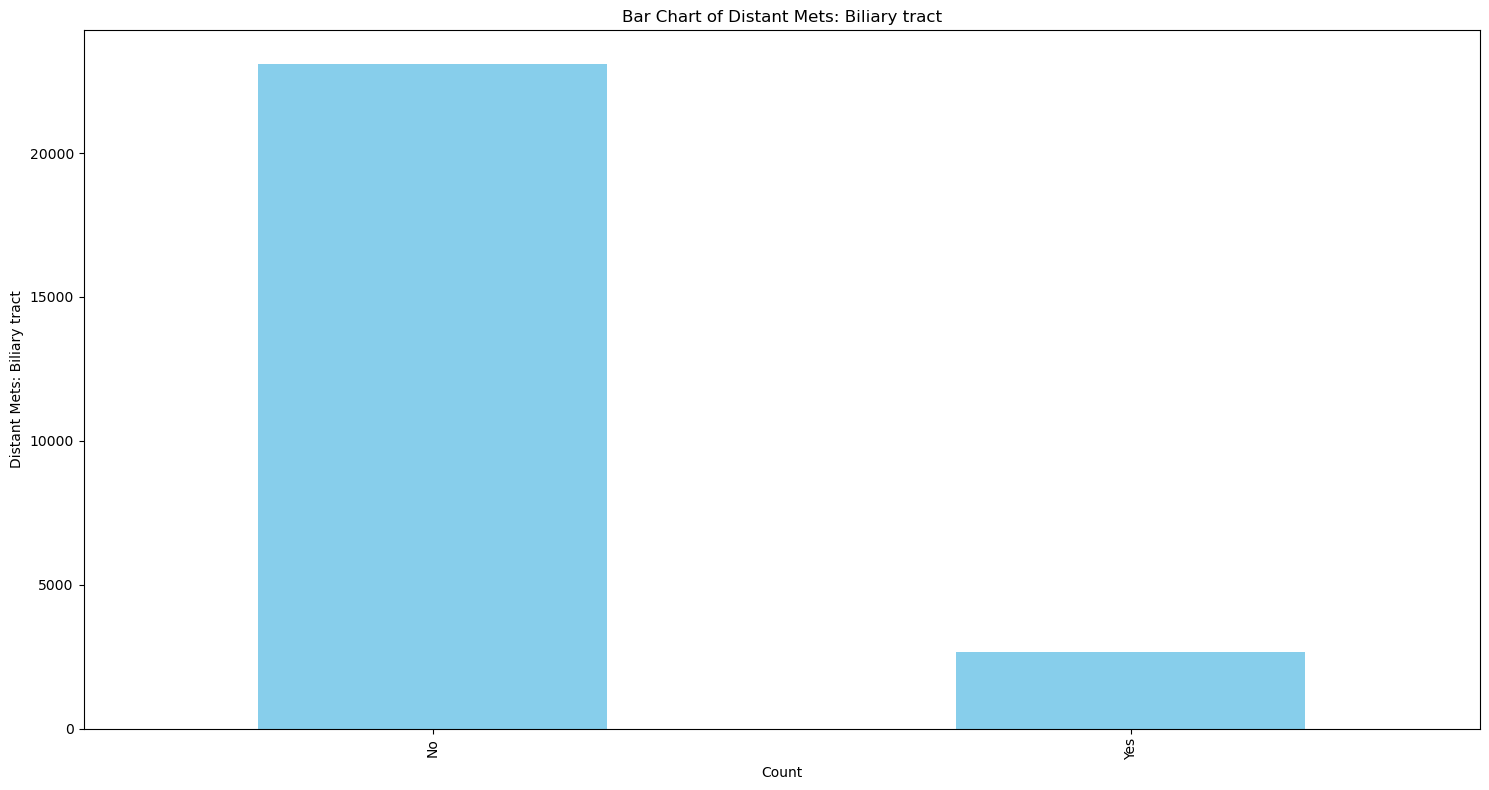

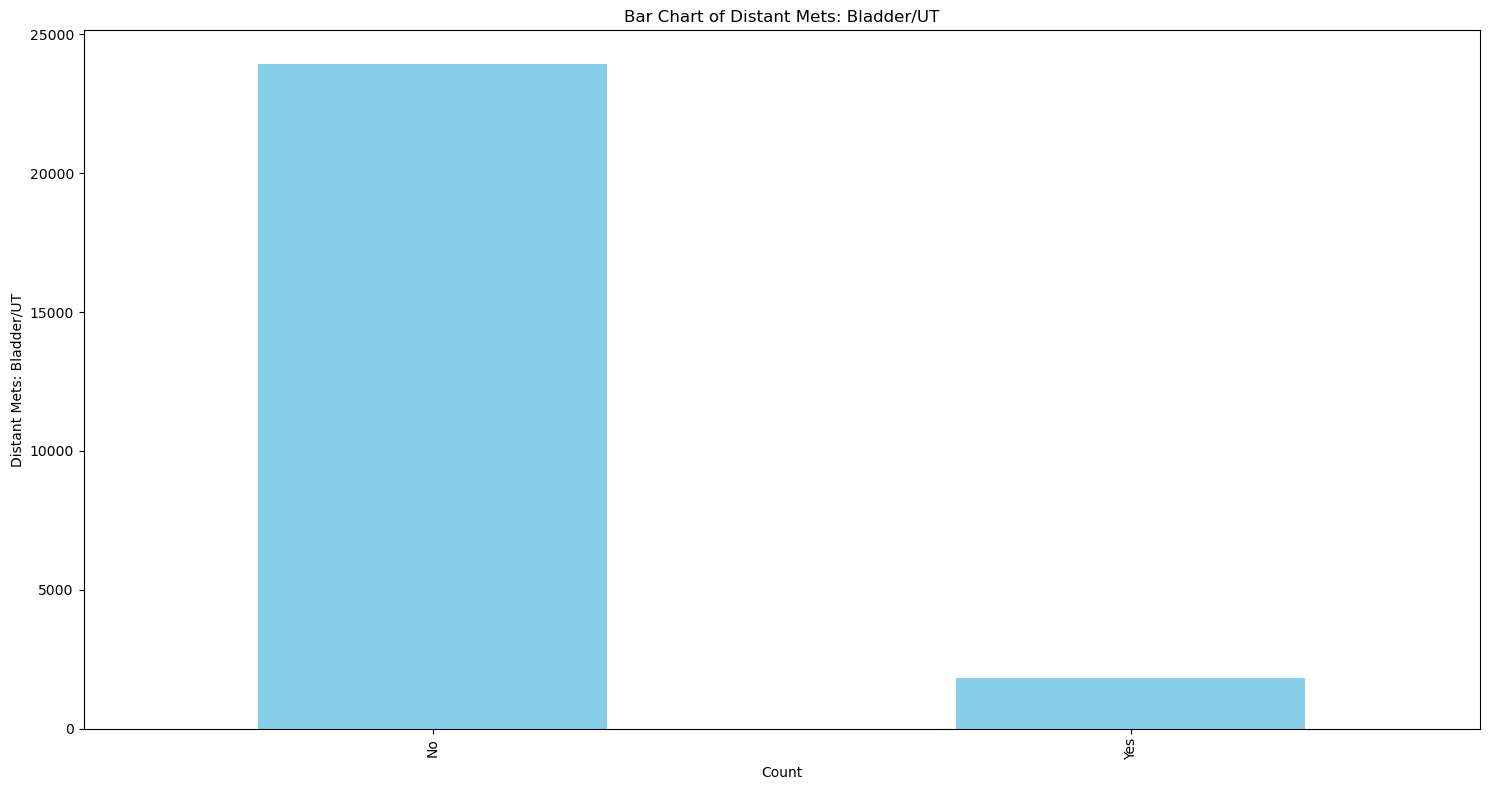

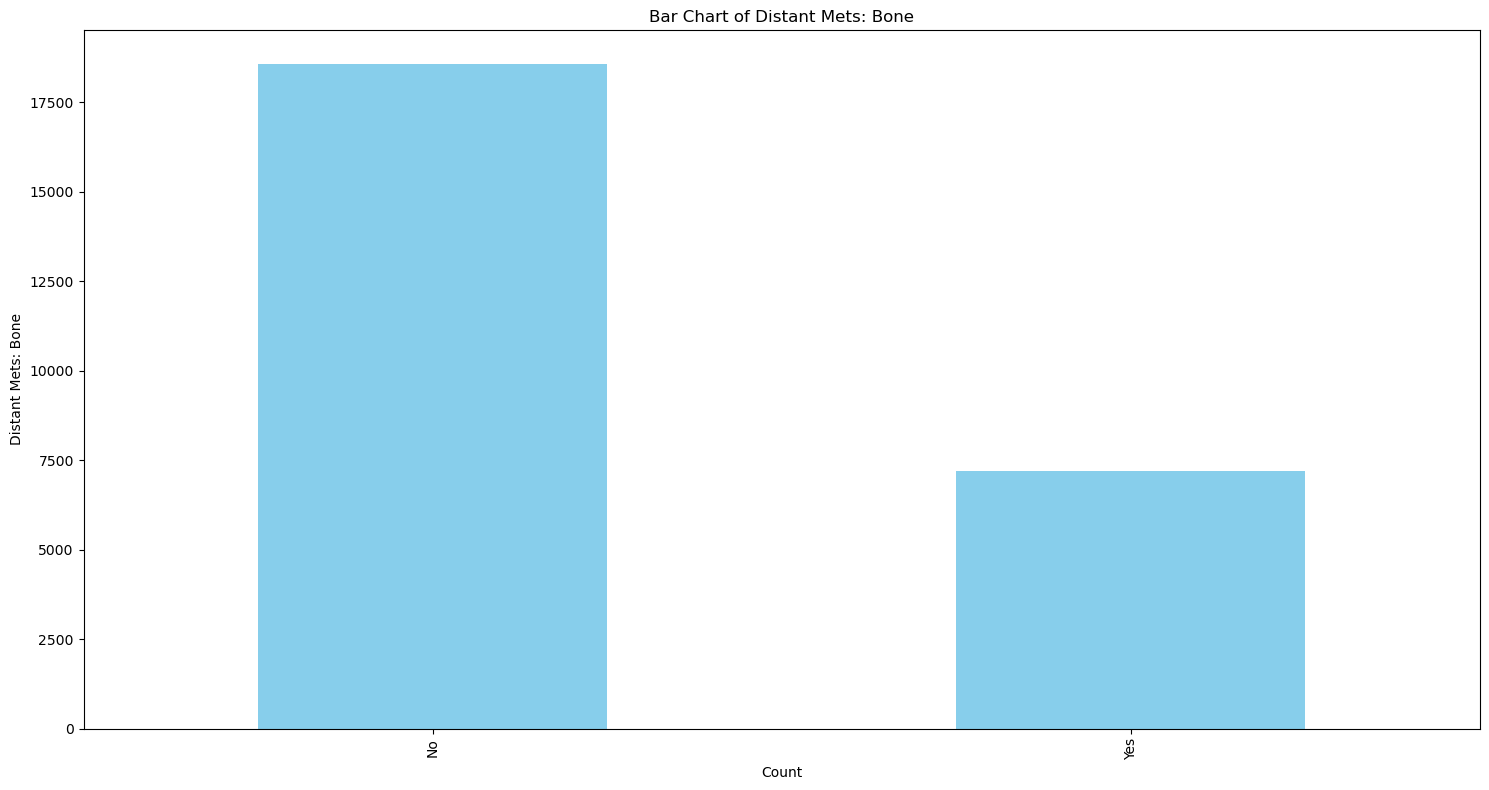

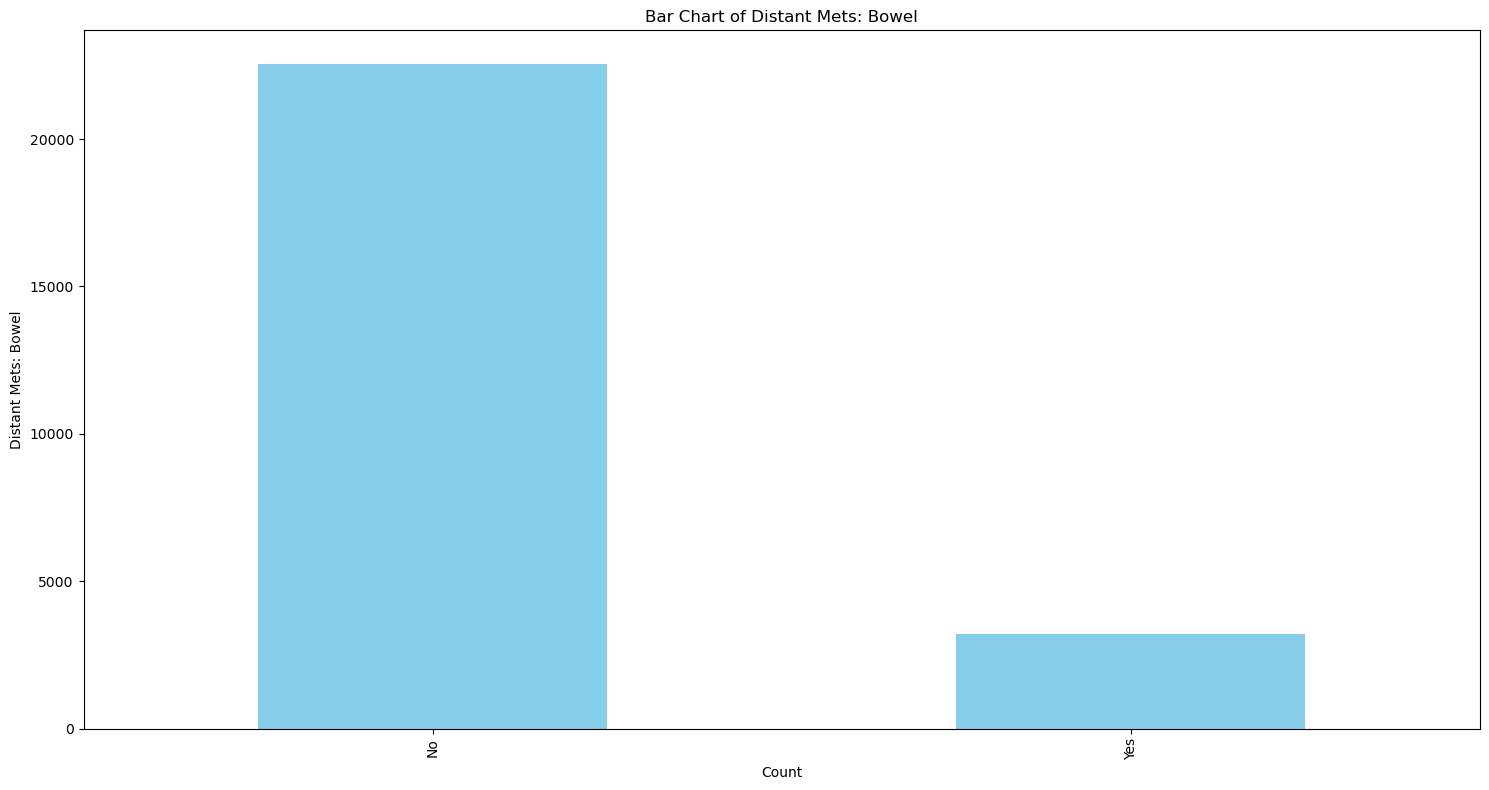

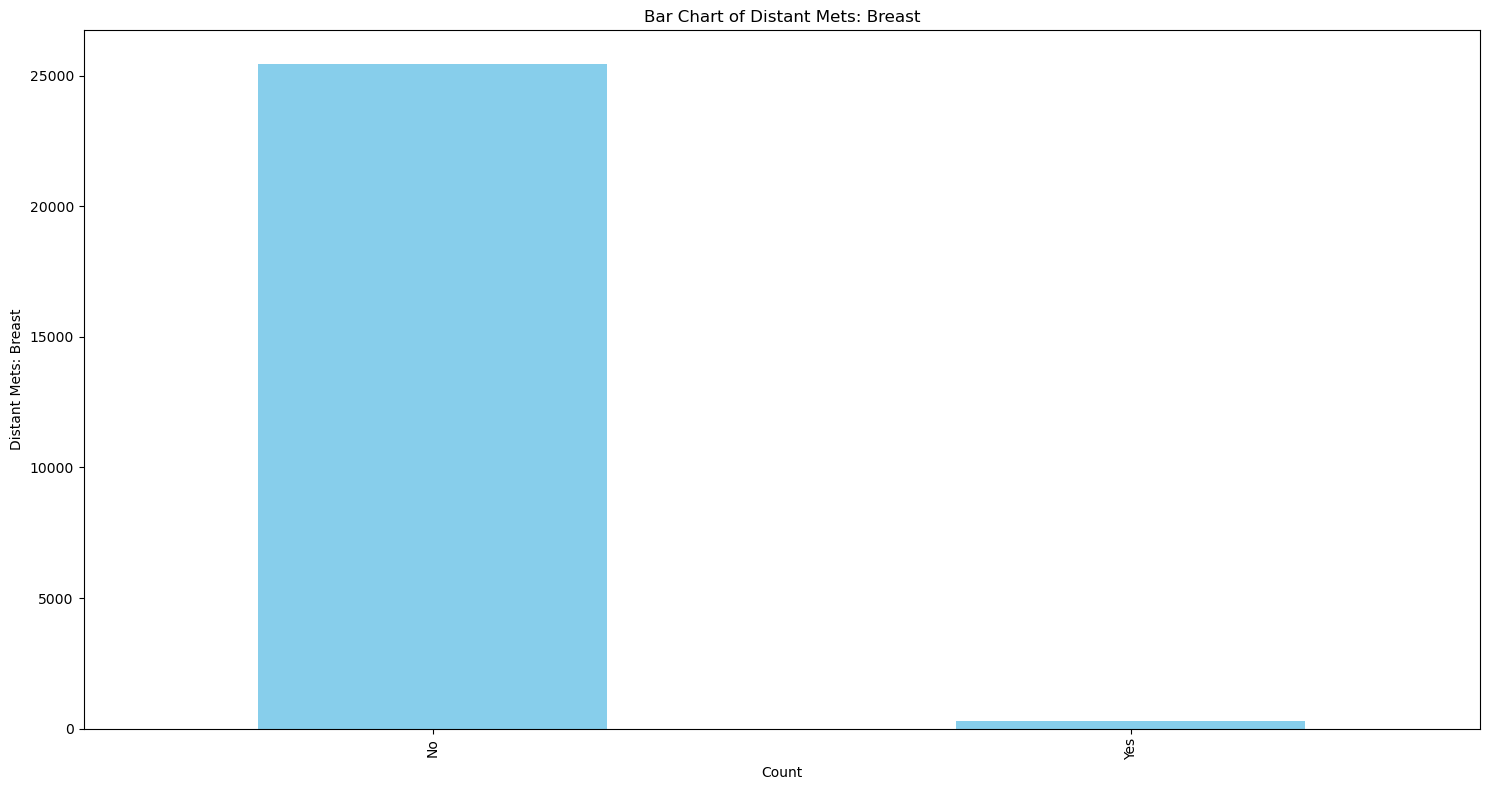

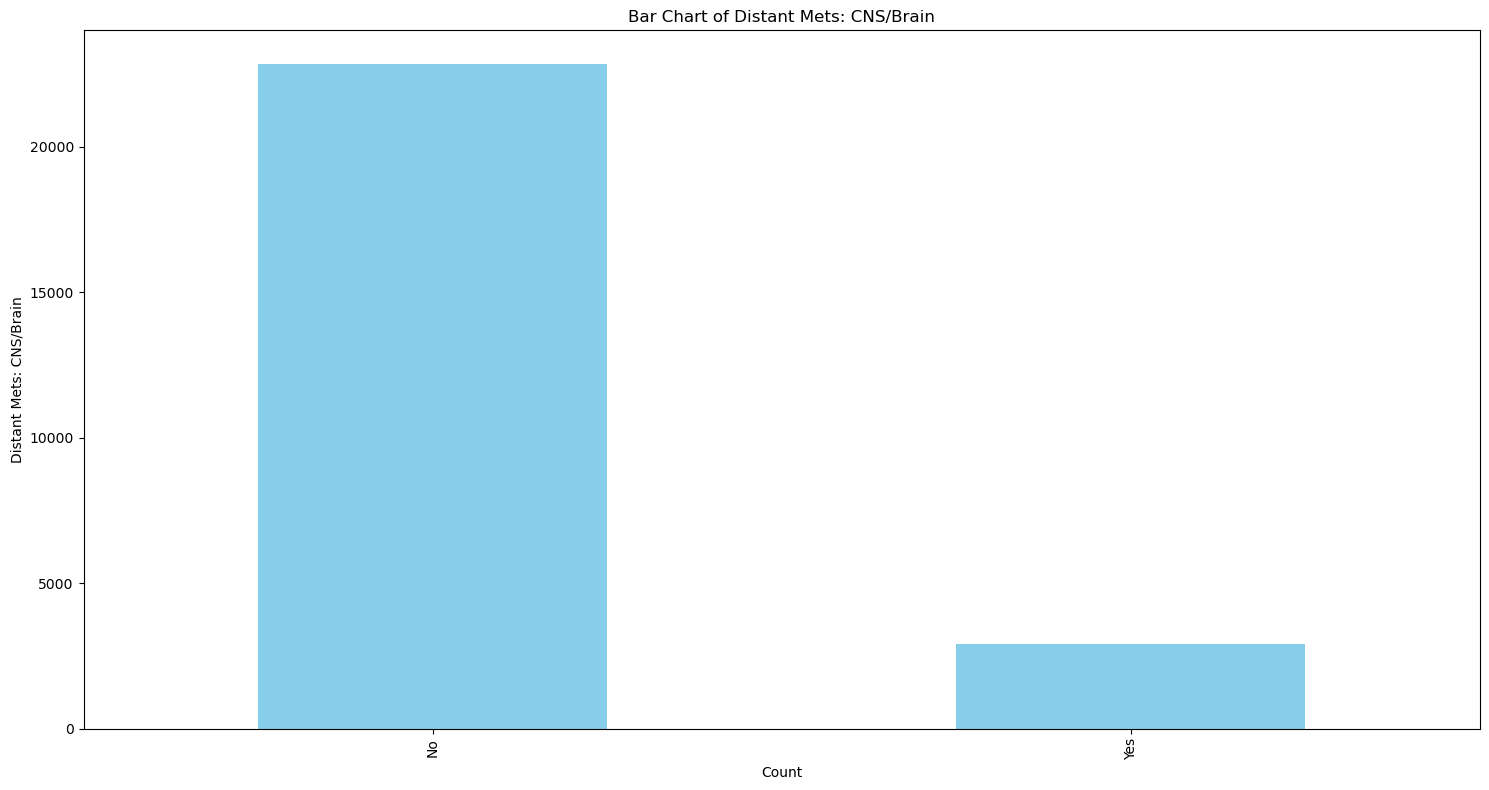

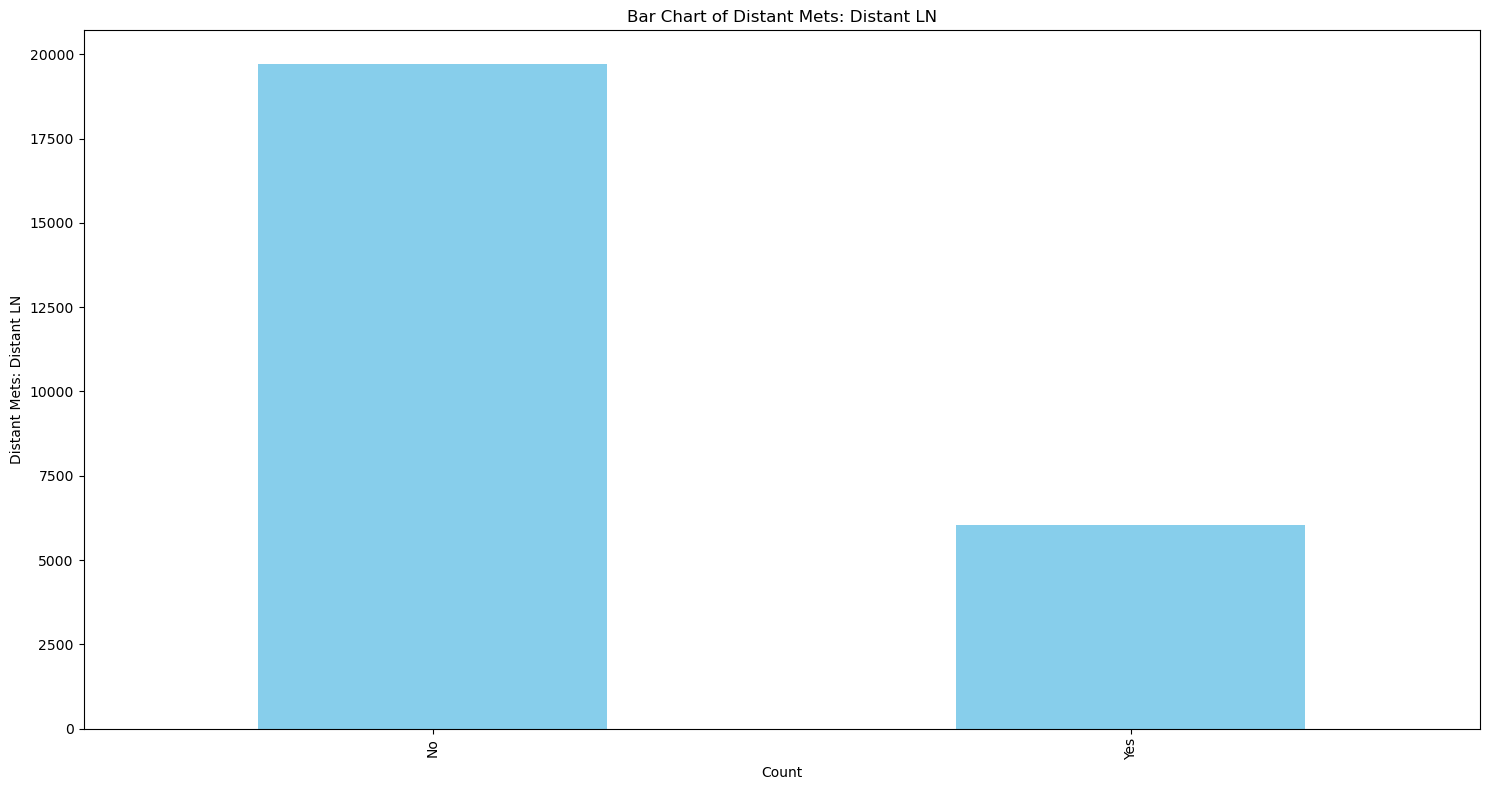

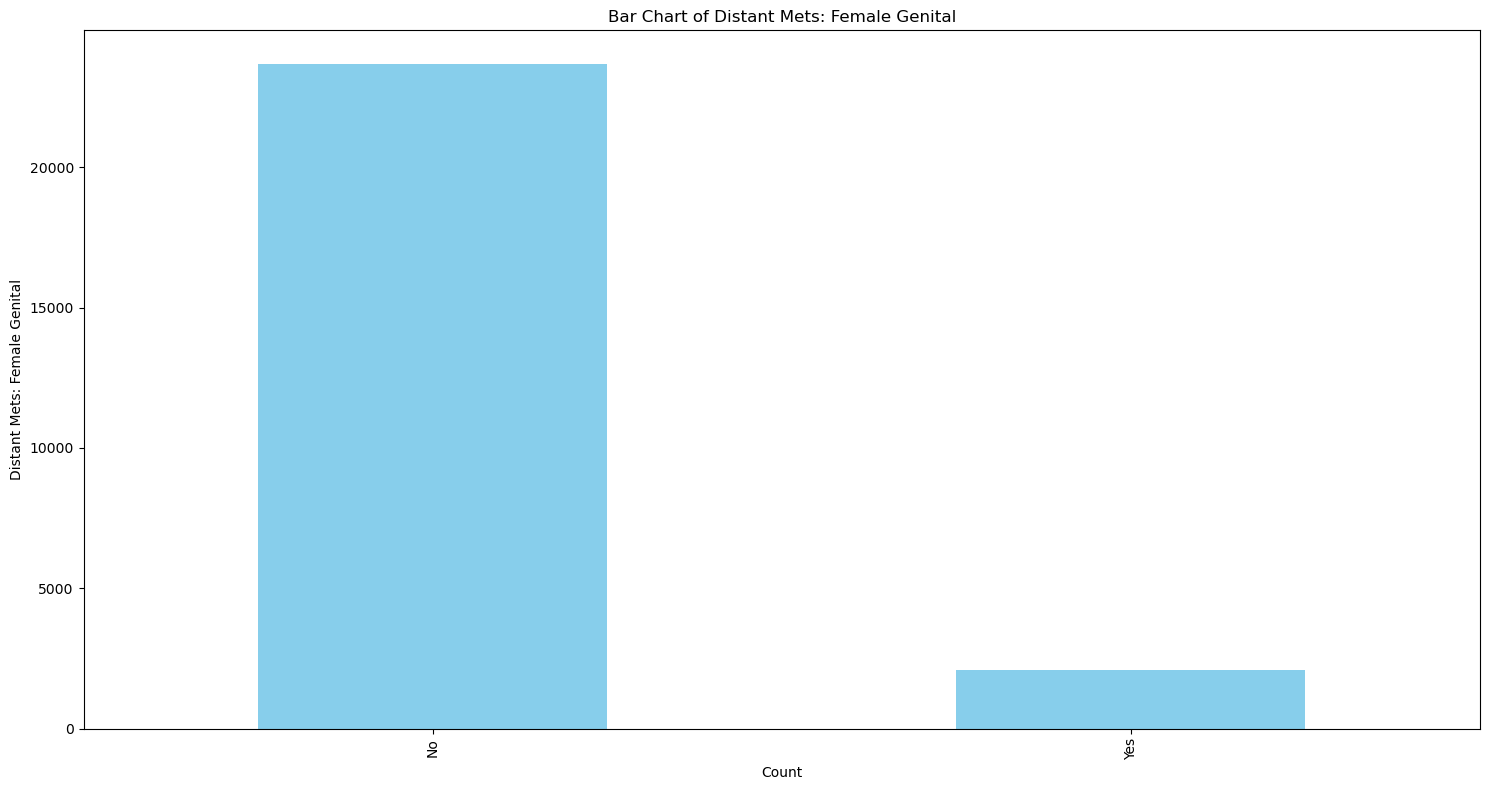

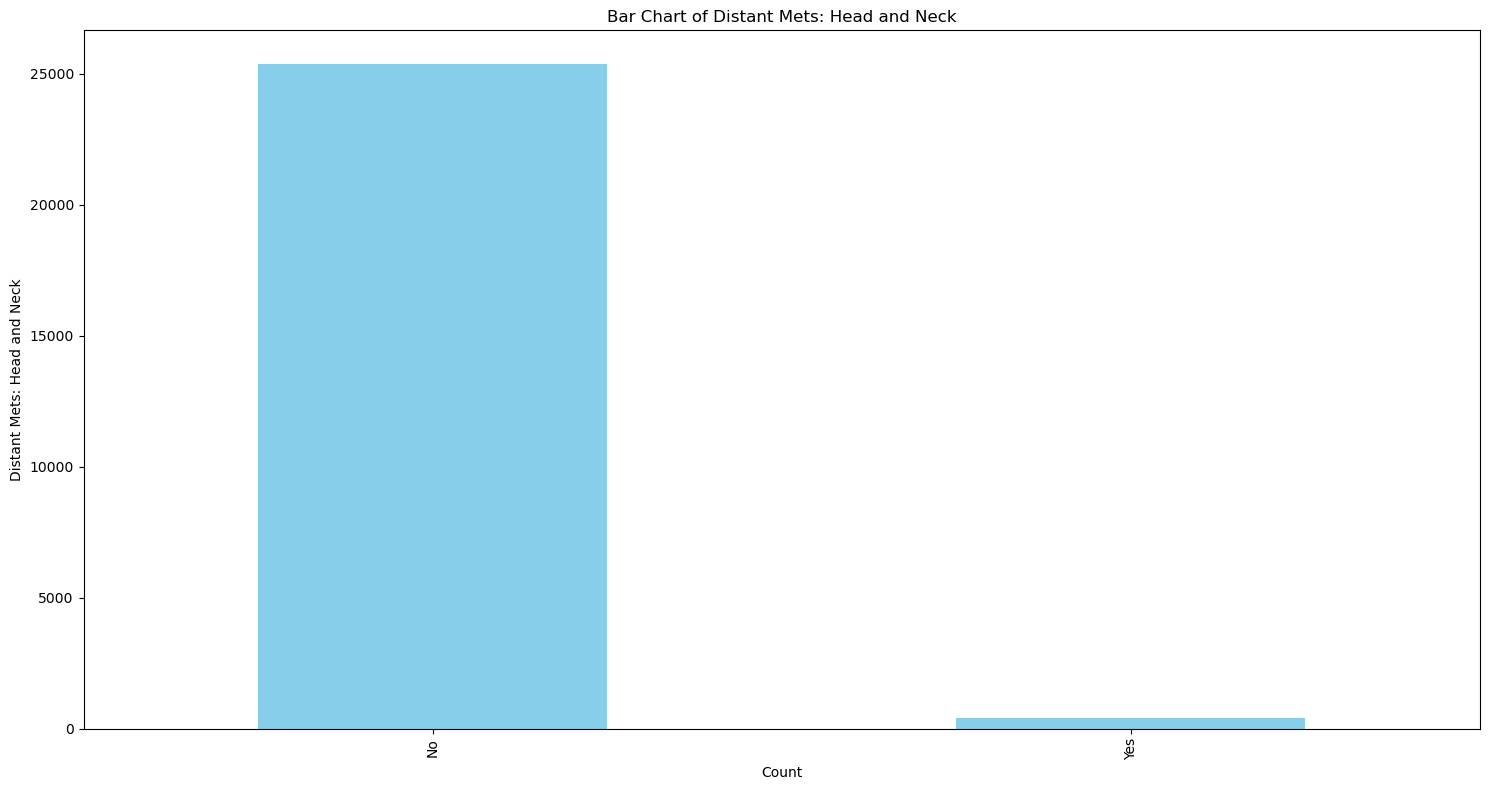

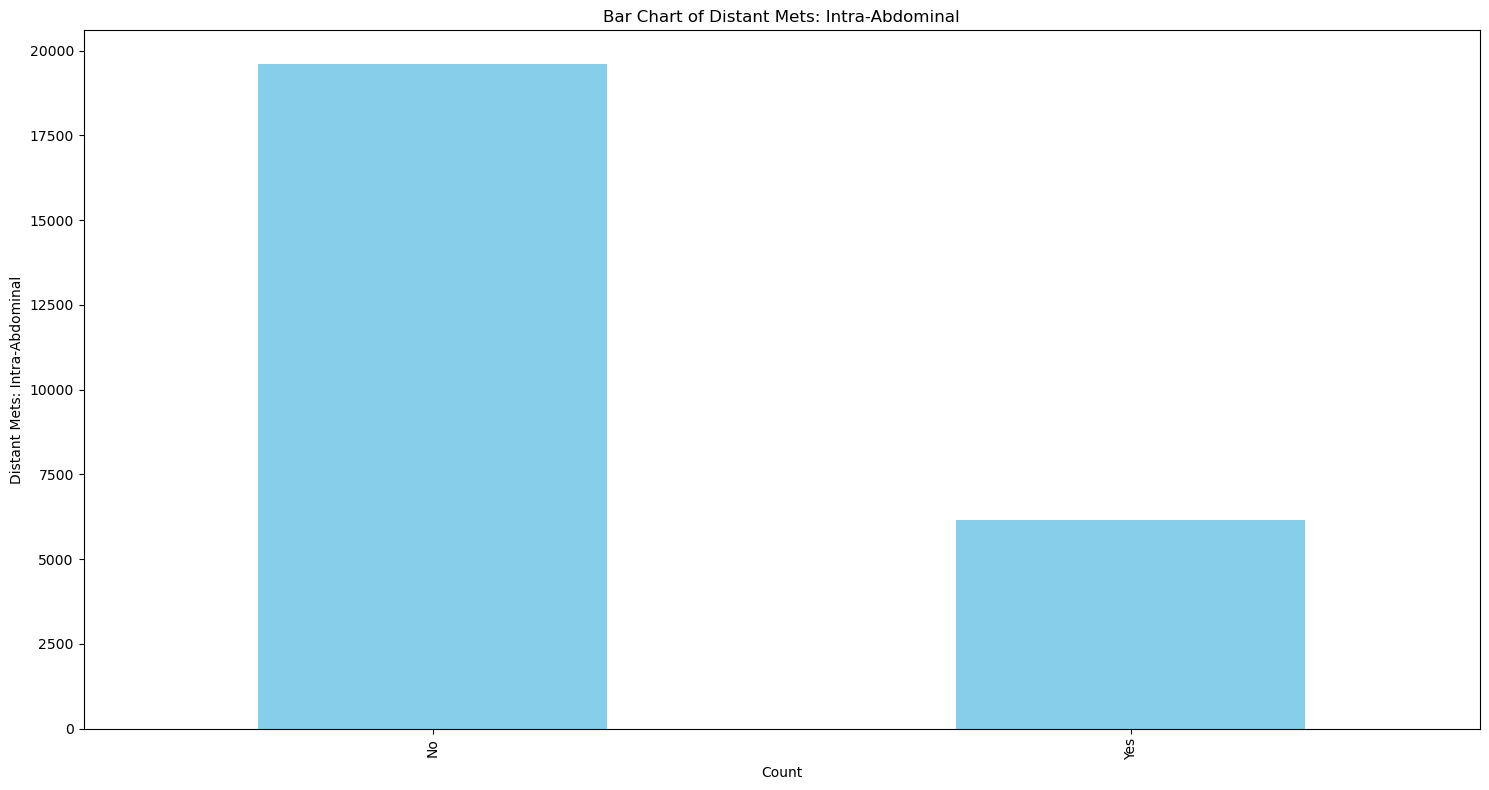

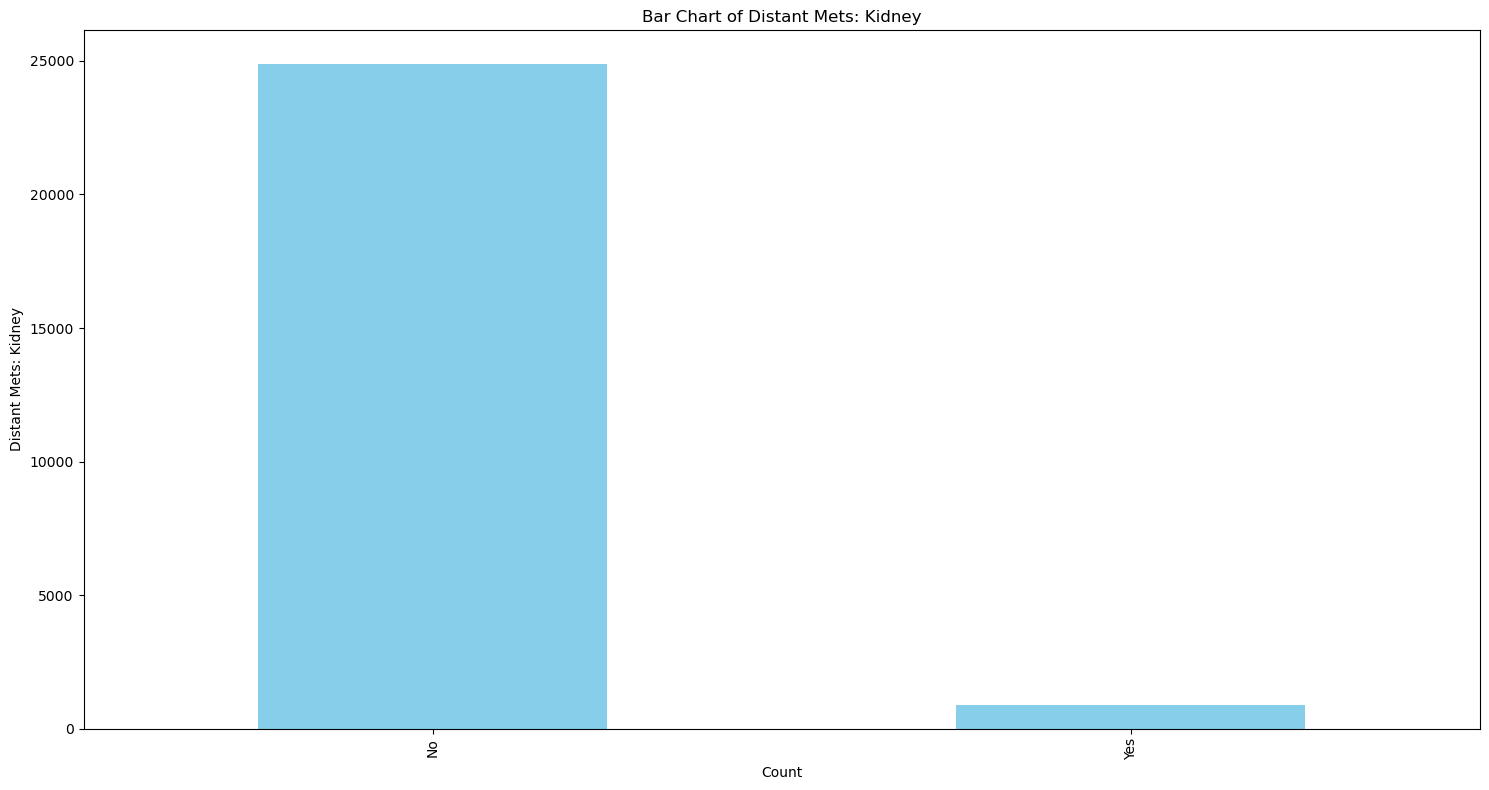

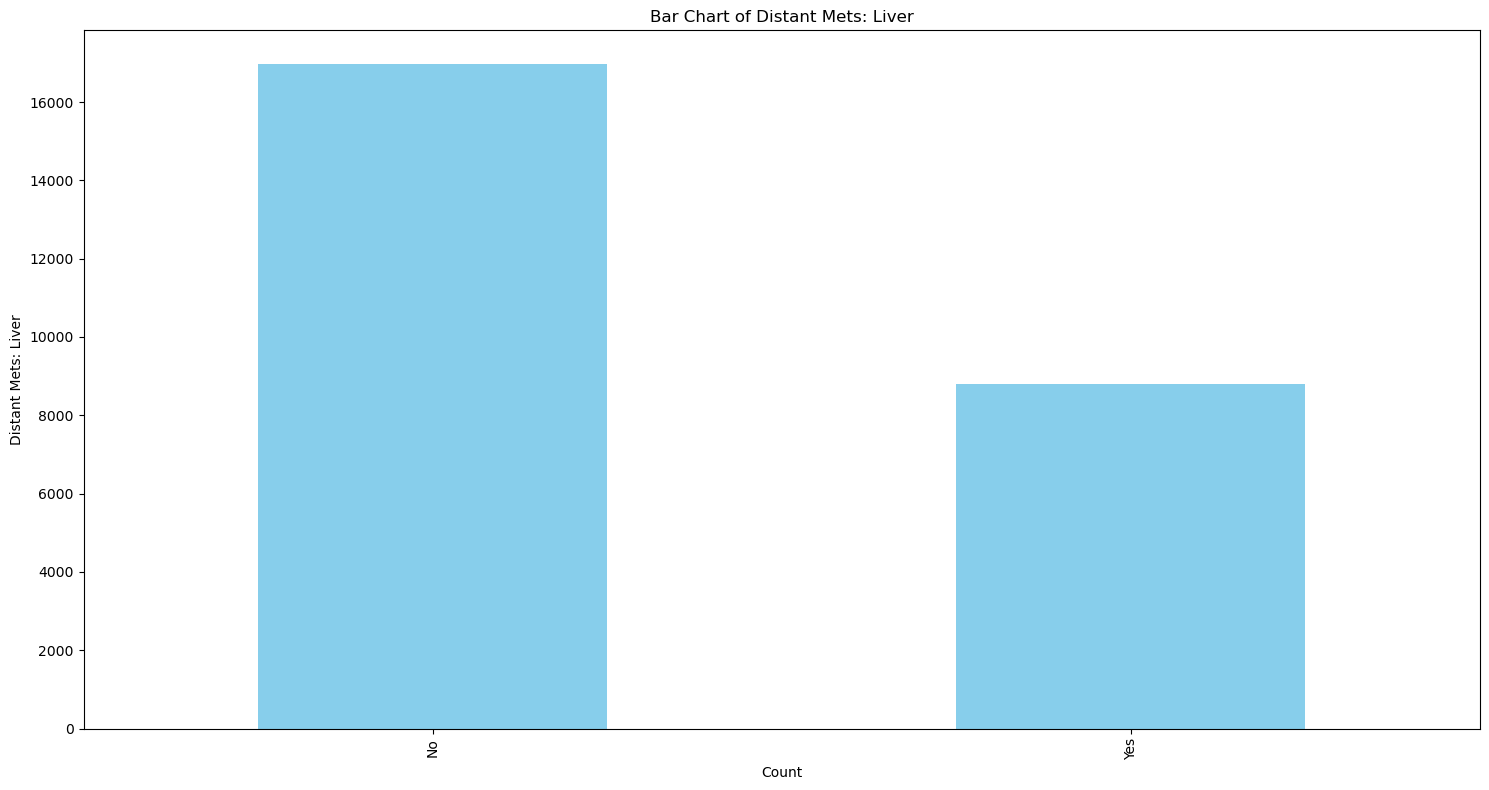

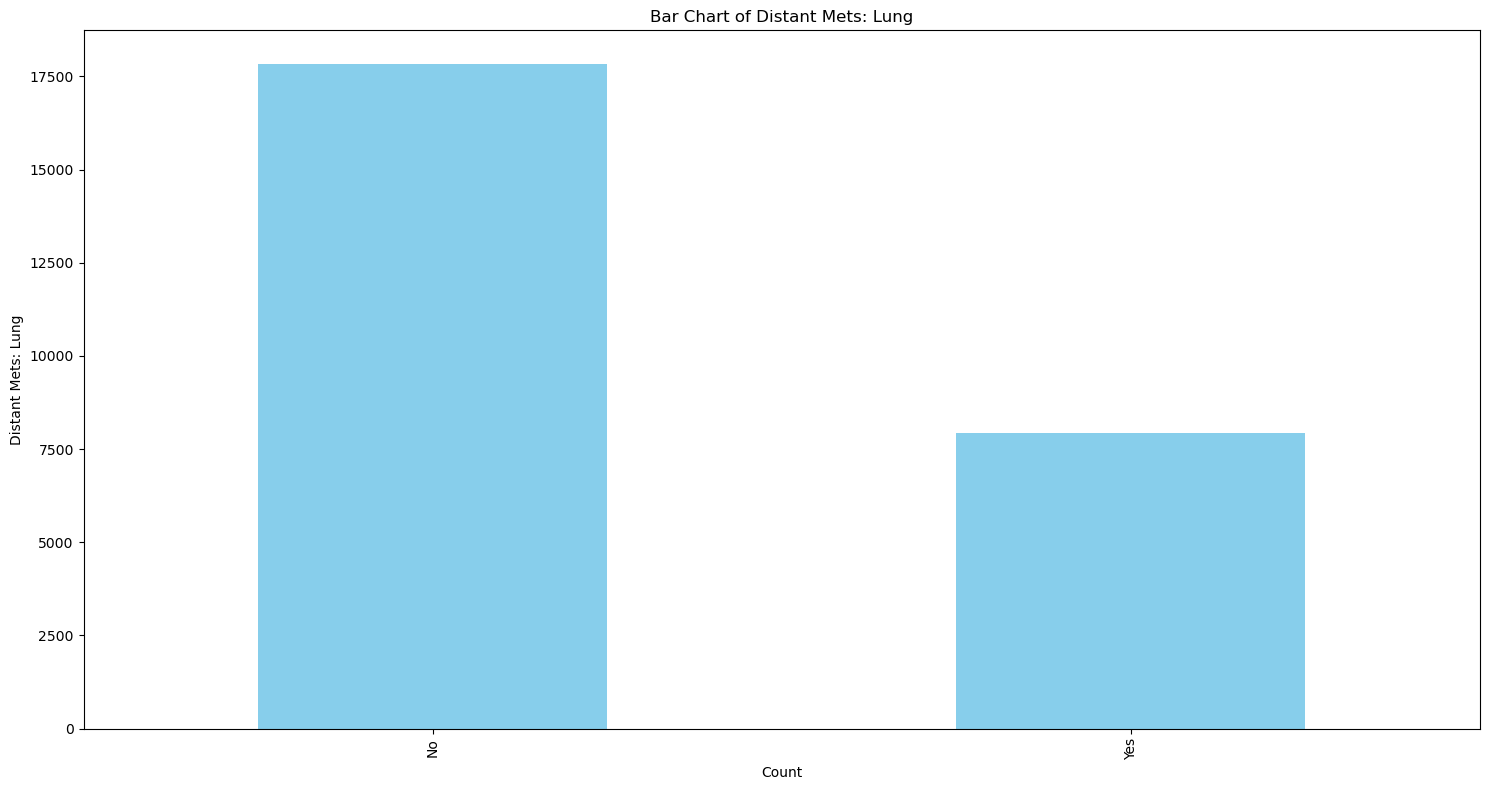

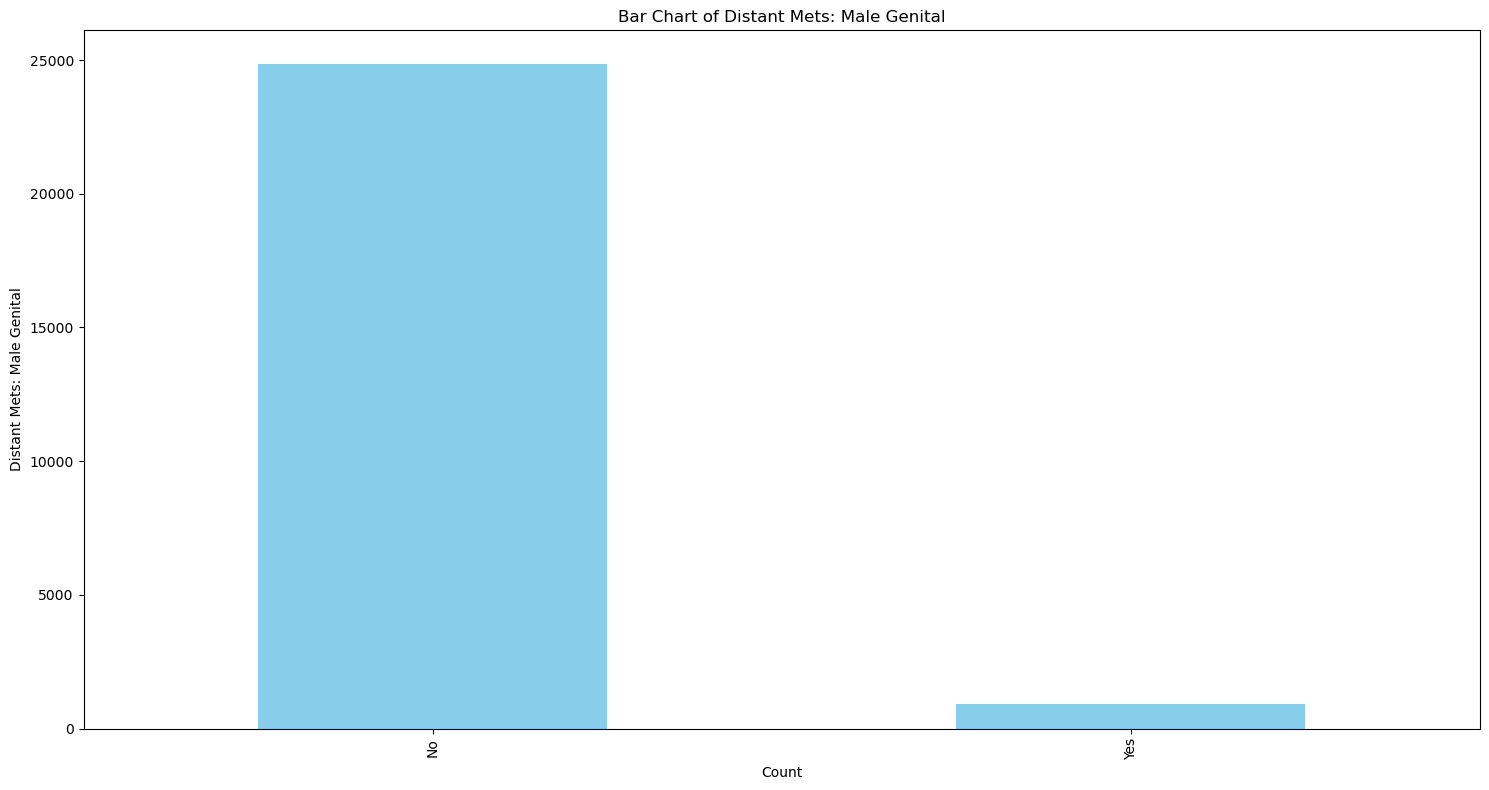

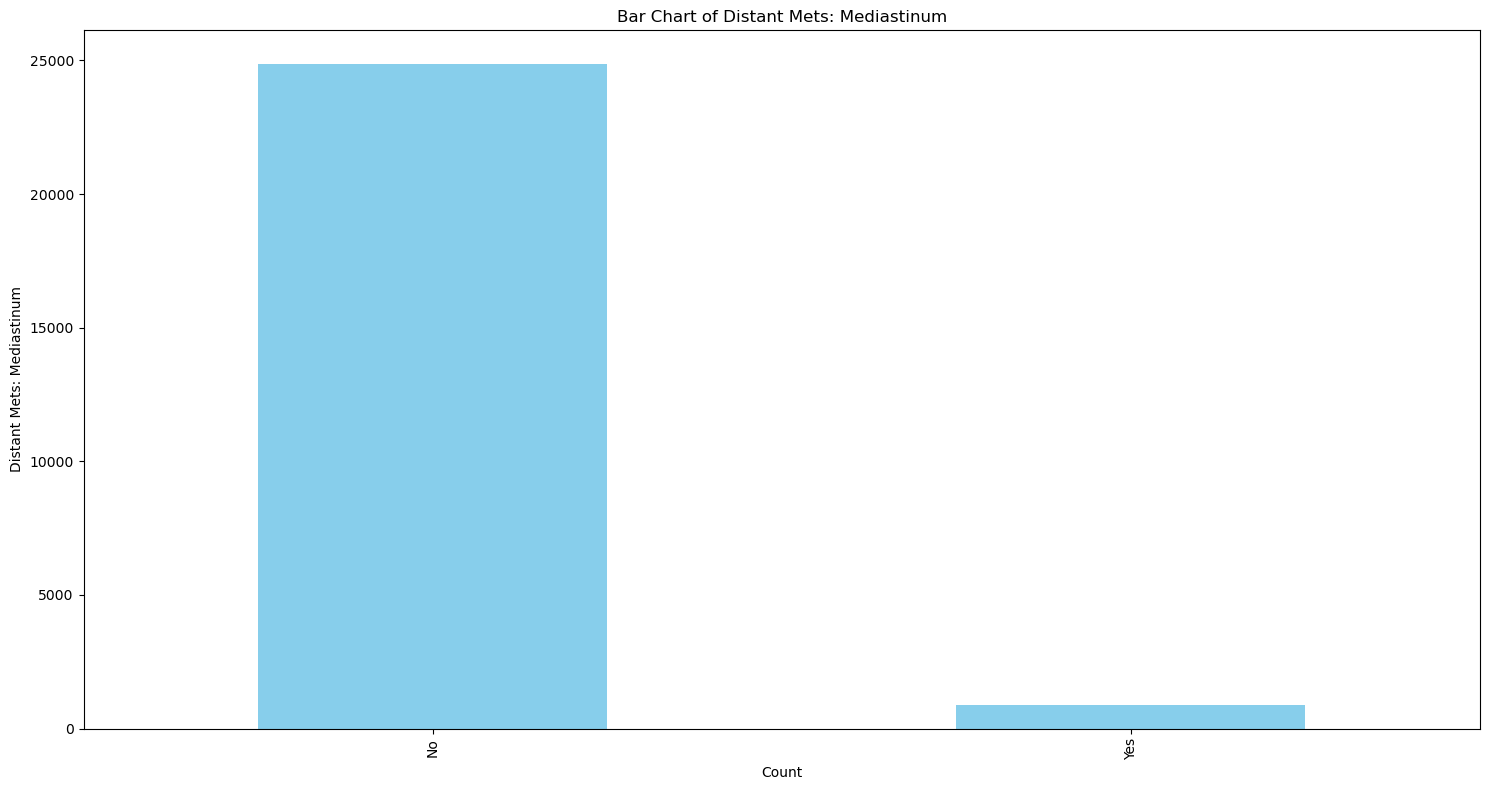

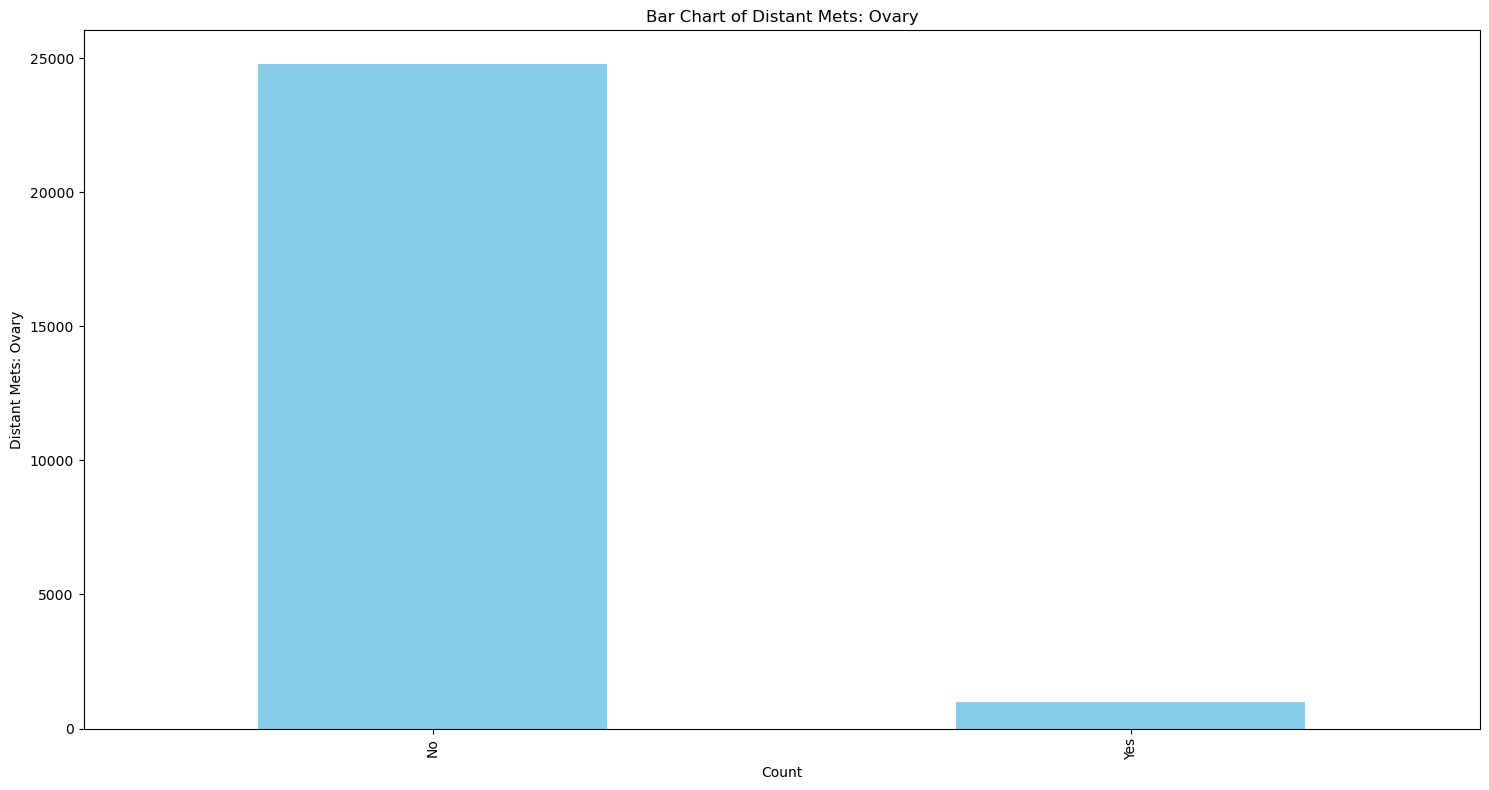

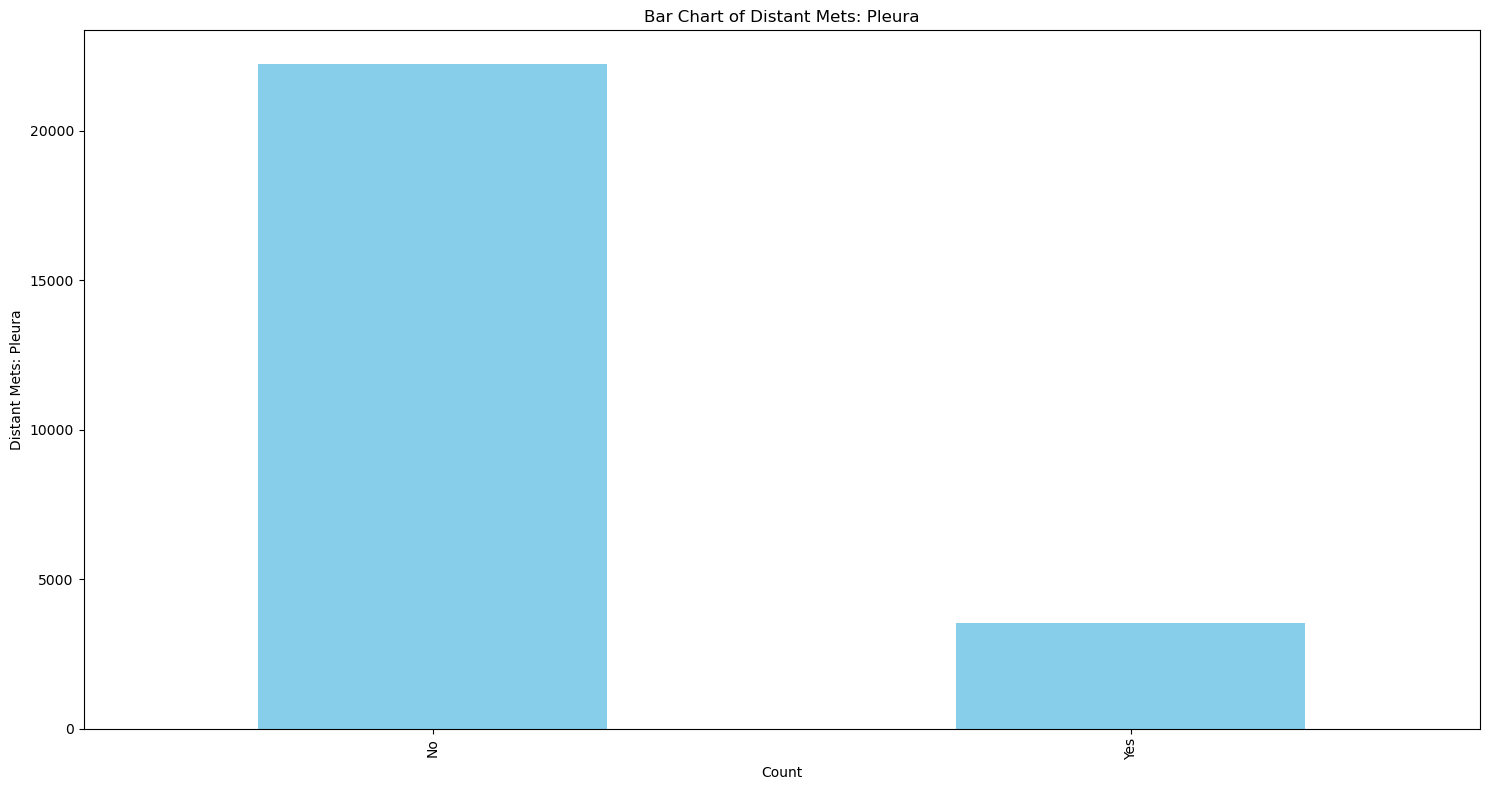

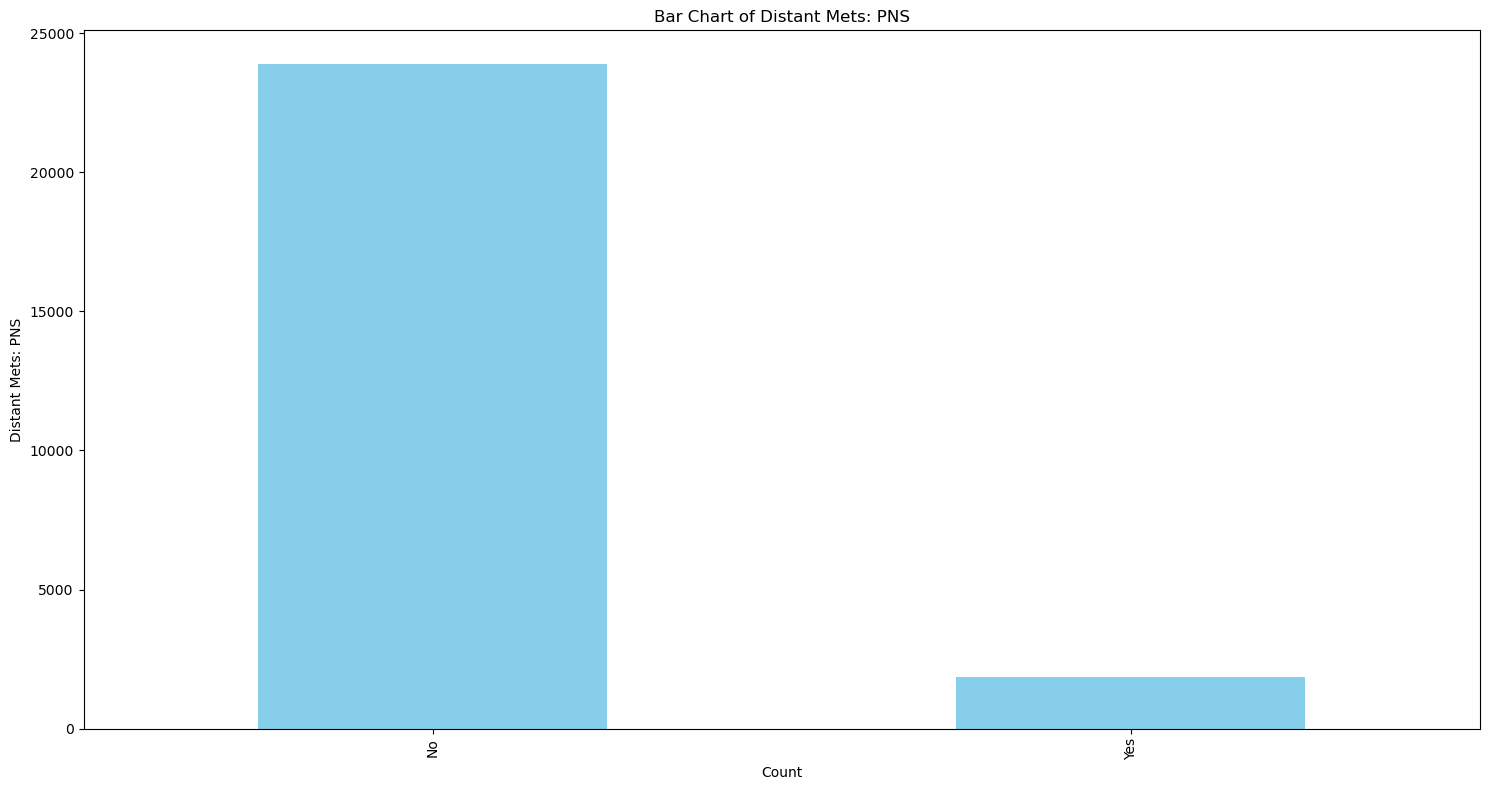

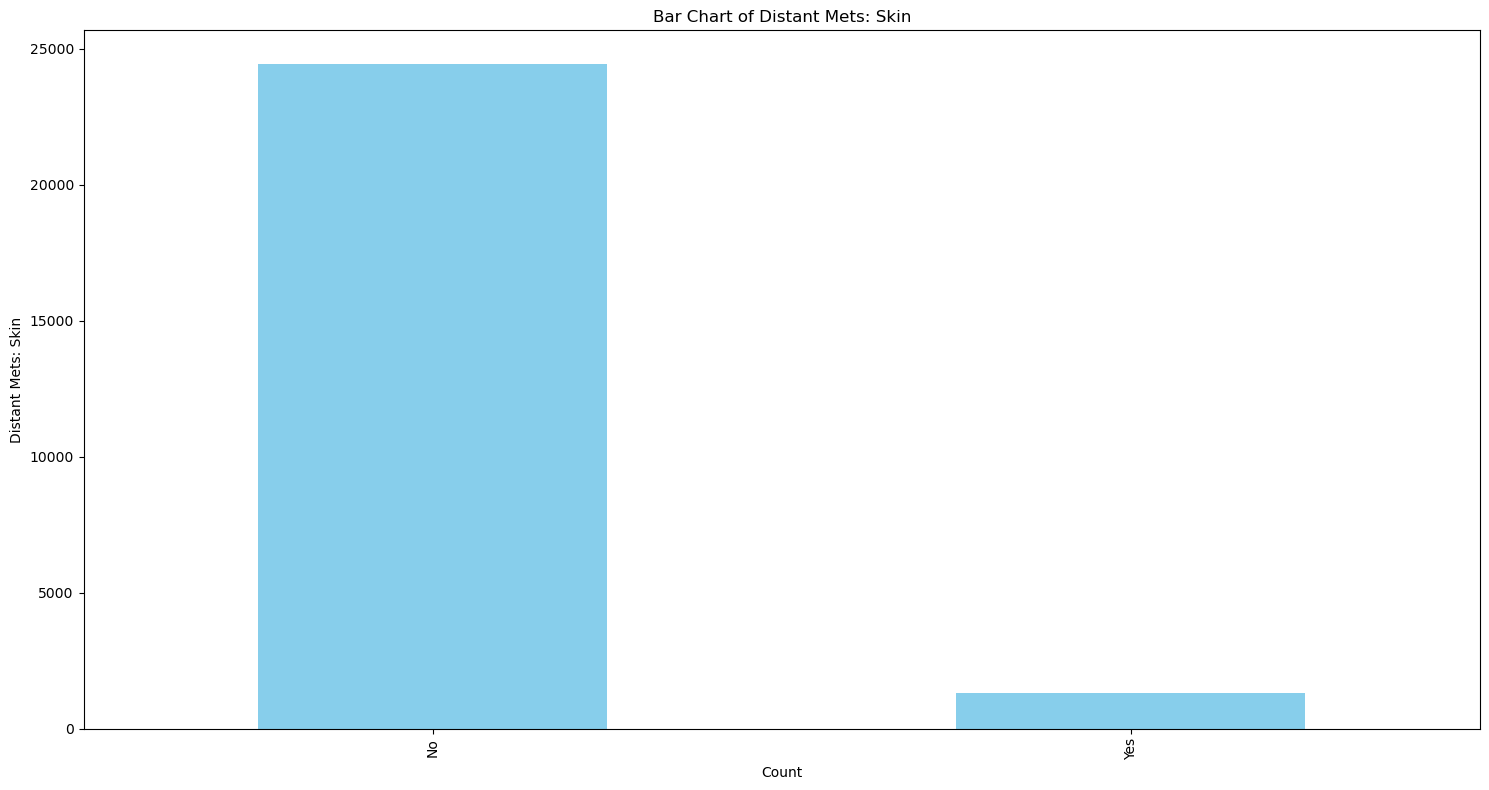

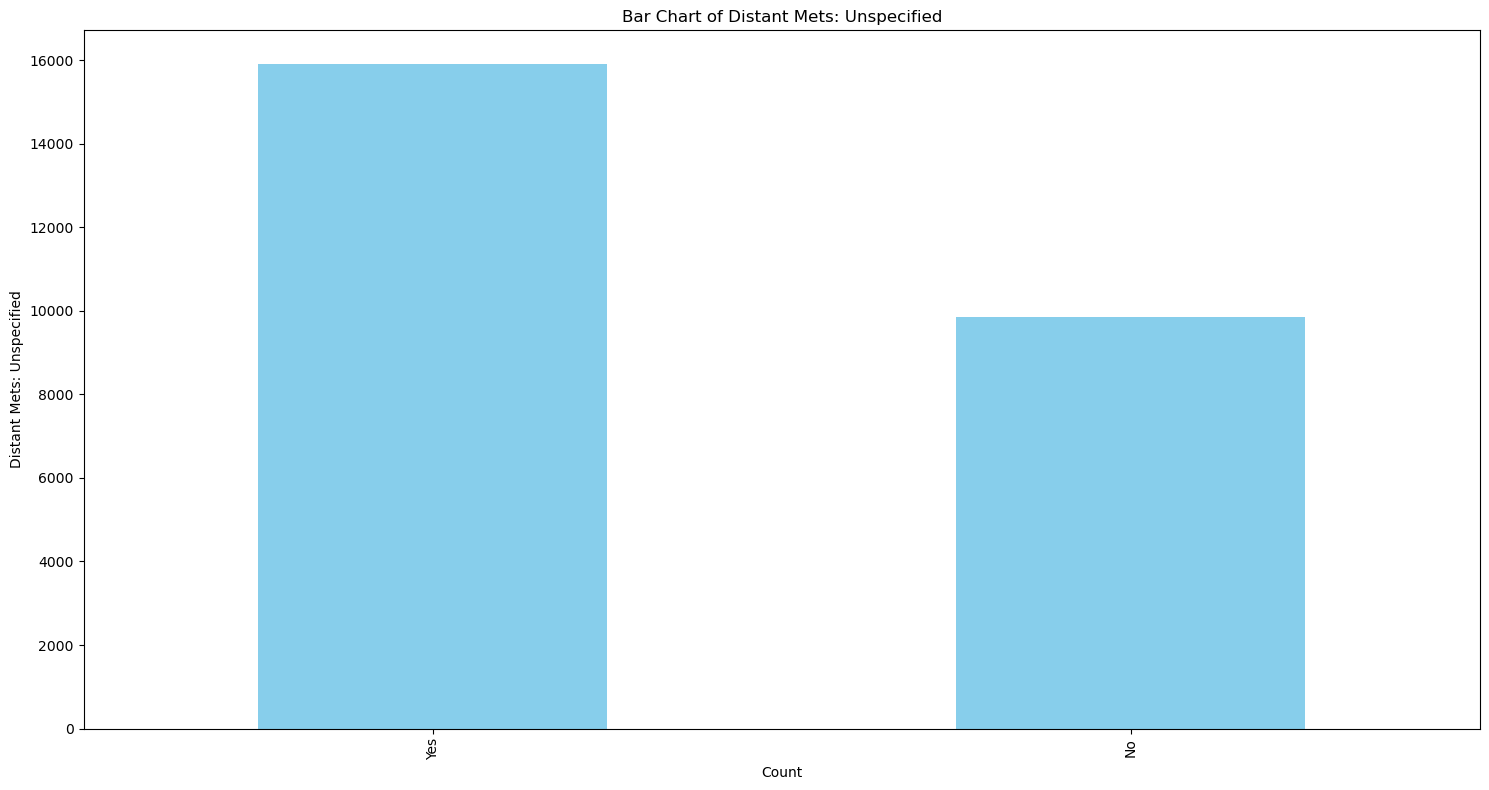

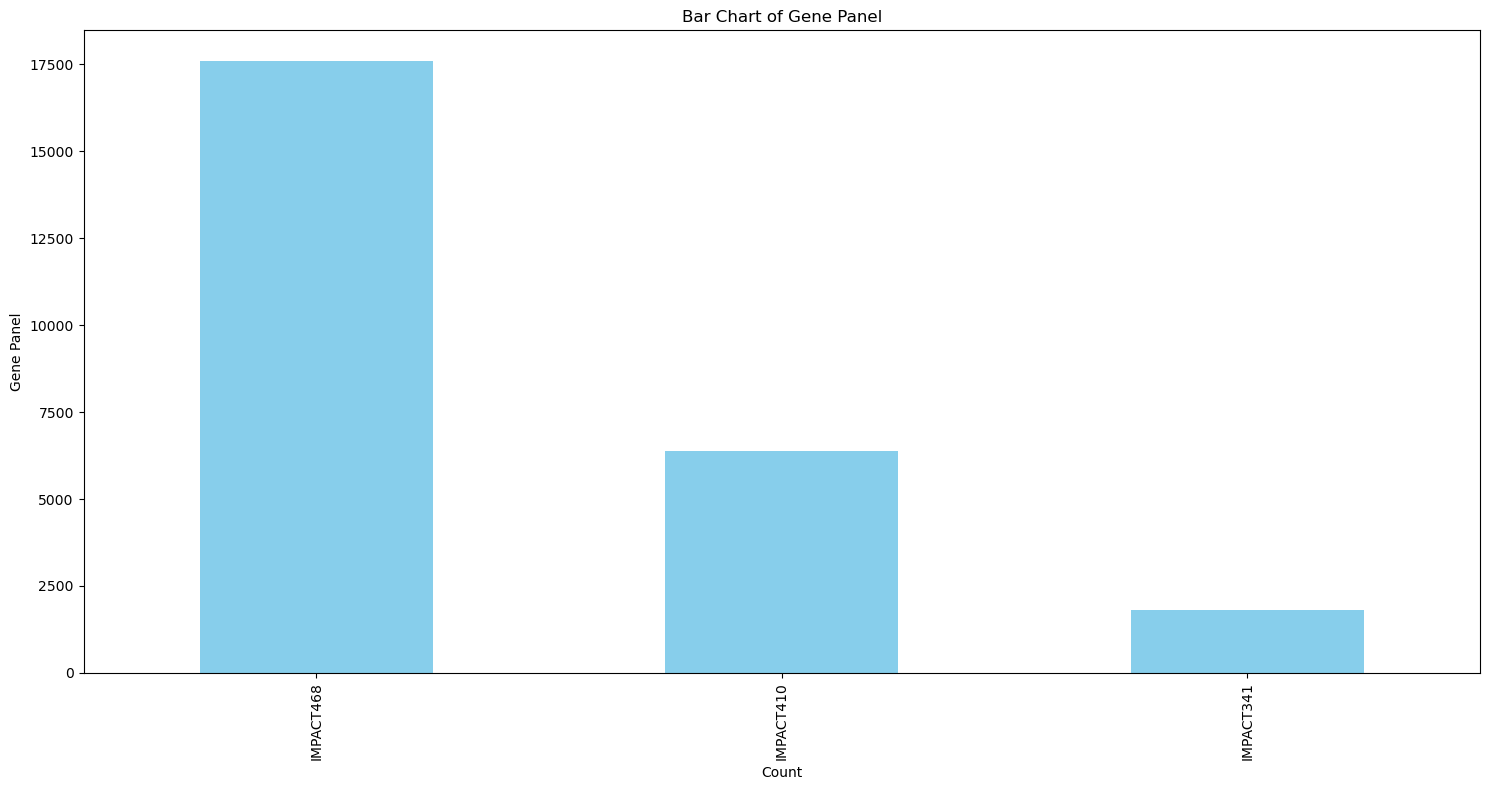

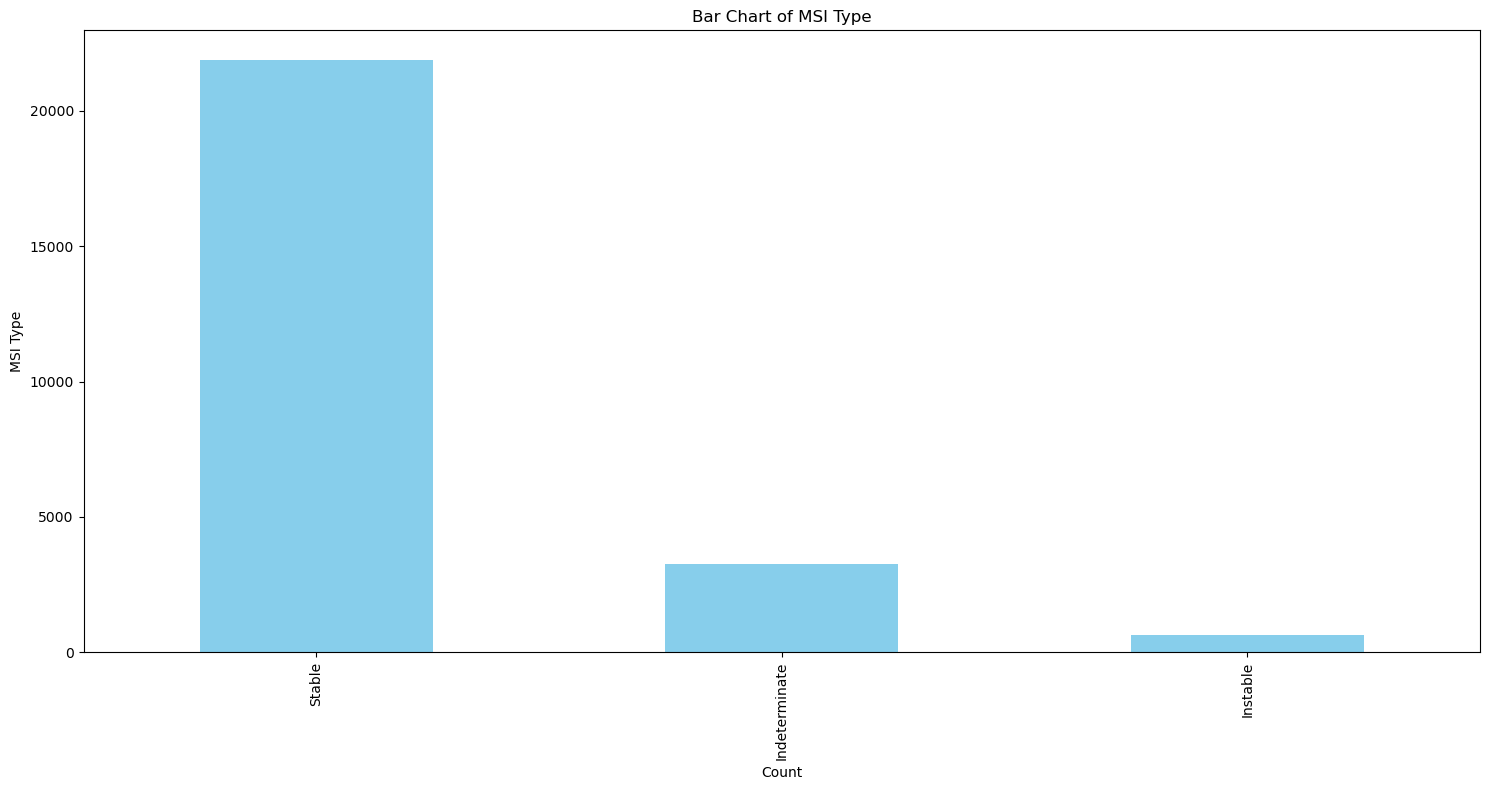

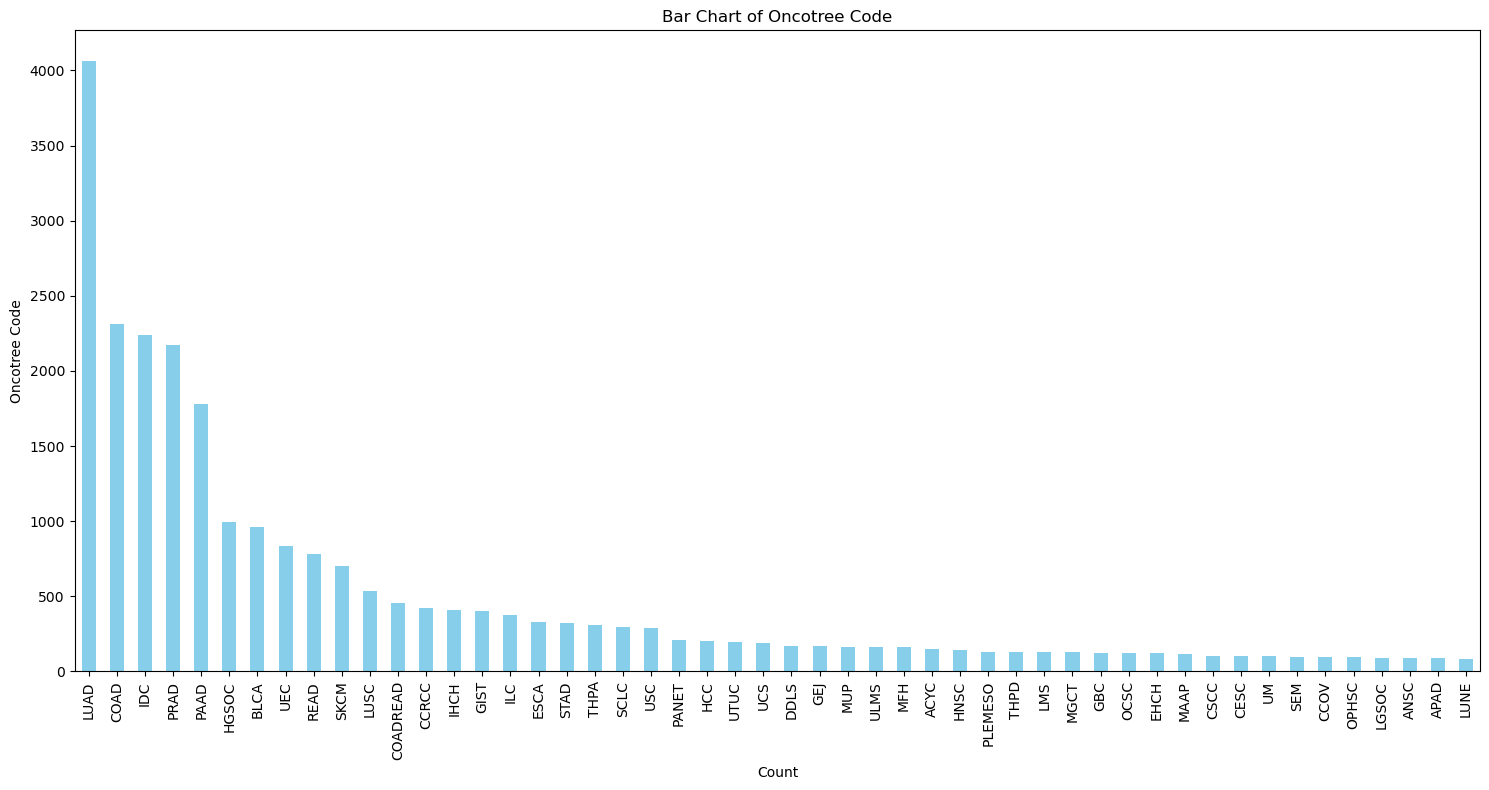

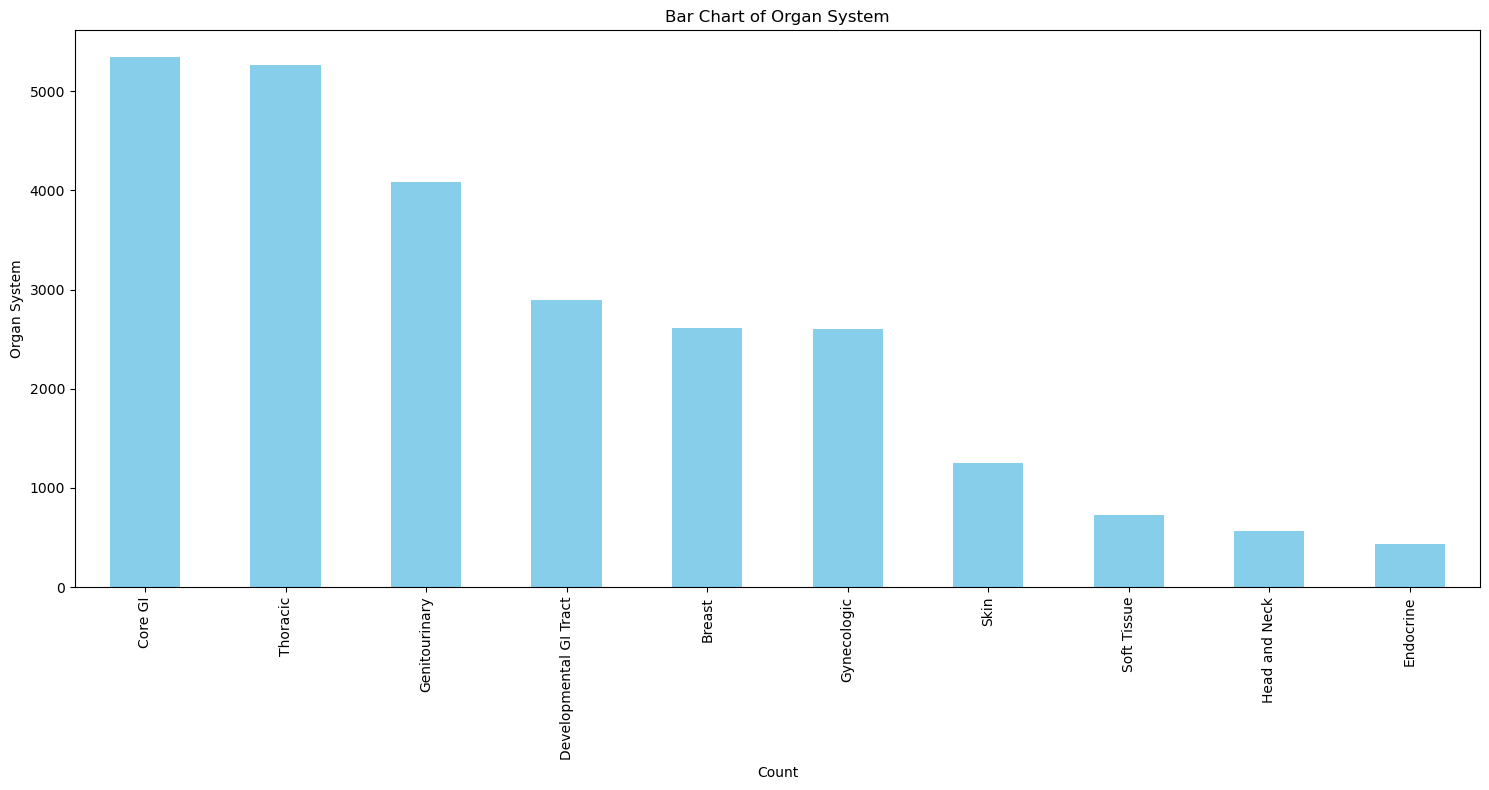

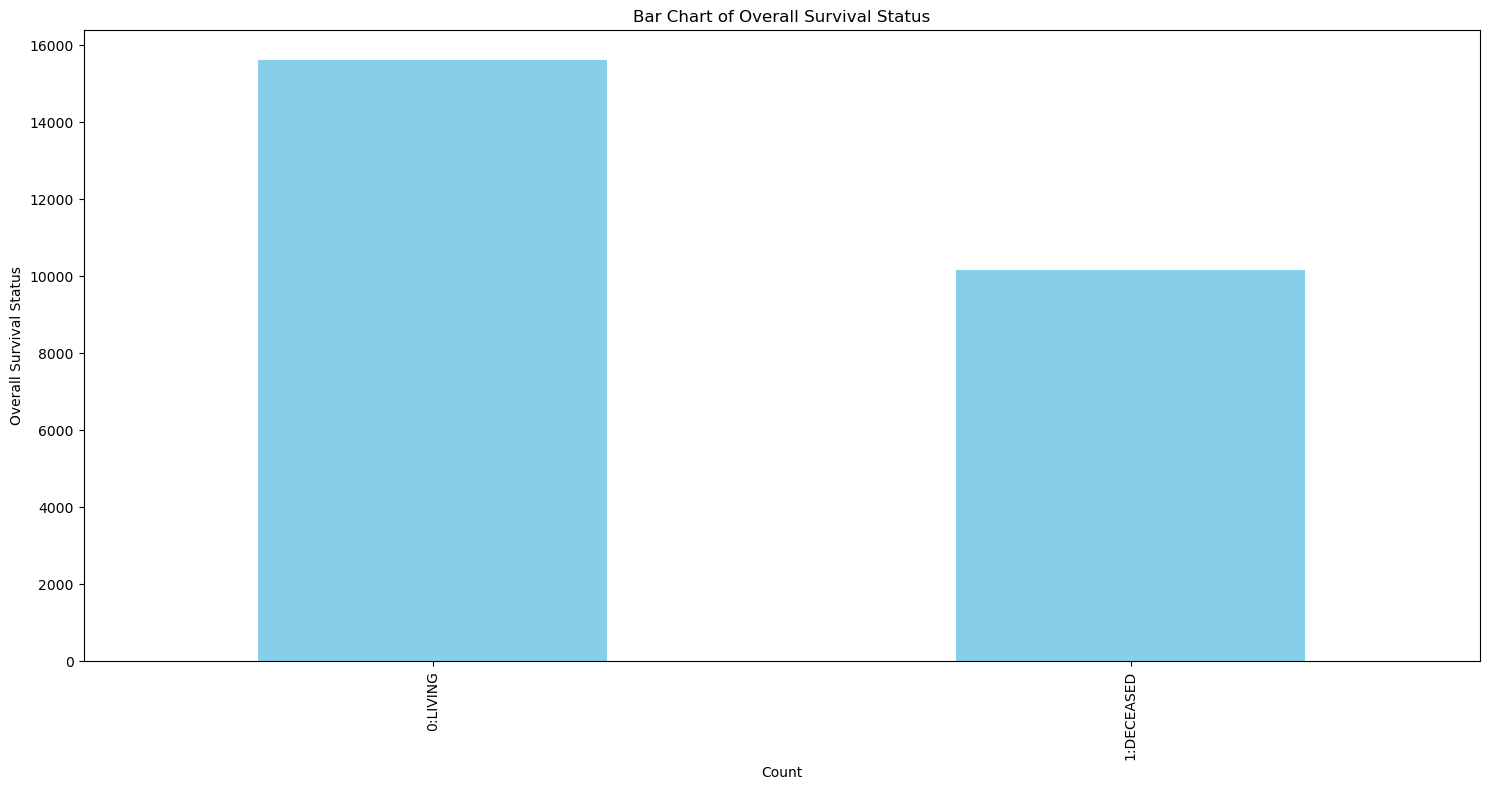

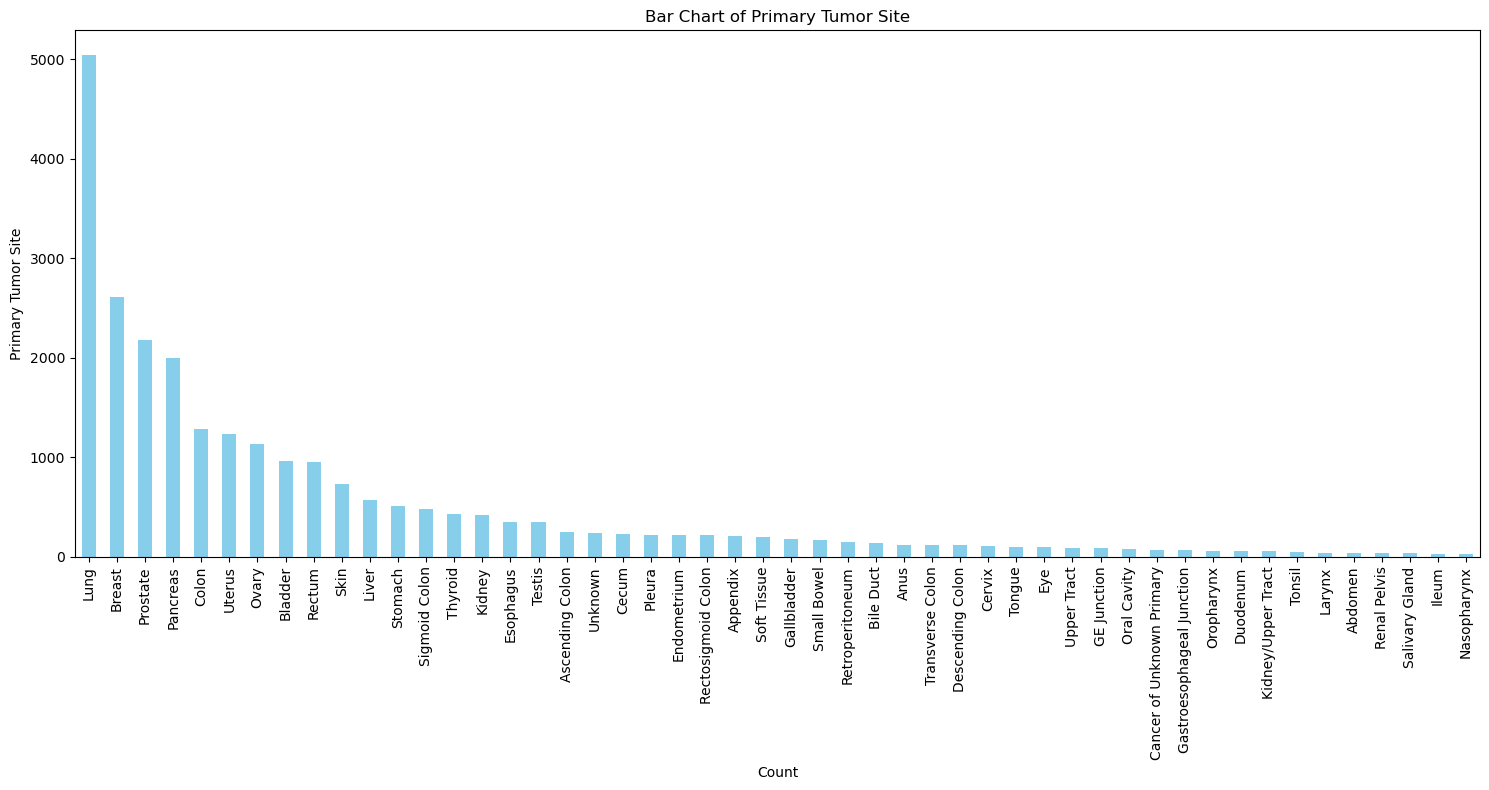

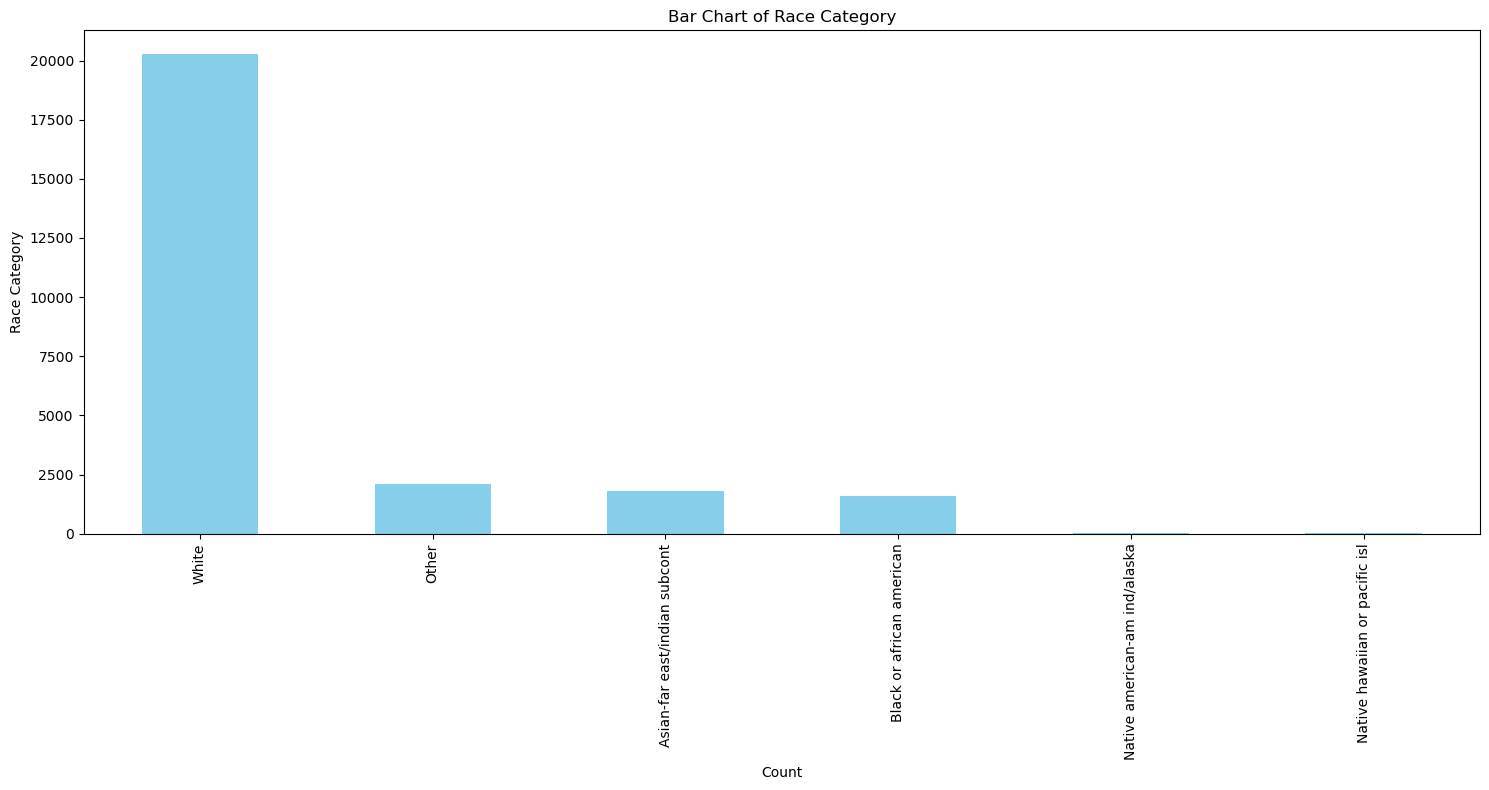

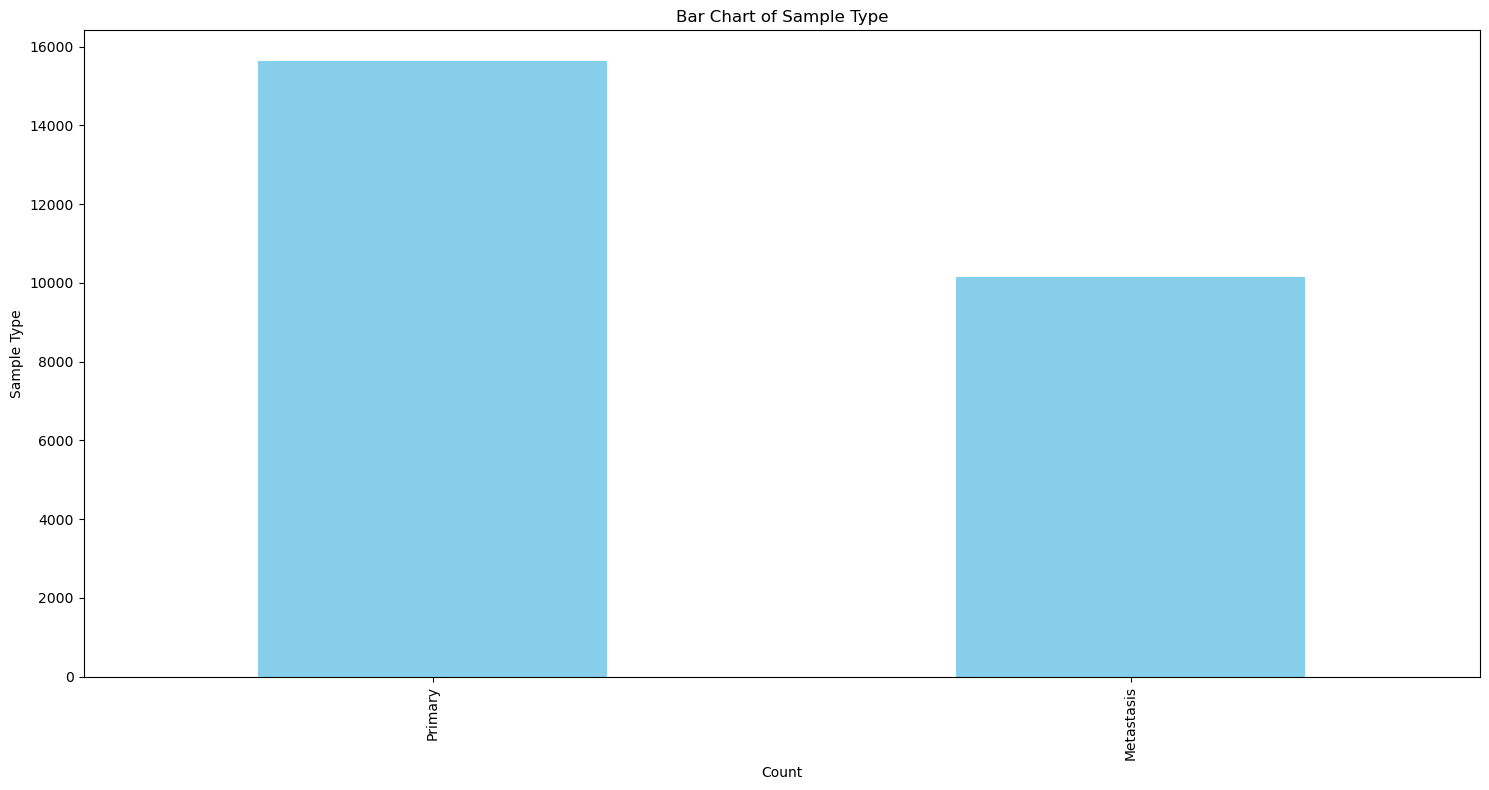

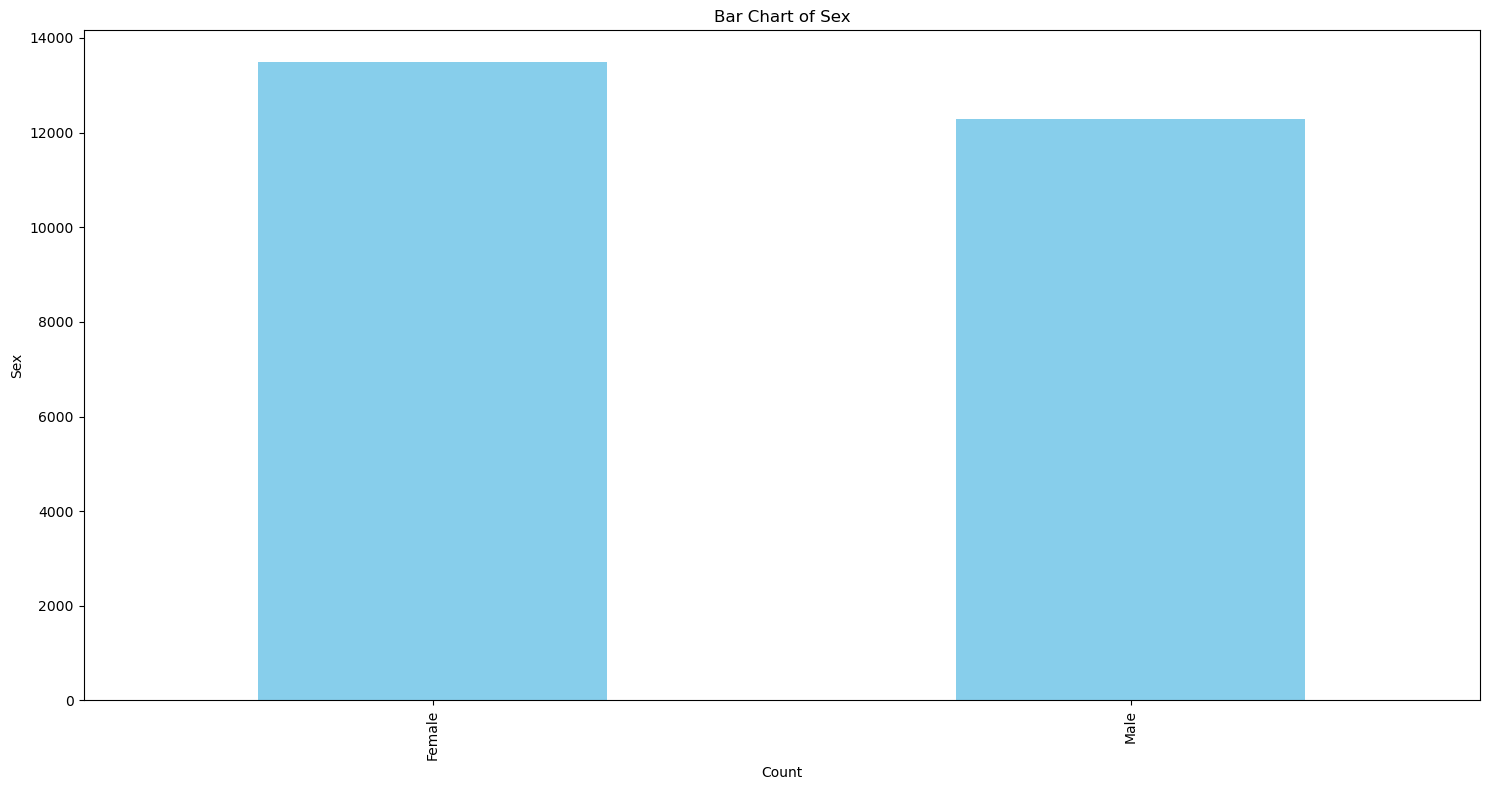

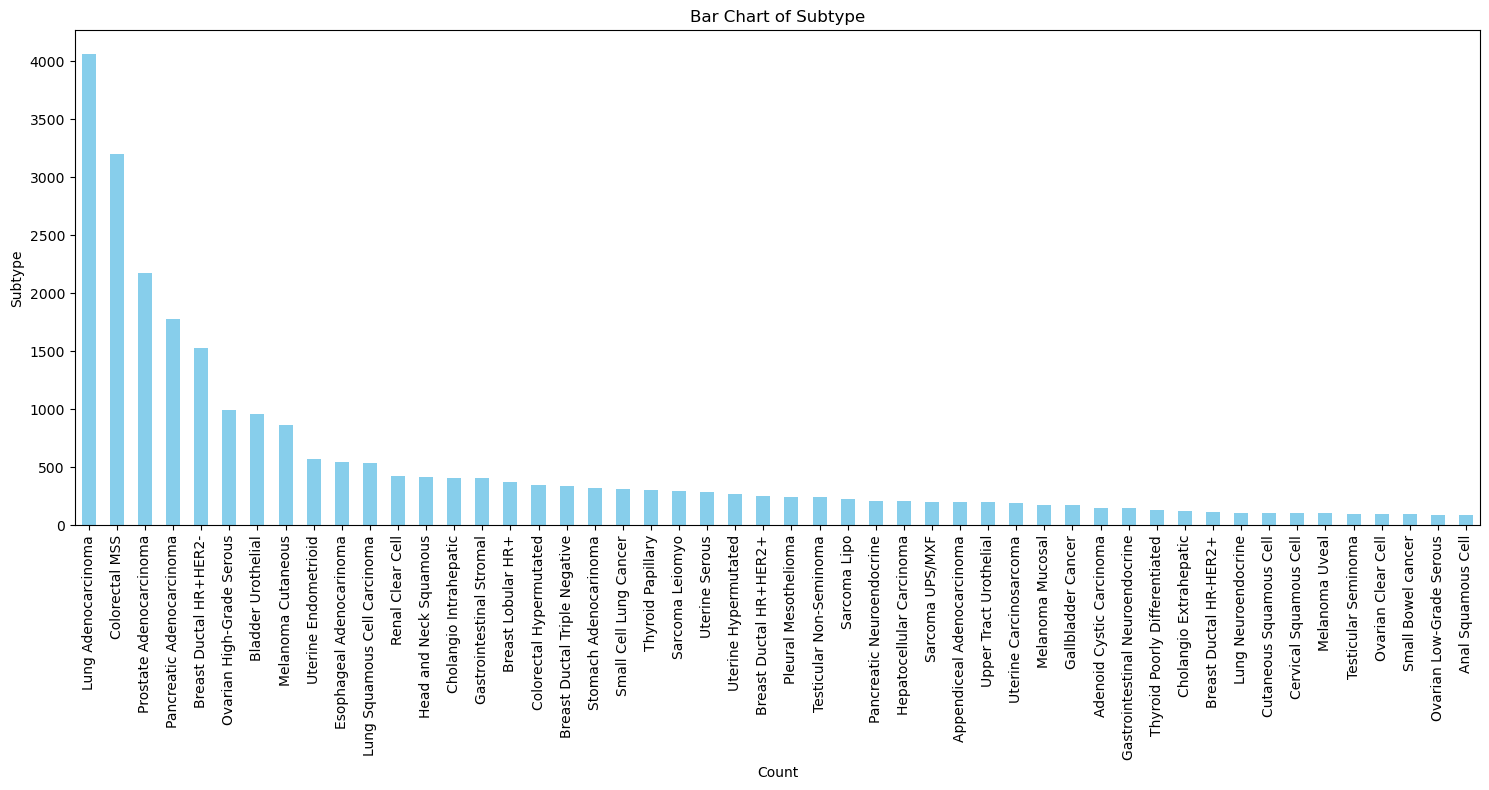

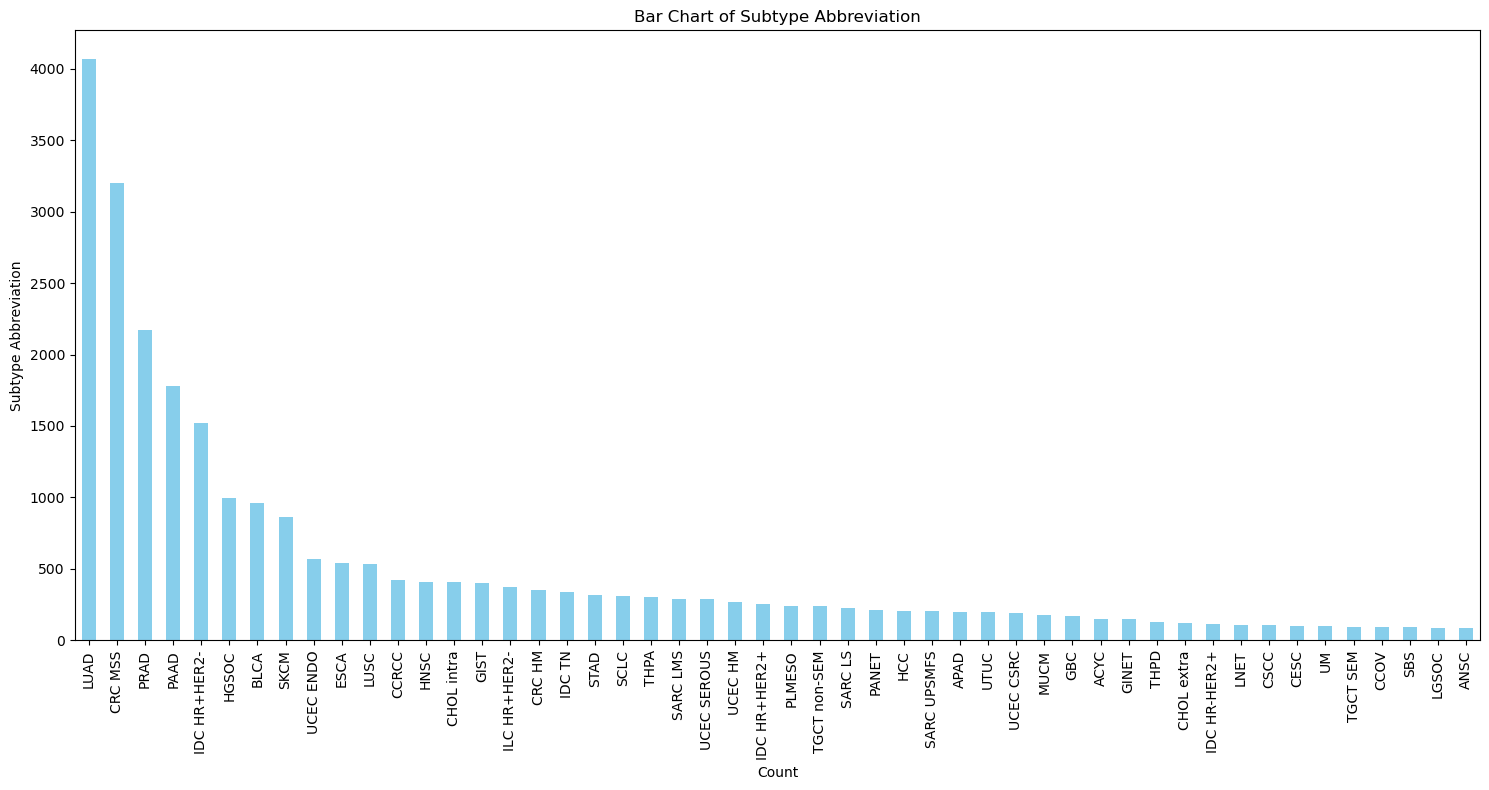

In [10]:
#set a for loop to loop through the categorical columns set above
for column in categorical_columns.columns:
    #set figure size
    plt.figure(figsize=(15, 8))  
    
    #show the value counts
    value_counts = df[column].value_counts()

    # Selecting to show the top 50 categories for readability
    top_categories = value_counts[:50]  
    
    # Using bar chart
    top_categories.plot(kind='bar', color='skyblue')

    #plot titles
    plt.title(f'Bar Chart of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    
    # Adjust layout for readability
    plt.tight_layout()  
    plt.show()

**Findings:**

The distant mets categories are `Yes` or `No`, we will change these to `1` and `0` so we can use these in our modeling

There is also a class imbalance between those living and those deceased. There are more people in this study that are living. (~60/40) split.  There also seems to be a high proportion of individuals in this study with lung cancer followed by breast cancer which is indicative of the generalized population as these are the most prevalent

There are some categories with information that will not be necessary for modelling such as `Oncotree Code`, `Gene Panel` that will be dealt with later.

There are also some other categories that contain redundant information such as 
- `Cancer Type` and `Cancer Type Detailed`
- `Organ System` and `Primary Tumor Site`
- `Subtype` and `Subtype Abbreviation`

These will be dealt with moving forward.  We can see that there is an imbalance in a lot of these categorical features. Some will be kept and encoded and others will be dropped for modelling. This will happen during feature engineering/selection



In [306]:
# inspect the subtype and subtype abbreviation categories:
df.groupby(['Subtype', 'Subtype Abbreviation'])['Subtype'].count()

Subtype                          Subtype Abbreviation
Adenoid Cystic Carcinoma         ACYC                     152
Anal Squamous Cell               ANSC                      87
Appendiceal Adenocarcinoma       APAD                     202
Bladder Urothelial               BLCA                     961
Breast Ductal HR+HER2+           IDC HR+HER2+             256
Breast Ductal HR+HER2-           IDC HR+HER2-            1524
Breast Ductal HR-HER2+           IDC HR-HER2+             115
Breast Ductal Triple Negative    IDC TN                   341
Breast Lobular HR+               ILC HR+HER2-             373
Cervical Squamous Cell           CESC                     103
Cholangio Extrahepatic           CHOL extra               119
Cholangio Intrahepatic           CHOL intra               407
Colorectal Hypermutated          CRC HM                   351
Colorectal MSS                   CRC MSS                 3197
Cutaneous Squamous Cell          CSCC                     105
Esophageal Adeno

In [307]:
#drop subtype abreviation category
#first dave the df as a copy
df_2 = df.copy()

In [308]:
#drop the column:
df_2.drop(columns = ['Subtype Abbreviation'], inplace=True)

In [309]:
#sanity check
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25775 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age at Sequencing              25775 non-null  float64
 1   Age at Surgical Procedure      25775 non-null  float64
 2   Cancer Type                    25775 non-null  object 
 3   Cancer Type Detailed           25775 non-null  object 
 4   Distant Mets: Adrenal Gland    25775 non-null  object 
 5   Distant Mets: Biliary tract    25775 non-null  object 
 6   Distant Mets: Bladder/UT       25775 non-null  object 
 7   Distant Mets: Bone             25775 non-null  object 
 8   Distant Mets: Bowel            25775 non-null  object 
 9   Distant Mets: Breast           25775 non-null  object 
 10  Distant Mets: CNS/Brain        25775 non-null  object 
 11  Distant Mets: Distant LN       25775 non-null  object 
 12  Distant Mets: Female Ge

## Feature Engineering (First Iteration): <a class="anchor" id="fa"></a>


First lets take a look at the correlations of the numeric columns prior to doing any feature engineering or feature selection so we can compare to the correlations after features have been transformed and dropped to see if there are significan differences

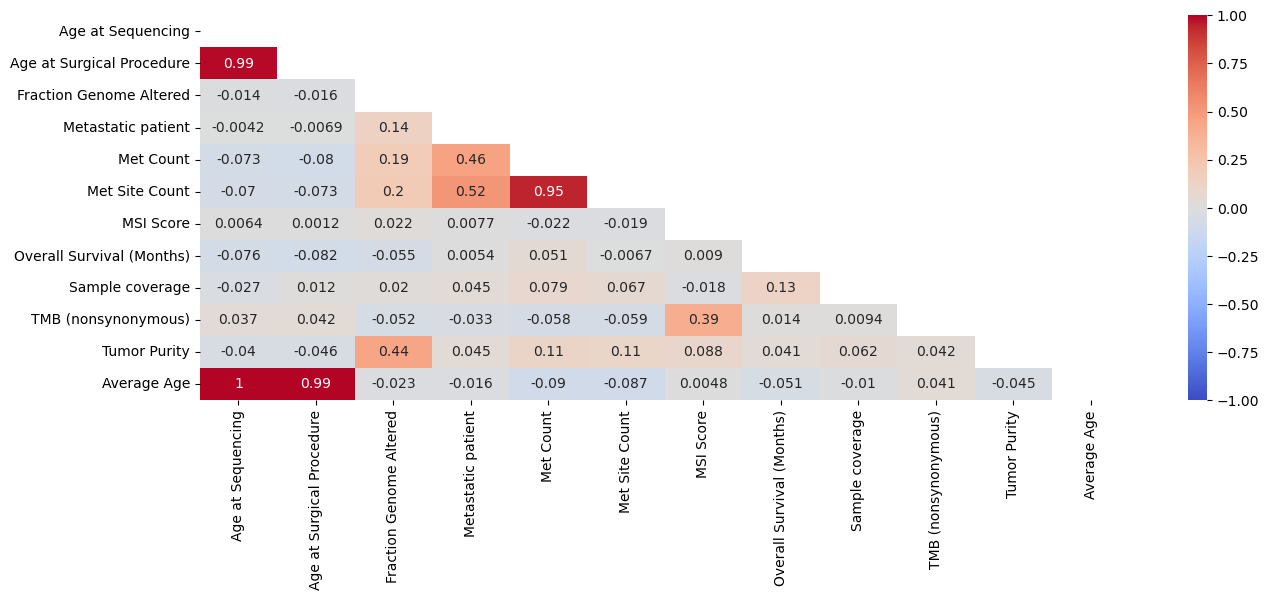

In [310]:
#check the correlations heatmap
corr_df = df.corr(numeric_only=True)
mask = np.triu(corr_df)

plt.figure(figsize=(15, 5))
sns.heatmap(corr_df, vmin=-1.0, vmax=1.0, annot=True, mask=mask, cmap='coolwarm')
plt.show()

**Observations**:

As we can see there are some numeric features that still exhibit high postive correlation with other columns. We can see that these include multiple of the `Age` columns. For the purpose of this project, we will only use the one of these: `Average Age` column in our feature space. This is one that was created during the data cleaning process and includes all the average ages during the study. Only one age column is necessary as multiple will not help the power of the model since they all should have the same distributions and variance. 

Next, we can see that the `Met Site Count` is highly correlated with `Met Count`. The reason these features are highly correlated is because the number of metastases a patient has can be related to the number of metastatic sites in advanced stages of the disease. That being said, more investigation will need to be done to determine which of these columns can be dropped. 

Something to note:

Having multiple metastatic sites is generally more concerning and contributes to a worse prognosis than having multiple metastases in one organ. Multiple metastatic sites indicates a more advanced stage of cancer(more spreading) and can make treatment more difficult as different organs will respond differently to treatments, leading to a worse prognosis. However, it should be noted that multiple metastases in a single organ can severly affect the function of said organ. This can be significant if they are present in critical organs and can indicate an agressive disease. However, a single metastasis in a vital organ can be more life threatening than many metastasis in a less crucial organ. When multiple small metastases are confined to an organ, localized treatment may end up being quite successful in treating the disease versus wide spread metastatic disease.

All these must be considered before selecting one of the features to include in modeling. More investigation needs to be performed to determine which feature contributes more to the variance in the Overall Survivability.

Before performing feature selection, lets take a look at our categorical features to see what is important for modeling and needs to be transformed to numerical data and what is not.

### Categorical Features:

---
First, lets inspect the columns that have the locations of the distant mets. These can be important in determining prognosis so we will convert these to numerical values to be able to train our model with this information. Since these are essentially binary columns, we can map Yes = 1 and No = 0. 

In [311]:
#check that the word distant is in all the mets columns
for column in df_2.columns:
    if 'distant' in column.lower():
        print(df_2[column].value_counts())

Distant Mets: Adrenal Gland
No     23967
Yes     1808
Name: count, dtype: int64
Distant Mets: Biliary tract
No     23107
Yes     2668
Name: count, dtype: int64
Distant Mets: Bladder/UT
No     23951
Yes     1824
Name: count, dtype: int64
Distant Mets: Bone
No     18578
Yes     7197
Name: count, dtype: int64
Distant Mets: Bowel
No     22563
Yes     3212
Name: count, dtype: int64
Distant Mets: Breast
No     25467
Yes      308
Name: count, dtype: int64
Distant Mets: CNS/Brain
No     22854
Yes     2921
Name: count, dtype: int64
Distant Mets: Distant LN
No     19726
Yes     6049
Name: count, dtype: int64
Distant Mets: Female Genital
No     23699
Yes     2076
Name: count, dtype: int64
Distant Mets: Head and Neck
No     25385
Yes      390
Name: count, dtype: int64
Distant Mets: Intra-Abdominal
No     19616
Yes     6159
Name: count, dtype: int64
Distant Mets: Kidney
No     24901
Yes      874
Name: count, dtype: int64
Distant Mets: Liver
No     16982
Yes     8793
Name: count, dtype: int64
Distan

As you can see, the columns that specify where the mets are located for the patient are either `Yes` or `No`. We will map these to `Yes = 1` and `No = 0` so we can use them if we need to in future modeling

In [312]:
#next map 1 and 0 to the distant mets columns

for column in df_2.columns:
    #iterate through the columns in the data frame and find columns that have the word distant in them. if they do then change the yes to 1 and no to 0
    if 'distant' in column.lower():
        df_2[column] = df_2[column].map({'Yes': 1, 'No': 0})

In [313]:
#sanity check
df_2.head()

Age at Sequencing  Age at Surgical Procedure  \
Sample ID                                                         
P-0000004-T01-IM3              39.74                      37.03   
P-0000015-T01-IM3              44.44                      44.42   
P-0000024-T01-IM3              61.33                      61.00   
P-0000025-T02-IM5              74.81                      74.64   
P-0000026-T01-IM3              71.72                      71.58   

                          Cancer Type  \
Sample ID                               
P-0000004-T01-IM3       Breast Cancer   
P-0000015-T01-IM3       Breast Cancer   
P-0000024-T01-IM3  Endometrial Cancer   
P-0000025-T02-IM5  Endometrial Cancer   
P-0000026-T01-IM3  Endometrial Cancer   

                                                Cancer Type Detailed  \
Sample ID                                                              
P-0000004-T01-IM3                   Breast Invasive Ductal Carcinoma   
P-0000015-T01-IM3                   Breast Invasive Ductal Carcinoma   
P-0000024-T01-IM3                     Uterine Endometrioid Carcinoma   
P-0000025-T02-IM5  Uterine Serous Carcinoma/Uterine Papillary Ser...   
P-0000026-T01-IM3                     Uterine Endometrioid Carcinoma   

                   Distant Mets: Adrenal Gland  Distant Mets: Biliary tract  \
Sample ID                                                                     
P-0000004-T01-IM3                            0                            0   
P-0000015-T01-IM3                            0                            0   
P-0000024-T01-IM3                            0                            0   
P-0000025-T02-IM5                            1                            1   
P-0000026-T01-IM3                            0                            0   

                   Distant Mets: Bladder/UT  Distant Mets: Bone  \
Sample ID                                                         
P-0000004-T01-IM3                         0                   1   
P-0000015-T01-IM3                         0                   1   
P-0000024-T01-IM3                         0                   1   
P-0000025-T02-IM5                         0                   0   
P-0000026-T01-IM3                         0                   0   

                   Distant Mets: Bowel  Distant Mets: Breast  ...  \
Sample ID                                                     ...   
P-0000004-T01-IM3                    0                     0  ...   
P-0000015-T01-IM3                    0                     0  ...   
P-0000024-T01-IM3                    0                     0  ...   
P-0000025-T02-IM5                    1                     0  ...   
P-0000026-T01-IM3                    1                     0  ...   

                   Overall Survival Status  Primary Tumor Site  \
Sample ID                                                        
P-0000004-T01-IM3               1:DECEASED              Breast   
P-0000015-T01-IM3               1:DECEASED              Breast   
P-0000024-T01-IM3               1:DECEASED              Uterus   
P-0000025-T02-IM5               1:DECEASED              Uterus   
P-0000026-T01-IM3                 0:LIVING              Uterus   

                                   Race Category  Sample coverage  \
Sample ID                                                           
P-0000004-T01-IM3                          White              428   
P-0000015-T01-IM3                          White              281   
P-0000024-T01-IM3                          White             1016   
P-0000025-T02-IM5                          White             1147   
P-0000026-T01-IM3  Asian-far east/indian subcont             1222   

                   Sample Type     Sex                 Subtype  \
Sample ID                                                        
P-0000004-T01-IM3      Primary  Female  Breast Ductal HR+HER2-   
P-0000015-T01-IM3   Metastasis  Female  Breast Ductal HR+HER2-   
P-0000024-T01-IM3   Metastasis  Femal

In [314]:
#sanity check to see that these columns have been converted to numerical columns:
df_2.info()

#as we can see, they are all now in the Dtype of int64

<class 'pandas.core.frame.DataFrame'>
Index: 25775 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age at Sequencing              25775 non-null  float64
 1   Age at Surgical Procedure      25775 non-null  float64
 2   Cancer Type                    25775 non-null  object 
 3   Cancer Type Detailed           25775 non-null  object 
 4   Distant Mets: Adrenal Gland    25775 non-null  int64  
 5   Distant Mets: Biliary tract    25775 non-null  int64  
 6   Distant Mets: Bladder/UT       25775 non-null  int64  
 7   Distant Mets: Bone             25775 non-null  int64  
 8   Distant Mets: Bowel            25775 non-null  int64  
 9   Distant Mets: Breast           25775 non-null  int64  
 10  Distant Mets: CNS/Brain        25775 non-null  int64  
 11  Distant Mets: Distant LN       25775 non-null  int64  
 12  Distant Mets: Female Ge

In [315]:
#check out how the mets columns are distributed for interest sake, we may need this later
import matplotlib.pyplot as plt

#set a list for the sums
distant_mets_sums = []

#a for loop to find the columns that have distant in the name and iterate through to add the sums to the list
for column in df_2.columns:
    if 'distant' in column.lower():
        total = df_2[column].sum()
        distant_mets_sums.append(total)

#Get the column names for the df
columns = [column for column in df_2.columns if 'distant' in column.lower()]

#find the percentage of the total data frame that is included in the mets columns
positive_percent = [(count / df_2.shape[0]) * 100 for count in distant_mets_sums]

#make a new data frame with the information collected above
df_sums = pd.DataFrame({
    'Met Column':columns,
    'Positive Count': distant_mets_sums,
    'Positive Percent': positive_percent
})


#sort values and display
df_sums = df_sums.sort_values('Positive Count', ascending=True)
df_sums

Met Column  Positive Count  Positive Percent
5            Distant Mets: Breast             308          1.194956
9     Distant Mets: Head and Neck             390          1.513094
11           Distant Mets: Kidney             874          3.390883
15      Distant Mets: Mediastinum             895          3.472357
14     Distant Mets: Male Genital             908          3.522793
16            Distant Mets: Ovary             982          3.809893
19             Distant Mets: Skin            1327          5.148400
0     Distant Mets: Adrenal Gland            1808          7.014549
2        Distant Mets: Bladder/UT            1824          7.076625
18              Distant Mets: PNS            1870          7.255092
8    Distant Mets: Female Genital            2076          8.054316
1     Distant Mets: Biliary tract            2668         10.351115
6         Distant Mets: CNS/Brain            2921         11.332687
4             Distant Mets: Bowel            3212         12.461688
17           Distant Mets: Pleura            3525         13.676043
7        Distant Mets: Distant LN            6049         23.468477
10  Distant Mets: Intra-Abdominal            6159         23.895247
3              Distant Mets: Bone            7197         27.922405
13             Distant Mets: Lung            7929         30.762367
12            Distant Mets: Liver            8793         34.114452
20      Distant Mets: Unspecified           15919         61.761397

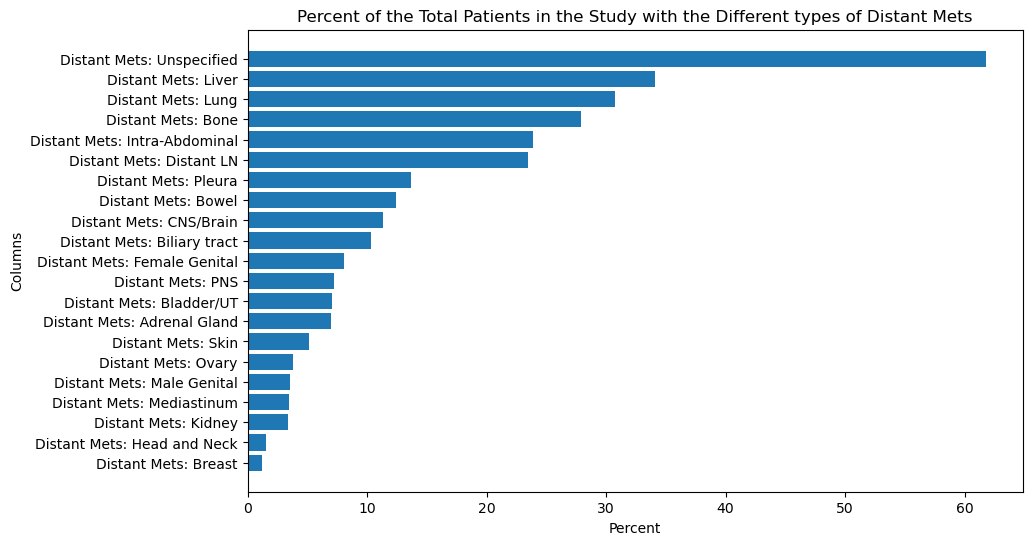

In [316]:
# plot the results to see the distribution of the mets columns after transforming. We can see which are most prevalent.

#set figure size
plt.figure(figsize=(10,6))

#set chart type
plt.barh(df_sums['Met Column'], df_sums['Positive Percent'])

#label axis and chart
plt.ylabel('Columns')
plt.xlabel('Percent')
plt.title('Percent of the Total Patients in the Study with the Different types of Distant Mets')
plt.xticks()  

#show chart
plt.show()

**Observations**:

---

We can see that the `Distant Mets: Unspecified` occurs most frequently. As these categories are sparse, we may need to drop one during modeling for prevention of the dummy variable trap. We will visit this when we need to at modeling, this would be a good candidate to drop as there is less information here than in the other features of this type.

---
Next lets take a look at the `Overall Survival Status` categorical feature. This tells us if a person is living or deceased.

The column for `Overall Survival Status` is also categorical but has binary values: `0:LIVING, 1:DECEASED`.  To make this variable make more sense, we will transform this column to a binary column: `1 = Living`, `0 = Deceased`. This will be interpreted as those living: Survial Status = True = 1 and those deceased: Survival Status False = 0. This is much easier to intrpret than the values prior.  I will also rename this column to `Overall Survival Status: Living`.

In [317]:
#check the values of the column
df_2['Overall Survival Status'].value_counts()

Overall Survival Status
0:LIVING      15606
1:DECEASED    10169
Name: count, dtype: int64

In [318]:
 #change the values
df_2['Overall Survival Status'] = df_2['Overall Survival Status'].map({'0:LIVING': 1, '1:DECEASED': 0})

In [319]:
# sanity check
df_2['Overall Survival Status'].value_counts()

Overall Survival Status
1    15606
0    10169
Name: count, dtype: int64

In [320]:
#rename the column:
df_2.rename(columns={'Overall Survival Status': 'Overall Survival Status: Living'}, inplace=True)

In [321]:
#check the head of the df for a sanity check, see that the column was renamed.
df_2.head()

Age at Sequencing  Age at Surgical Procedure  \
Sample ID                                                         
P-0000004-T01-IM3              39.74                      37.03   
P-0000015-T01-IM3              44.44                      44.42   
P-0000024-T01-IM3              61.33                      61.00   
P-0000025-T02-IM5              74.81                      74.64   
P-0000026-T01-IM3              71.72                      71.58   

                          Cancer Type  \
Sample ID                               
P-0000004-T01-IM3       Breast Cancer   
P-0000015-T01-IM3       Breast Cancer   
P-0000024-T01-IM3  Endometrial Cancer   
P-0000025-T02-IM5  Endometrial Cancer   
P-0000026-T01-IM3  Endometrial Cancer   

                                                Cancer Type Detailed  \
Sample ID                                                              
P-0000004-T01-IM3                   Breast Invasive Ductal Carcinoma   
P-0000015-T01-IM3                   Breast Invasive Ductal Carcinoma   
P-0000024-T01-IM3                     Uterine Endometrioid Carcinoma   
P-0000025-T02-IM5  Uterine Serous Carcinoma/Uterine Papillary Ser...   
P-0000026-T01-IM3                     Uterine Endometrioid Carcinoma   

                   Distant Mets: Adrenal Gland  Distant Mets: Biliary tract  \
Sample ID                                                                     
P-0000004-T01-IM3                            0                            0   
P-0000015-T01-IM3                            0                            0   
P-0000024-T01-IM3                            0                            0   
P-0000025-T02-IM5                            1                            1   
P-0000026-T01-IM3                            0                            0   

                   Distant Mets: Bladder/UT  Distant Mets: Bone  \
Sample ID                                                         
P-0000004-T01-IM3                         0                   1   
P-0000015-T01-IM3                         0                   1   
P-0000024-T01-IM3                         0                   1   
P-0000025-T02-IM5                         0                   0   
P-0000026-T01-IM3                         0                   0   

                   Distant Mets: Bowel  Distant Mets: Breast  ...  \
Sample ID                                                     ...   
P-0000004-T01-IM3                    0                     0  ...   
P-0000015-T01-IM3                    0                     0  ...   
P-0000024-T01-IM3                    0                     0  ...   
P-0000025-T02-IM5                    1                     0  ...   
P-0000026-T01-IM3                    1                     0  ...   

                   Overall Survival Status: Living  Primary Tumor Site  \
Sample ID                                                                
P-0000004-T01-IM3                                0              Breast   
P-0000015-T01-IM3                                0              Breast   
P-0000024-T01-IM3                                0              Uterus   
P-0000025-T02-IM5                                0              Uterus   
P-0000026-T01-IM3                                1              Uterus   

                                   Race Category  Sample coverage  \
Sample ID                                                           
P-0000004-T01-IM3                          White              428   
P-0000015-T01-IM3                          White              281   
P-0000024-T01-IM3                          White             1016   
P-0000025-T02-IM5                          White             1147   
P-0000026-T01-IM3  Asian-far east/indian subcont             1222   

                   Sample Type     Sex                 Subtype  \
Sample ID                                                        
P-0000004-T01-IM3      Primary  Female  Breast Ductal HR+HER2-   
P-0000015-T01-IM3   Metastasis  Female  Breast 

In [322]:
#sanity check to see that this feature has been renamed and transformed to a numerical feature.
df_2.info()
#as we can see, the column has been renamed and is now in the Dtype of int64

<class 'pandas.core.frame.DataFrame'>
Index: 25775 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age at Sequencing                25775 non-null  float64
 1   Age at Surgical Procedure        25775 non-null  float64
 2   Cancer Type                      25775 non-null  object 
 3   Cancer Type Detailed             25775 non-null  object 
 4   Distant Mets: Adrenal Gland      25775 non-null  int64  
 5   Distant Mets: Biliary tract      25775 non-null  int64  
 6   Distant Mets: Bladder/UT         25775 non-null  int64  
 7   Distant Mets: Bone               25775 non-null  int64  
 8   Distant Mets: Bowel              25775 non-null  int64  
 9   Distant Mets: Breast             25775 non-null  int64  
 10  Distant Mets: CNS/Brain          25775 non-null  int64  
 11  Distant Mets: Distant LN         25775 non-null  int64  


---
Next, lets see how we can deal with the non-binary categorical features.

In [323]:
#check the number of categorical columns
df_2.select_dtypes(include = ['object']).info()


<class 'pandas.core.frame.DataFrame'>
Index: 25775 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cancer Type           25775 non-null  object
 1   Cancer Type Detailed  25775 non-null  object
 2   Gene Panel            25775 non-null  object
 3   MSI Type              25775 non-null  object
 4   Oncotree Code         25775 non-null  object
 5   Organ System          25775 non-null  object
 6   Primary Tumor Site    25775 non-null  object
 7   Race Category         25775 non-null  object
 8   Sample Type           25775 non-null  object
 9   Sex                   25771 non-null  object
 10  Subtype               25775 non-null  object
dtypes: object(11)
memory usage: 2.4+ MB


There are 11 categorical columns remaining. Lets see what we can do for those that may be important in future modelling.

In [324]:
#first lets re-instantiate the categorical columns data frame

categorical_columns = df_2.select_dtypes(include = ['object'])

In [325]:
#sanity check
categorical_columns.head()

Cancer Type  \
Sample ID                               
P-0000004-T01-IM3       Breast Cancer   
P-0000015-T01-IM3       Breast Cancer   
P-0000024-T01-IM3  Endometrial Cancer   
P-0000025-T02-IM5  Endometrial Cancer   
P-0000026-T01-IM3  Endometrial Cancer   

                                                Cancer Type Detailed  \
Sample ID                                                              
P-0000004-T01-IM3                   Breast Invasive Ductal Carcinoma   
P-0000015-T01-IM3                   Breast Invasive Ductal Carcinoma   
P-0000024-T01-IM3                     Uterine Endometrioid Carcinoma   
P-0000025-T02-IM5  Uterine Serous Carcinoma/Uterine Papillary Ser...   
P-0000026-T01-IM3                     Uterine Endometrioid Carcinoma   

                  Gene Panel MSI Type Oncotree Code Organ System  \
Sample ID                                                          
P-0000004-T01-IM3  IMPACT341   Stable           IDC       Breast   
P-0000015-T01-IM3  IMPACT341   Stable           IDC       Breast   
P-0000024-T01-IM3  IMPACT341   Stable           UEC  Gynecologic   
P-0000025-T02-IM5  IMPACT410   Stable           USC  Gynecologic   
P-0000026-T01-IM3  IMPACT341   Stable           UEC  Gynecologic   

                  Primary Tumor Site                  Race Category  \
Sample ID                                                             
P-0000004-T01-IM3             Breast                          White   
P-0000015-T01-IM3             Breast                          White   
P-0000024-T01-IM3             Uterus                          White   
P-0000025-T02-IM5             Uterus                          White   
P-0000026-T01-IM3             Uterus  Asian-far east/indian subcont   

                  Sample Type     Sex                 Subtype  
Sample ID                                                      
P-0000004-T01-IM3     Primary  Female  Breast Ductal HR+HER2-  
P-0000015-T01-IM3  Metastasis  Female  Breast Ductal HR+HER2-  
P-0000024-T01-IM3  Metastasis  Female    Uterine Endometrioid  
P-0000025-T02-IM5  Metastasis  Female          Uterine Serous  
P-0000026-T01-IM3  Metastasis  Female    Uterine Endometrioid

In [326]:
#lets take a look at what values these columns contain so we can determine how to deal with them
for column in categorical_columns:
    print(f'{column.upper()} VALUES:\n{"-" * (len(column) + 7)}\n\n{df_2[column].value_counts()}\n\n')

CANCER TYPE VALUES:
------------------

Cancer Type
Non-Small Cell Lung Cancer               4710
Colorectal Cancer                        3548
Breast Cancer                            2609
Prostate Cancer                          2172
Pancreatic Cancer                        1990
Endometrial Cancer                       1315
Ovarian Cancer                           1183
Bladder Cancer                           1158
Melanoma                                 1142
Hepatobiliary Cancer                      902
Esophagogastric Cancer                    862
Soft Tissue Sarcoma                       560
Thyroid Cancer                            438
Renal Cell Carcinoma                      421
Head and Neck Cancer                      412
Gastrointestinal Stromal Tumor            403
Germ Cell Tumor                           337
Small Cell Lung Cancer                    314
Mesothelioma                              244
Appendiceal Cancer                        202
Uterine Sarcoma             

In [327]:
#To do:
# drop CANCER TYPE DETAILED - too many values and we have a cancer type column*
#drop PRIMARY TUMOR SITE VALUES - too many values we ahve organ type*
#drop ONCOTREE CODE VALUES as they are same as cancer type detailed*
#drop SUBTYPE VALUES: too many columns*

#encode tumor type??
#encode sex - binary/dummy
#encode race-dummy
#CANCER TYPE VALUES - dummy
#encode: MSI TYPE VALUES - ordinal? /ohe
# encode ORGAN SYSTEM VALUES:
#encode: primary vs metastisis - ? ordinal / ohe


Next we will deal with the `Cancer Type` and `Cancer Type Detailed`, `Oncotree Code`, `Subtype` and `Gene Panel` columns. 

In [328]:
#make a copy of the df
df_3 = df_2.copy()

In [329]:
#drop columns
df_3 = df_3.drop(columns = ['Cancer Type Detailed', 'Primary Tumor Site', 'Oncotree Code', 'Subtype', 'Gene Panel' ])

In [330]:
#sanity check
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25775 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age at Sequencing                25775 non-null  float64
 1   Age at Surgical Procedure        25775 non-null  float64
 2   Cancer Type                      25775 non-null  object 
 3   Distant Mets: Adrenal Gland      25775 non-null  int64  
 4   Distant Mets: Biliary tract      25775 non-null  int64  
 5   Distant Mets: Bladder/UT         25775 non-null  int64  
 6   Distant Mets: Bone               25775 non-null  int64  
 7   Distant Mets: Bowel              25775 non-null  int64  
 8   Distant Mets: Breast             25775 non-null  int64  
 9   Distant Mets: CNS/Brain          25775 non-null  int64  
 10  Distant Mets: Distant LN         25775 non-null  int64  
 11  Distant Mets: Female Genital     25775 non-null  int64  


In [331]:
#check the Bool Metastatic patient
df_3['Metastatic patient'].value_counts()

Metastatic patient
True     21546
False     4229
Name: count, dtype: int64

In [332]:
#convert to a int feature
df_3['Metastatic patient'] = df_3['Metastatic patient'].astype(int)

In [333]:
#sanity check
df_3['Metastatic patient'].value_counts()

Metastatic patient
1    21546
0     4229
Name: count, dtype: int64

In [334]:
#remaining categorical features:
df_3.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 25775 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Cancer Type    25775 non-null  object
 1   MSI Type       25775 non-null  object
 2   Organ System   25775 non-null  object
 3   Race Category  25775 non-null  object
 4   Sample Type    25775 non-null  object
 5   Sex            25771 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [335]:
#check null values
df_3.isna().sum()

Age at Sequencing                  0
Age at Surgical Procedure          0
Cancer Type                        0
Distant Mets: Adrenal Gland        0
Distant Mets: Biliary tract        0
Distant Mets: Bladder/UT           0
Distant Mets: Bone                 0
Distant Mets: Bowel                0
Distant Mets: Breast               0
Distant Mets: CNS/Brain            0
Distant Mets: Distant LN           0
Distant Mets: Female Genital       0
Distant Mets: Head and Neck        0
Distant Mets: Intra-Abdominal      0
Distant Mets: Kidney               0
Distant Mets: Liver                0
Distant Mets: Lung                 0
Distant Mets: Male Genital         0
Distant Mets: Mediastinum          0
Distant Mets: Ovary                0
Distant Mets: Pleura               0
Distant Mets: PNS                  0
Distant Mets: Skin                 0
Distant Mets: Unspecified          0
Fraction Genome Altered            0
Metastatic patient                 0
Met Count                          0
M

In [336]:
#drop sex is NaN first
df_3 = df_3.dropna(axis=0)

In [337]:
#sanity check
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age at Sequencing                25771 non-null  float64
 1   Age at Surgical Procedure        25771 non-null  float64
 2   Cancer Type                      25771 non-null  object 
 3   Distant Mets: Adrenal Gland      25771 non-null  int64  
 4   Distant Mets: Biliary tract      25771 non-null  int64  
 5   Distant Mets: Bladder/UT         25771 non-null  int64  
 6   Distant Mets: Bone               25771 non-null  int64  
 7   Distant Mets: Bowel              25771 non-null  int64  
 8   Distant Mets: Breast             25771 non-null  int64  
 9   Distant Mets: CNS/Brain          25771 non-null  int64  
 10  Distant Mets: Distant LN         25771 non-null  int64  
 11  Distant Mets: Female Genital     25771 non-null  int64  


In [338]:
# map sex to female = 1, male = 0
df_3['Sex'] = df_3['Sex'].map({'Female': 1, 'Male': 0})


In [339]:
# rename sex column to be more informative
df_3.rename(columns={'Sex': 'Sex (Female)'}, inplace=True)

In [340]:
#sanity check
df_3['Sex (Female)'].value_counts()

Sex (Female)
1    13485
0    12286
Name: count, dtype: int64

In [341]:
#check remaining categorical features
df_3.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Cancer Type    25771 non-null  object
 1   MSI Type       25771 non-null  object
 2   Organ System   25771 non-null  object
 3   Race Category  25771 non-null  object
 4   Sample Type    25771 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


In [342]:
#convert sample type
df_3['Sample Type'] = df_3['Sample Type'].map({'Primary': 0, 'Metastasis': 1})

In [343]:
#rename to make more informative
df_3.rename(columns={'Sample Type': 'Sample Type (Metastasis)'}, inplace=True)

In [344]:
# sanity check
df_3['Sample Type (Metastasis)'].value_counts()


Sample Type (Metastasis)
0    15629
1    10142
Name: count, dtype: int64

In [345]:
#check remaining categorical features
df_3.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Cancer Type    25771 non-null  object
 1   MSI Type       25771 non-null  object
 2   Organ System   25771 non-null  object
 3   Race Category  25771 non-null  object
dtypes: object(4)
memory usage: 1006.7+ KB


In [346]:
#ohe on cancer type cancer type:

#import necessary library
from sklearn.preprocessing import OneHotEncoder

#instantiate One Hot encoder
ohe = OneHotEncoder(sparse=False)

#set the feature to be in a variable for encoding. 
# OHE expects a 2D array, so we first convert the column into a DataFrame

cancer_type = pd.DataFrame(df_3['Cancer Type'])

#fit transform the feature with the ohe encoder
cancer_type_encoded = ohe.fit_transform(cancer_type)

# sanity check
cancer_type_encoded



/Users/RahimKaba/anaconda3/envs/plotly_bokeh2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [347]:
#check the category names
ohe.categories_

[array(['Anal Cancer', 'Appendiceal Cancer', 'Bladder Cancer',
        'Breast Cancer', 'Cervical Cancer', 'Colorectal Cancer',
        'Endometrial Cancer', 'Esophagogastric Cancer',
        'Gastrointestinal Neuroendocrine Tumor',
        'Gastrointestinal Stromal Tumor', 'Germ Cell Tumor',
        'Head and Neck Cancer', 'Hepatobiliary Cancer', 'Melanoma',
        'Mesothelioma', 'Non-Small Cell Lung Cancer', 'Ovarian Cancer',
        'Pancreatic Cancer', 'Prostate Cancer', 'Renal Cell Carcinoma',
        'Salivary Gland Cancer', 'Skin Cancer, Non-Melanoma',
        'Small Bowel Cancer', 'Small Cell Lung Cancer',
        'Soft Tissue Sarcoma', 'Thyroid Cancer', 'Uterine Sarcoma'],
       dtype=object)]

In [348]:
# create a df
cancer_type_encoded_df = pd.DataFrame(cancer_type_encoded, columns=ohe.categories_, dtype=int)
cancer_type_encoded_df

Anal Cancer Appendiceal Cancer Bladder Cancer Breast Cancer  \
0               0                  0              0             1   
1               0                  0              0             1   
2               0                  0              0             0   
3               0                  0              0             0   
4               0                  0              0             0   
...           ...                ...            ...           ...   
25766           0                  0              1             0   
25767           0                  0              0             0   
25768           0                  0              0             0   
25769           0                  0              0             0   
25770           0                  0              0             0   

      Cervical Cancer Colorectal Cancer Endometrial Cancer  \
0                   0                 0                  0   
1                   0                 0                  0   
2                   0                 0                  1   
3                   0                 0                  1   
4                   0                 0                  1   
...               ...               ...                ...   
25766               0                 0                  0   
25767               0                 0                  0   
25768               0                 0                  1   
25769               0                 1                  0   
25770               0                 0                  0   

      Esophagogastric Cancer Gastrointestinal Neuroendocrine Tumor  \
0                          0                                     0   
1                          0                                     0   
2                          0                                     0   
3                          0                                     0   
4                          0                                     0   
...                      ...                                   ...   
25766                      0                                     0   
25767                      0                                     0   
25768                      0                                     0   
25769                      0                                     0   
25770                      0                                     0   

      Gastrointestinal Stromal Tumor  ... Pancreatic Cancer Prostate Cancer  \
0                                  0  ...                 0               0   
1                                  0  ...                 0               0   
2                                  0  ...                 0               0   
3                                  0  ...                 0               0   
4                                  0  ...                 0               0   
...                              ...  ...               ...             ...   
25766                              0  ...                 0               0   
25767                              0  ...                 0               0   
25768                              0  ...                 0               0   
25769                              0  ...                 0               0   
25770                              0  ...                 0               0   

      Renal Cell Carcinoma Salivary Gland Cancer Skin Cancer, Non-Melanoma  \
0                        0                     0                         0   
1                        0                     0                         0   
2                        0                     0                         0   
3                        0                     0                         0   
4                        0                     0                         0   
...                    ...                   ...                       ...   
25766                    0                     0                         0   
25767             

In [349]:
#check the new column names
print(cancer_type_encoded_df.columns)
#we can see we have a multi index column names for the ohe df created. we need to flatten these before concatenating

MultiIndex([(                          'Anal Cancer',),
            (                   'Appendiceal Cancer',),
            (                       'Bladder Cancer',),
            (                        'Breast Cancer',),
            (                      'Cervical Cancer',),
            (                    'Colorectal Cancer',),
            (                   'Endometrial Cancer',),
            (               'Esophagogastric Cancer',),
            ('Gastrointestinal Neuroendocrine Tumor',),
            (       'Gastrointestinal Stromal Tumor',),
            (                      'Germ Cell Tumor',),
            (                 'Head and Neck Cancer',),
            (                 'Hepatobiliary Cancer',),
            (                             'Melanoma',),
            (                         'Mesothelioma',),
            (           'Non-Small Cell Lung Cancer',),
            (                       'Ovarian Cancer',),
            (                    'Pancreatic Can

In [350]:
#want to remove the tuples so take the first value of each tuple = flatten the column names
cancer_type_encoded_df.columns = cancer_type_encoded_df.columns.get_level_values(0)

In [351]:
#sanity check
print(cancer_type_encoded_df.columns)

Index(['Anal Cancer', 'Appendiceal Cancer', 'Bladder Cancer', 'Breast Cancer',
       'Cervical Cancer', 'Colorectal Cancer', 'Endometrial Cancer',
       'Esophagogastric Cancer', 'Gastrointestinal Neuroendocrine Tumor',
       'Gastrointestinal Stromal Tumor', 'Germ Cell Tumor',
       'Head and Neck Cancer', 'Hepatobiliary Cancer', 'Melanoma',
       'Mesothelioma', 'Non-Small Cell Lung Cancer', 'Ovarian Cancer',
       'Pancreatic Cancer', 'Prostate Cancer', 'Renal Cell Carcinoma',
       'Salivary Gland Cancer', 'Skin Cancer, Non-Melanoma',
       'Small Bowel Cancer', 'Small Cell Lung Cancer', 'Soft Tissue Sarcoma',
       'Thyroid Cancer', 'Uterine Sarcoma'],
      dtype='object')


In [352]:
#set the index of the df to be that of df_3 before concatenate
cancer_type_encoded_df = cancer_type_encoded_df.set_index(df_3.index)

#sanity check
cancer_type_encoded_df

Anal Cancer  Appendiceal Cancer  Bladder Cancer  \
Sample ID                                                            
P-0000004-T01-IM3            0                   0               0   
P-0000015-T01-IM3            0                   0               0   
P-0000024-T01-IM3            0                   0               0   
P-0000025-T02-IM5            0                   0               0   
P-0000026-T01-IM3            0                   0               0   
...                        ...                 ...             ...   
P-0050559-T01-IM6            0                   0               1   
P-0050565-T01-IM6            0                   0               0   
P-0050566-T01-IM6            0                   0               0   
P-0050567-T01-IM6            0                   0               0   
P-0050568-T01-IM6            0                   0               0   

                   Breast Cancer  Cervical Cancer  Colorectal Cancer  \
Sample ID                                                              
P-0000004-T01-IM3              1                0                  0   
P-0000015-T01-IM3              1                0                  0   
P-0000024-T01-IM3              0                0                  0   
P-0000025-T02-IM5              0                0                  0   
P-0000026-T01-IM3              0                0                  0   
...                          ...              ...                ...   
P-0050559-T01-IM6              0                0                  0   
P-0050565-T01-IM6              0                0                  0   
P-0050566-T01-IM6              0                0                  0   
P-0050567-T01-IM6              0                0                  1   
P-0050568-T01-IM6              0                0                  0   

                   Endometrial Cancer  Esophagogastric Cancer  \
Sample ID                                                       
P-0000004-T01-IM3                   0                       0   
P-0000015-T01-IM3                   0                       0   
P-0000024-T01-IM3                   1                       0   
P-0000025-T02-IM5                   1                       0   
P-0000026-T01-IM3                   1                       0   
...                               ...                     ...   
P-0050559-T01-IM6                   0                       0   
P-0050565-T01-IM6                   0                       0   
P-0050566-T01-IM6                   1                       0   
P-0050567-T01-IM6                   0                       0   
P-0050568-T01-IM6                   0                       0   

                   Gastrointestinal Neuroendocrine Tumor  \
Sample ID                                                  
P-0000004-T01-IM3                                      0   
P-0000015-T01-IM3                                      0   
P-0000024-T01-IM3                                      0   
P-0000025-T02-IM5                                      0   
P-0000026-T01-IM3                                      0   
...                                                  ...   
P-0050559-T01-IM6                                      0   
P-0050565-T01-IM6                                      0   
P-0050566-T01-IM6                                      0   
P-0050567-T01-IM6                                      0   
P-0050568-T01-IM6                                      0   

                   Gastrointestinal Stromal Tumor  ...  Pancreatic Cancer  \
Sample ID                                          ...                      
P-0000004-T01-IM3                               0  ...                  0   
P-0000015-T01-IM3                               0  ...                  0   
P-0000024-T01-IM3                               0  ...                  0   
P-0000025-T02-IM5                               0  ...                  0   
P-0000026-T01-IM3                               0  ...                  0   
...  

In [353]:
#concatenate the ohe columns into the df_3 data frame
df_3 = pd.concat([df_3, cancer_type_encoded_df], axis=1)

In [354]:
#sanity check
df_3.head()

Age at Sequencing  Age at Surgical Procedure  \
Sample ID                                                         
P-0000004-T01-IM3              39.74                      37.03   
P-0000015-T01-IM3              44.44                      44.42   
P-0000024-T01-IM3              61.33                      61.00   
P-0000025-T02-IM5              74.81                      74.64   
P-0000026-T01-IM3              71.72                      71.58   

                          Cancer Type  Distant Mets: Adrenal Gland  \
Sample ID                                                            
P-0000004-T01-IM3       Breast Cancer                            0   
P-0000015-T01-IM3       Breast Cancer                            0   
P-0000024-T01-IM3  Endometrial Cancer                            0   
P-0000025-T02-IM5  Endometrial Cancer                            1   
P-0000026-T01-IM3  Endometrial Cancer                            0   

                   Distant Mets: Biliary tract  Distant Mets: Bladder/UT  \
Sample ID                                                                  
P-0000004-T01-IM3                            0                         0   
P-0000015-T01-IM3                            0                         0   
P-0000024-T01-IM3                            0                         0   
P-0000025-T02-IM5                            1                         0   
P-0000026-T01-IM3                            0                         0   

                   Distant Mets: Bone  Distant Mets: Bowel  \
Sample ID                                                    
P-0000004-T01-IM3                   1                    0   
P-0000015-T01-IM3                   1                    0   
P-0000024-T01-IM3                   1                    0   
P-0000025-T02-IM5                   0                    1   
P-0000026-T01-IM3                   0                    1   

                   Distant Mets: Breast  Distant Mets: CNS/Brain  ...  \
Sample ID                                                         ...   
P-0000004-T01-IM3                     0                        0  ...   
P-0000015-T01-IM3                     0                        1  ...   
P-0000024-T01-IM3                     0                        0  ...   
P-0000025-T02-IM5                     0                        0  ...   
P-0000026-T01-IM3                     0                        0  ...   

                   Pancreatic Cancer  Prostate Cancer  Renal Cell Carcinoma  \
Sample ID                                                                     
P-0000004-T01-IM3                  0                0                     0   
P-0000015-T01-IM3                  0                0                     0   
P-0000024-T01-IM3                  0                0                     0   
P-0000025-T02-IM5                  0                0                     0   
P-0000026-T01-IM3                  0                0                     0   

                   Salivary Gland Cancer  Skin Cancer, Non-Melanoma  \
Sample ID                                                             
P-0000004-T01-IM3                      0                          0   
P-0000015-T01-IM3                      0                          0   
P-0000024-T01-IM3                      0                          0   
P-0000025-T02-IM5                      0                          0   
P-0000026-T01-IM3                      0                          0   

                   Small Bowel Cancer  Small Cell Lung Cancer  \
Sample ID                                                       
P-0000004-T01-IM3                   0                       0   
P-0000015-T01-IM3                   0                       0   
P-0000024-T01-IM3                   0                       0   
P-0000025-T02-IM5                   0                       0   
P-0000026-T01-IM3                   0                       0   

                   Soft Tissue Sarcoma  Thyroid Cancer  Uterine Sarcom

In [355]:
#check the features we have
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 67 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age at Sequencing                      25771 non-null  float64
 1   Age at Surgical Procedure              25771 non-null  float64
 2   Cancer Type                            25771 non-null  object 
 3   Distant Mets: Adrenal Gland            25771 non-null  int64  
 4   Distant Mets: Biliary tract            25771 non-null  int64  
 5   Distant Mets: Bladder/UT               25771 non-null  int64  
 6   Distant Mets: Bone                     25771 non-null  int64  
 7   Distant Mets: Bowel                    25771 non-null  int64  
 8   Distant Mets: Breast                   25771 non-null  int64  
 9   Distant Mets: CNS/Brain                25771 non-null  int64  
 10  Distant Mets: Distant LN               25771 no

In [356]:
#check the remaining categorical features - cancer type is still present but we will drop this once we are done dealing with all categorical features.
df_3.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Cancer Type    25771 non-null  object
 1   MSI Type       25771 non-null  object
 2   Organ System   25771 non-null  object
 3   Race Category  25771 non-null  object
dtypes: object(4)
memory usage: 1006.7+ KB


In [357]:
#instantiate one hot encoder for encoding Race Category
ohe = OneHotEncoder(sparse=False)

# OHE expects a 2D array, so we first convert the column into a DataFrame
race = pd.DataFrame(df_3['Race Category'])

#fit_transform the race df with ohe
race_encoded = ohe.fit_transform(race)

#sanity check
race_encoded

/Users/RahimKaba/anaconda3/envs/plotly_bokeh2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [358]:
#sanity check on the category names. We want to make these more descriptive so i am going to add a prefix race_ to each category
ohe.categories_

[array(['Asian-far east/indian subcont', 'Black or african american',
        'Native american-am ind/alaska', 'Native hawaiian or pacific isl',
        'Other', 'White'], dtype=object)]

In [359]:
#add the race encoded into a data frame to add prefix and to prepare to concatenate
race_encoded_df = pd.DataFrame(race_encoded, columns=ohe.categories_, dtype=int)

#add prefix race so the feature anmes are more informative
race_encoded_df = race_encoded_df.add_prefix('race_')

#sanity check
race_encoded_df

race_Asian-far east/indian subcont race_Black or african american  \
0                                      0                              0   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      1                              0   
...                                  ...                            ...   
25766                                  0                              0   
25767                                  0                              0   
25768                                  0                              0   
25769                                  0                              0   
25770                                  0                              0   

      race_Native american-am ind/alaska race_Native hawaiian or pacific isl  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   
...                                  ...                                 ...   
25766                                  0                                   0   
25767                                  0                                   0   
25768                                  0                                   0   
25769                                  0                                   0   
25770                                  0                                   0   

      race_Other race_White  
0              0          1  
1              0          1  
2              0          1  
3              0          1  
4              0          0  
...          ...        ...  
25766          0          1  
25767          0          1  
25768          0          1  
25769          0          1  
25770          0          1  

[25771 rows x 6 columns]

In [360]:
#check if multi index?
print(race_encoded_df.columns)
# we need to flatten the index

MultiIndex([( 'race_Asian-far east/indian subcont',),
            (     'race_Black or african american',),
            ( 'race_Native american-am ind/alaska',),
            ('race_Native hawaiian or pacific isl',),
            (                         'race_Other',),
            (                         'race_White',)],
           )


In [361]:
#Flaten the multi index
race_encoded_df.columns = race_encoded_df.columns.get_level_values(0)

#set the index of the df to be that of df_3 before concatenate
race_encoded_df = race_encoded_df.set_index(df_3.index)

#sanity check
race_encoded_df.head()

race_Asian-far east/indian subcont  \
Sample ID                                               
P-0000004-T01-IM3                                   0   
P-0000015-T01-IM3                                   0   
P-0000024-T01-IM3                                   0   
P-0000025-T02-IM5                                   0   
P-0000026-T01-IM3                                   1   

                   race_Black or african american  \
Sample ID                                           
P-0000004-T01-IM3                               0   
P-0000015-T01-IM3                               0   
P-0000024-T01-IM3                               0   
P-0000025-T02-IM5                               0   
P-0000026-T01-IM3                               0   

                   race_Native american-am ind/alaska  \
Sample ID                                               
P-0000004-T01-IM3                                   0   
P-0000015-T01-IM3                                   0   
P-0000024-T01-IM3                                   0   
P-0000025-T02-IM5                                   0   
P-0000026-T01-IM3                                   0   

                   race_Native hawaiian or pacific isl  race_Other  race_White  
Sample ID                                                                       
P-0000004-T01-IM3                                    0           0           1  
P-0000015-T01-IM3                                    0           0           1  
P-0000024-T01-IM3                                    0           0           1  
P-0000025-T02-IM5                                    0           0           1  
P-0000026-T01-IM3                                    0           0           0

In [362]:
#concatenate the ohe race columns into the df_3 dataframe. Note we have not dropped the original column we will do that below
df_3 = pd.concat([df_3, race_encoded_df], axis=1)

#sanity check - to check columns were named correctly and that they are now of dtype int64 with no null values
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 73 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age at Sequencing                      25771 non-null  float64
 1   Age at Surgical Procedure              25771 non-null  float64
 2   Cancer Type                            25771 non-null  object 
 3   Distant Mets: Adrenal Gland            25771 non-null  int64  
 4   Distant Mets: Biliary tract            25771 non-null  int64  
 5   Distant Mets: Bladder/UT               25771 non-null  int64  
 6   Distant Mets: Bone                     25771 non-null  int64  
 7   Distant Mets: Bowel                    25771 non-null  int64  
 8   Distant Mets: Breast                   25771 non-null  int64  
 9   Distant Mets: CNS/Brain                25771 non-null  int64  
 10  Distant Mets: Distant LN               25771 no

In [363]:
#check the remaining categorical features.
#note we have already encoded Cancer Type and Race Category - we still need to drop these.

df_3.select_dtypes(include=['object']).info()


<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Cancer Type    25771 non-null  object
 1   MSI Type       25771 non-null  object
 2   Organ System   25771 non-null  object
 3   Race Category  25771 non-null  object
dtypes: object(4)
memory usage: 1006.7+ KB


In [364]:
#for MSI type we will combine intermediate and instable into one category (as the term intermediate usually is not used in practice)
#These are both instable categories and can be combined. 
#We will then encode the  MSI Type Instable = 1 and Stable = 0 using the map function

df_3['MSI Type'] = df_3['MSI Type'].map({'Stable':0, 'Indeterminate':1, 'Instable':1})


In [365]:
#we will rename this feature to be more informative

df_3.rename(columns={'MSI Type': 'MSI Instable'}, inplace=True)

In [366]:
#sanity check
df_3['MSI Instable'].value_counts()

MSI Instable
0    21876
1     3895
Name: count, dtype: int64

In [367]:
#for organ system we will use OHE

#instantiate one hot encoder for encoding Organ System
ohe = OneHotEncoder(sparse=False)

# OHE expects a 2D array, so we first convert the column into a DataFrame
organ = pd.DataFrame(df_3['Organ System'])

#fit_transform the race df with ohe
organ_encoded = ohe.fit_transform(organ)

#sanity check
organ_encoded

/Users/RahimKaba/anaconda3/envs/plotly_bokeh2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [368]:
#get the category names
ohe.categories_

[array(['Breast', 'Core GI', 'Developmental GI Tract', 'Endocrine',
        'Genitourinary', 'Gynecologic', 'Head and Neck', 'Skin',
        'Soft Tissue', 'Thoracic'], dtype=object)]

In [369]:
#add the prefix organ_ to make the features more informative

#add the race encoded into a data frame to add prefix and to prepare to concatenate
organ_encoded_df = pd.DataFrame(organ_encoded, columns=ohe.categories_, dtype=int)

#add prefix race so the feature anmes are more informative
organ_encoded_df = organ_encoded_df.add_prefix('organ_')

#sanity check
organ_encoded_df

organ_Breast organ_Core GI organ_Developmental GI Tract organ_Endocrine  \
0                1             0                            0               0   
1                1             0                            0               0   
2                0             0                            0               0   
3                0             0                            0               0   
4                0             0                            0               0   
...            ...           ...                          ...             ...   
25766            0             0                            0               0   
25767            0             0                            0               0   
25768            0             0                            0               0   
25769            0             1                            0               0   
25770            0             0                            0               0   

      organ_Genitourinary organ_Gynecologic organ_Head and Neck organ_Skin  \
0                       0                 0                   0          0   
1                       0                 0                   0          0   
2                       0                 1                   0          0   
3                       0                 1                   0          0   
4                       0                 1                   0          0   
...                   ...               ...                 ...        ...   
25766                   1                 0                   0          0   
25767                   0                 0                   0          0   
25768                   0                 1                   0          0   
25769                   0                 0                   0          0   
25770                   0                 0                   0          0   

      organ_Soft Tissue organ_Thoracic  
0                     0              0  
1                     0              0  
2                     0              0  
3                     0              0  
4                     0              0  
...                 ...            ...  
25766                 0              0  
25767                 0              1  
25768                 0              0  
25769                 0              0  
25770                 0              1  

[25771 rows x 10 columns]

In [370]:
#check if multi index?
print(organ_encoded_df.columns)
# we need to flatten the index

MultiIndex([(                'organ_Breast',),
            (               'organ_Core GI',),
            ('organ_Developmental GI Tract',),
            (             'organ_Endocrine',),
            (         'organ_Genitourinary',),
            (           'organ_Gynecologic',),
            (         'organ_Head and Neck',),
            (                  'organ_Skin',),
            (           'organ_Soft Tissue',),
            (              'organ_Thoracic',)],
           )


In [371]:
#Flaten the multi index
organ_encoded_df.columns = organ_encoded_df.columns.get_level_values(0)

#set the index of the df to be that of df_3 before concatenate
organ_encoded_df = organ_encoded_df.set_index(df_3.index)

#sanity check
organ_encoded_df.head()

organ_Breast  organ_Core GI  organ_Developmental GI Tract  \
Sample ID                                                                      
P-0000004-T01-IM3             1              0                             0   
P-0000015-T01-IM3             1              0                             0   
P-0000024-T01-IM3             0              0                             0   
P-0000025-T02-IM5             0              0                             0   
P-0000026-T01-IM3             0              0                             0   

                   organ_Endocrine  organ_Genitourinary  organ_Gynecologic  \
Sample ID                                                                    
P-0000004-T01-IM3                0                    0                  0   
P-0000015-T01-IM3                0                    0                  0   
P-0000024-T01-IM3                0                    0                  1   
P-0000025-T02-IM5                0                    0                  1   
P-0000026-T01-IM3                0                    0                  1   

                   organ_Head and Neck  organ_Skin  organ_Soft Tissue  \
Sample ID                                                               
P-0000004-T01-IM3                    0           0                  0   
P-0000015-T01-IM3                    0           0                  0   
P-0000024-T01-IM3                    0           0                  0   
P-0000025-T02-IM5                    0           0                  0   
P-0000026-T01-IM3                    0           0                  0   

                   organ_Thoracic  
Sample ID                          
P-0000004-T01-IM3               0  
P-0000015-T01-IM3               0  
P-0000024-T01-IM3               0  
P-0000025-T02-IM5               0  
P-0000026-T01-IM3               0

In [372]:
#concatenate the ohe organ columns into the df_3 dataframe. Note we have not dropped the original column we will do that below
df_3 = pd.concat([df_3, organ_encoded_df], axis=1)

In [373]:
#check features we have and their dtypes
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age at Sequencing                      25771 non-null  float64
 1   Age at Surgical Procedure              25771 non-null  float64
 2   Cancer Type                            25771 non-null  object 
 3   Distant Mets: Adrenal Gland            25771 non-null  int64  
 4   Distant Mets: Biliary tract            25771 non-null  int64  
 5   Distant Mets: Bladder/UT               25771 non-null  int64  
 6   Distant Mets: Bone                     25771 non-null  int64  
 7   Distant Mets: Bowel                    25771 non-null  int64  
 8   Distant Mets: Breast                   25771 non-null  int64  
 9   Distant Mets: CNS/Brain                25771 non-null  int64  
 10  Distant Mets: Distant LN               25771 no

In [374]:
#drop the 3 features with dtype object that we transformed using OHE.
columns_to_drop = df_3.select_dtypes(include=['object']).columns

#make a list of columns to drop
columns_to_drop

Index(['Cancer Type', 'Organ System', 'Race Category'], dtype='object')

In [375]:
#drop columns
df_3 = df_3.drop(columns_to_drop, axis=1)

In [376]:
#sanity check
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 80 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age at Sequencing                      25771 non-null  float64
 1   Age at Surgical Procedure              25771 non-null  float64
 2   Distant Mets: Adrenal Gland            25771 non-null  int64  
 3   Distant Mets: Biliary tract            25771 non-null  int64  
 4   Distant Mets: Bladder/UT               25771 non-null  int64  
 5   Distant Mets: Bone                     25771 non-null  int64  
 6   Distant Mets: Bowel                    25771 non-null  int64  
 7   Distant Mets: Breast                   25771 non-null  int64  
 8   Distant Mets: CNS/Brain                25771 non-null  int64  
 9   Distant Mets: Distant LN               25771 non-null  int64  
 10  Distant Mets: Female Genital           25771 no

All columns are now numerical. We have drastically increased our feature space using One Hot Encoding for some categorical features. We dropped redundant columns and encoded the others.  Next, I want to prepare my feature of interest `Overall Survival (Months)`. Currently it is a float numerical value but I want to round it to give my model a more simple target to predict.  We may need to do some more transformations but we can begin basic modeling after this.

### Numerical Features - Feature Engineering:

I want to deal with some of the features that showed high correlations above. We had mutliple age columns, and I will drop those and keep the created `Average Age` column for modeling (only one is needed). We will drop:

- `Age at Sequencing`
- `Age at Surgical Procedure`

Above, I spoke about dropping either `Met Count` or `Met Site Count`.  For my initial modeling, I will keep both of these as they can both be important for prognosis prediction as described above. With regularization in my models, the one which is contributing least to predicitive power will be penalized more heavily so I can keep them for now. 

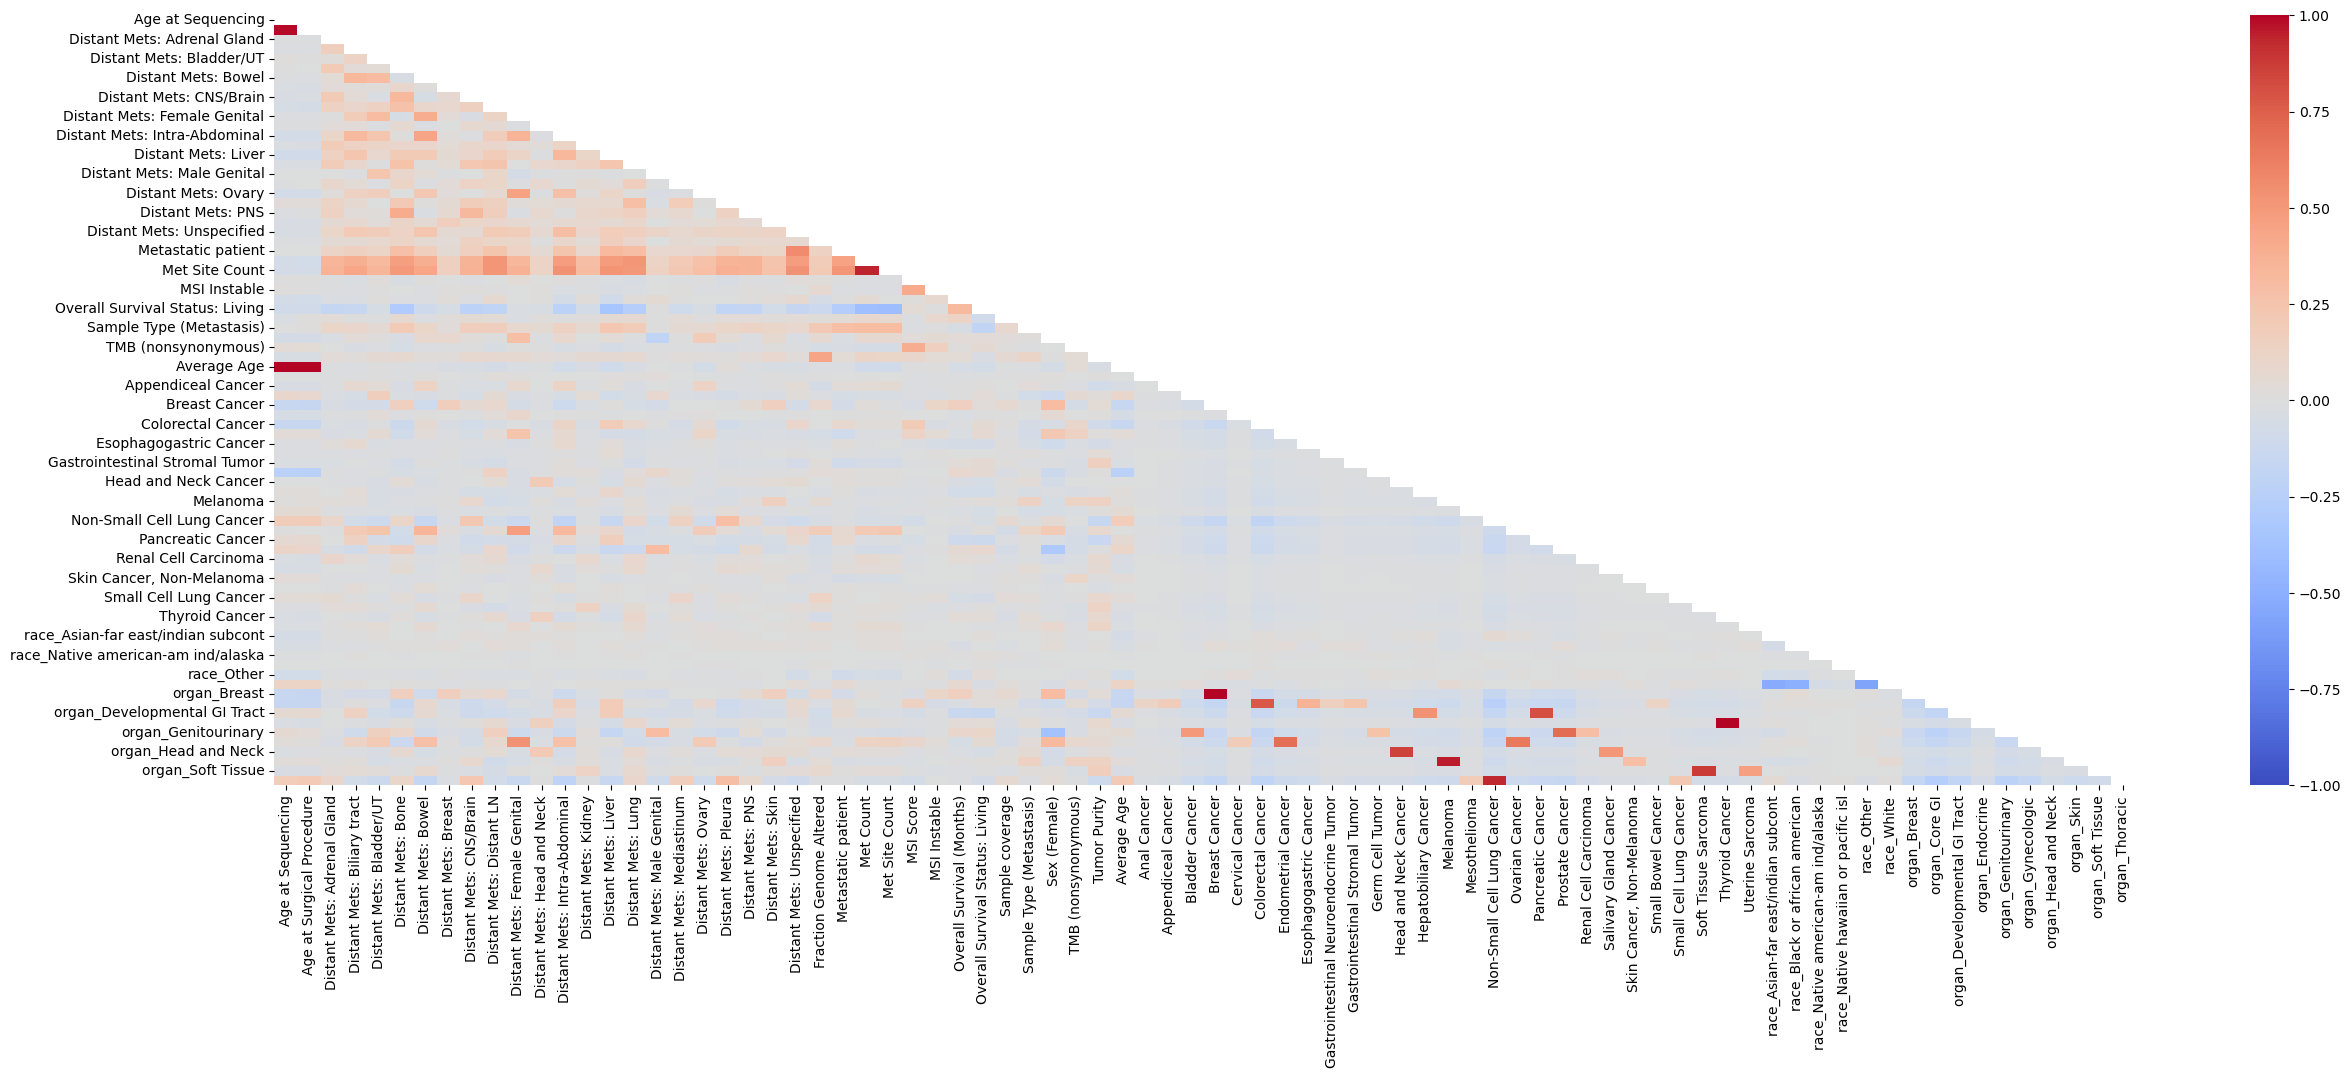

In [377]:
#first check the correlations heatmap
corr_df = df_3.corr(numeric_only=True)
mask = np.triu(corr_df)

plt.figure(figsize=(30, 10))
sns.heatmap(corr_df, vmin=-1.0, vmax=1.0, mask=mask, cmap='coolwarm')
plt.show()

In [378]:
#select the columns to drop
columns_to_drop = ['Age at Sequencing', 'Age at Surgical Procedure']

#drop columns
df_3 = df_3.drop(columns=columns_to_drop, axis=1)

In [379]:
#sanity check - from 80 features to 78
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 78 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Distant Mets: Adrenal Gland            25771 non-null  int64  
 1   Distant Mets: Biliary tract            25771 non-null  int64  
 2   Distant Mets: Bladder/UT               25771 non-null  int64  
 3   Distant Mets: Bone                     25771 non-null  int64  
 4   Distant Mets: Bowel                    25771 non-null  int64  
 5   Distant Mets: Breast                   25771 non-null  int64  
 6   Distant Mets: CNS/Brain                25771 non-null  int64  
 7   Distant Mets: Distant LN               25771 non-null  int64  
 8   Distant Mets: Female Genital           25771 non-null  int64  
 9   Distant Mets: Head and Neck            25771 non-null  int64  
 10  Distant Mets: Intra-Abdominal          25771 no

In [380]:
# round overall survivability target feature
df_3['Overall Survival (Months)'] = np.ceil(df_3['Overall Survival (Months)']).astype(int)

In [381]:
#sanity check
df_3['Overall Survival (Months)']

Sample ID
P-0000004-T01-IM3     4
P-0000015-T01-IM3    14
P-0000024-T01-IM3    36
P-0000025-T02-IM5    46
P-0000026-T01-IM3    81
                     ..
P-0050559-T01-IM6    11
P-0050565-T01-IM6    11
P-0050566-T01-IM6    11
P-0050567-T01-IM6    11
P-0050568-T01-IM6     0
Name: Overall Survival (Months), Length: 25771, dtype: int64

In [382]:
#transform target to years
df_3['Overall Survival (Years)'] = df_3['Overall Survival (Months)'] / 12


In [383]:
#sanity check
df_3['Overall Survival (Years)']

Sample ID
P-0000004-T01-IM3    0.333333
P-0000015-T01-IM3    1.166667
P-0000024-T01-IM3    3.000000
P-0000025-T02-IM5    3.833333
P-0000026-T01-IM3    6.750000
                       ...   
P-0050559-T01-IM6    0.916667
P-0050565-T01-IM6    0.916667
P-0050566-T01-IM6    0.916667
P-0050567-T01-IM6    0.916667
P-0050568-T01-IM6    0.000000
Name: Overall Survival (Years), Length: 25771, dtype: float64

In [384]:
#sanity check if column is present
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 79 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Distant Mets: Adrenal Gland            25771 non-null  int64  
 1   Distant Mets: Biliary tract            25771 non-null  int64  
 2   Distant Mets: Bladder/UT               25771 non-null  int64  
 3   Distant Mets: Bone                     25771 non-null  int64  
 4   Distant Mets: Bowel                    25771 non-null  int64  
 5   Distant Mets: Breast                   25771 non-null  int64  
 6   Distant Mets: CNS/Brain                25771 non-null  int64  
 7   Distant Mets: Distant LN               25771 non-null  int64  
 8   Distant Mets: Female Genital           25771 non-null  int64  
 9   Distant Mets: Head and Neck            25771 non-null  int64  
 10  Distant Mets: Intra-Abdominal          25771 no

In [385]:
#check counts of target
df_3['Overall Survival (Years)'].value_counts()

Overall Survival (Years)
0.000000    1098
1.000000     917
1.333333     828
1.083333     783
1.166667     778
            ... 
6.500000      16
6.416667      13
6.583333       9
6.666667       8
6.750000       2
Name: count, Length: 82, dtype: int64

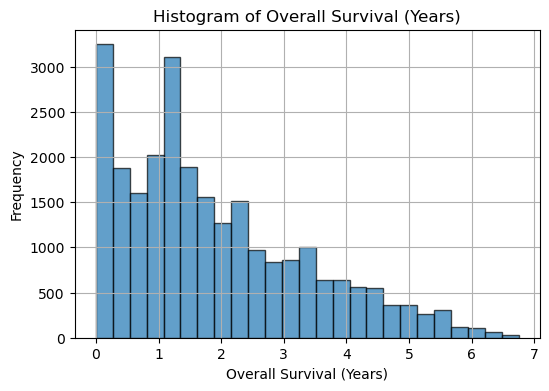

In [386]:
#plot distribution
plt.figure(figsize=(6, 4))  
plt.hist(df_3['Overall Survival (Years)'], bins=25, edgecolor='k', alpha=0.7)  
plt.title(f'Histogram of Overall Survival (Years)') 
plt.xlabel('Overall Survival (Years)') 
plt.ylabel('Frequency') 
plt.grid(True)
plt.show()  

create a year group column:

- group 1: < 1 year
- group 2: 1-2 years
- group 3: 2-4 years
- group 4: > 4 years

In [387]:
#create bins for the categories stated above
bins = [0, 1, 2, 4, float('inf')]

#create labels for the bins
labels = ['0-1 years', '1-2 years', '2-4 years', '>4 years']

#create the features right=false so doesnt include the bin on the right
df_3['Year Group'] = pd.cut(df_3['Overall Survival (Years)'], bins=bins, labels=labels, right=False)

In [388]:
#sanity check
df_3['Year Group'].value_counts()

Year Group
1-2 years    7938
0-1 years    7824
2-4 years    7052
>4 years     2957
Name: count, dtype: int64

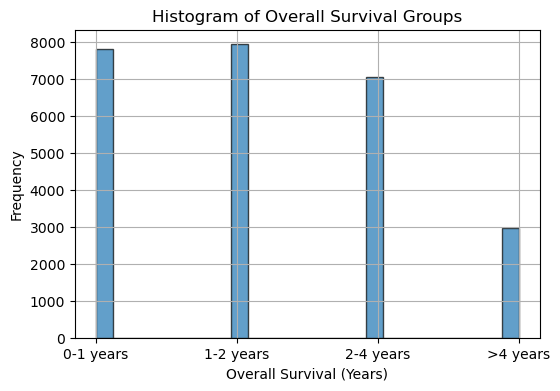

In [389]:
#plot new distribution
plt.figure(figsize=(6, 4))  
plt.hist(df_3['Year Group'], bins=25, edgecolor='k', alpha=0.7)  
plt.title(f'Histogram of Overall Survival Groups') 
plt.xlabel('Overall Survival (Years)') 
plt.ylabel('Frequency') 
plt.grid(True)
plt.show()  

**Observations**:

We can see there is a slight class imbalance for the group >4 years. This may cause use to have poor accuracy, precision and recall for this feature when training our model on imbalance data. We may need to deal with this when tuning our models to increase these metrics. This will be done during model optimization. For now we will run our baseline models classifying into one of the 4 groups above.

In [393]:
#sanity check
df_3[['Year Group', 'Overall Survival (Years)']].head(50)


Year Group  Overall Survival (Years)
Sample ID                                             
P-0000004-T01-IM3  0-1 years                  0.333333
P-0000015-T01-IM3  1-2 years                  1.166667
P-0000024-T01-IM3  2-4 years                  3.000000
P-0000025-T02-IM5  2-4 years                  3.833333
P-0000026-T01-IM3   >4 years                  6.750000
P-0000027-T01-IM3  1-2 years                  1.083333
P-0000034-T01-IM3  0-1 years                  0.083333
P-0000039-T01-IM3  0-1 years                  0.500000
P-0000041-T01-IM3  1-2 years                  1.166667
P-0000042-T01-IM3   >4 years                  4.750000
P-0000043-T02-IM3  0-1 years                  0.166667
P-0000047-T01-IM3  1-2 years                  1.750000
P-0000053-T01-IM3  0-1 years                  0.916667
P-0000056-T01-IM3  1-2 years                  1.000000
P-0000058-T01-IM3   >4 years                  5.083333
P-0000059-T01-IM3  0-1 years                  0.416667
P-0000060-T01-IM3  0-1 years                  0.166667
P-0000062-T01-IM3  1-2 years                  1.166667
P-0000063-T01-IM3   >4 years                  6.416667
P-0000065-T01-IM3  0-1 years                  0.250000
P-0000066-T02-IM5   >4 years                  6.416667
P-0000067-T02-IM5  2-4 years                  2.083333
P-0000068-T01-IM3  0-1 years                  0.166667
P-0000069-T01-IM3   >4 years                  5.916667
P-0000071-T01-IM3   >4 years                  6.583333
P-0000073-T01-IM3  2-4 years                  2.750000
P-0000076-T01-IM3   >4 years                  6.666667
P-0000081-T02-IM6  2-4 years                  2.916667
P-0000082-T01-IM3   >4 years                  6.666667
P-0000084-T01-IM3  0-1 years                  0.583333
P-0000085-T02-IM3  0-1 years                  0.916667
P-0000086-T01-IM3  0-1 years                  0.416667
P-0000088-T01-IM3  1-2 years                  1.666667
P-0000092-T01-IM3  0-1 years                  0.333333
P-0000096-T01-IM3  1-2 years                  1.500000
P-0000098-T01-IM3   >4 years                  6.750000
P-0000102-T02-IM3  2-4 years                  2.333333
P-0000103-T01-IM3  2-4 years                  2.333333
P-0000104-T01-IM3  2-4 years                  3.000000
P-0000105-T01-IM3  0-1 years                  0.500000
P-0000106-T01-IM3  0-1 years                  0.250000
P-0000107-T01-IM3   >4 years                  6.666667
P-0000108-T01-IM3   >4 years                  6.416667
P-0000110-T01-IM3   >4 years                  4.000000
P-0000113-T01-IM3   >4 years                  6.000000
P-0000114-T01-IM3  1-2 years                  1.000000
P-0000115-T01-IM3   >4 years                  6.583333
P-0000116-T01-IM3  2-4 years                  3.250000
P-0000119-T01-IM3  0-1 years                  0.166667
P-0000120-T02-IM6   >4 years                  5.083333

In [394]:
#encode the Year groups into numerical categories for modeling
df_3['Year Group Encoded'] = df_3['Year Group'].map({'0-1 years':1, '1-2 years':2, '2-4 years':3, '>4 years':4  })

In [396]:
#sanity check
df_3[['Overall Survival (Years)','Year Group', 'Year Group Encoded']].head(50)

Overall Survival (Years) Year Group Year Group Encoded
Sample ID                                                                
P-0000004-T01-IM3                  0.333333  0-1 years                  1
P-0000015-T01-IM3                  1.166667  1-2 years                  2
P-0000024-T01-IM3                  3.000000  2-4 years                  3
P-0000025-T02-IM5                  3.833333  2-4 years                  3
P-0000026-T01-IM3                  6.750000   >4 years                  4
P-0000027-T01-IM3                  1.083333  1-2 years                  2
P-0000034-T01-IM3                  0.083333  0-1 years                  1
P-0000039-T01-IM3                  0.500000  0-1 years                  1
P-0000041-T01-IM3                  1.166667  1-2 years                  2
P-0000042-T01-IM3                  4.750000   >4 years                  4
P-0000043-T02-IM3                  0.166667  0-1 years                  1
P-0000047-T01-IM3                  1.750000  1-2 years                  2
P-0000053-T01-IM3                  0.916667  0-1 years                  1
P-0000056-T01-IM3                  1.000000  1-2 years                  2
P-0000058-T01-IM3                  5.083333   >4 years                  4
P-0000059-T01-IM3                  0.416667  0-1 years                  1
P-0000060-T01-IM3                  0.166667  0-1 years                  1
P-0000062-T01-IM3                  1.166667  1-2 years                  2
P-0000063-T01-IM3                  6.416667   >4 years                  4
P-0000065-T01-IM3                  0.250000  0-1 years                  1
P-0000066-T02-IM5                  6.416667   >4 years                  4
P-0000067-T02-IM5                  2.083333  2-4 years                  3
P-0000068-T01-IM3                  0.166667  0-1 years                  1
P-0000069-T01-IM3                  5.916667   >4 years                  4
P-0000071-T01-IM3                  6.583333   >4 years                  4
P-0000073-T01-IM3                  2.750000  2-4 years                  3
P-0000076-T01-IM3                  6.666667   >4 years                  4
P-0000081-T02-IM6                  2.916667  2-4 years                  3
P-0000082-T01-IM3                  6.666667   >4 years                  4
P-0000084-T01-IM3                  0.583333  0-1 years                  1
P-0000085-T02-IM3                  0.916667  0-1 years                  1
P-0000086-T01-IM3                  0.416667  0-1 years                  1
P-0000088-T01-IM3                  1.666667  1-2 years                  2
P-0000092-T01-IM3                  0.333333  0-1 years                  1
P-0000096-T01-IM3                  1.500000  1-2 years                  2
P-0000098-T01-IM3                  6.750000   >4 years                  4
P-0000102-T02-IM3                  2.333333  2-4 years                  3
P-0000103-T01-IM3                  2.333333  2-4 years                  3
P-0000104-T01-IM3                  3.000000  2-4 years                  3
P-0000105-T01-IM3                  0.500000  0-1 years                  1
P-0000106-T01-IM3                  0.250000  0-1 years                  1
P-0000107-T01-IM3                  6.666667   >4 years                  4
P-0000108-T01-IM3                  6.416667   >4 years                  4
P-0000110-T01-IM3                  4.000000   >4 years                  4
P-0000113-T01-IM3                  6.000000   >4 years                  4
P-0000114-T01-IM3                  1.000000  1-2 years                  2
P-0000115-T01-IM3                  6.583333   >4 years                  4
P-0000116-T01-IM3                  3.250000  2-4 years                  3
P-0000119-T01-IM3                  0.166667  0-1 years                  1
P-0000120-T02-IM6                  5.083333   >4 years                  4

In [399]:
#sanity check
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 81 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Distant Mets: Adrenal Gland            25771 non-null  int64   
 1   Distant Mets: Biliary tract            25771 non-null  int64   
 2   Distant Mets: Bladder/UT               25771 non-null  int64   
 3   Distant Mets: Bone                     25771 non-null  int64   
 4   Distant Mets: Bowel                    25771 non-null  int64   
 5   Distant Mets: Breast                   25771 non-null  int64   
 6   Distant Mets: CNS/Brain                25771 non-null  int64   
 7   Distant Mets: Distant LN               25771 non-null  int64   
 8   Distant Mets: Female Genital           25771 non-null  int64   
 9   Distant Mets: Head and Neck            25771 non-null  int64   
 10  Distant Mets: Intra-Abdominal      

## Conclusions <a class="anchor" id="conclusions"></a>

Now are data is ready for the first iterations of model fitting.

We will save a copy of the EDA csv and move onto modeling

In [397]:
#save to csv
df_3.to_csv('/Users/RahimKaba/Desktop/Cancer_Survivability_Predictor/Data/cancer_data_EDA_FeatureEngineer.csv')

In [398]:
#copy df
df_4 = df_3.copy()

In [400]:
#drop the original and transformed targets, leaving us with just Year Group Encoded as our target
cols_to_drop = ['Overall Survival (Months)','Overall Survival (Years)', 'Year Group']
df_4.drop(columns=cols_to_drop, inplace=True)

In [401]:
#sanity check
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 78 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Distant Mets: Adrenal Gland            25771 non-null  int64   
 1   Distant Mets: Biliary tract            25771 non-null  int64   
 2   Distant Mets: Bladder/UT               25771 non-null  int64   
 3   Distant Mets: Bone                     25771 non-null  int64   
 4   Distant Mets: Bowel                    25771 non-null  int64   
 5   Distant Mets: Breast                   25771 non-null  int64   
 6   Distant Mets: CNS/Brain                25771 non-null  int64   
 7   Distant Mets: Distant LN               25771 non-null  int64   
 8   Distant Mets: Female Genital           25771 non-null  int64   
 9   Distant Mets: Head and Neck            25771 non-null  int64   
 10  Distant Mets: Intra-Abdominal      

In [402]:
#save to csv
df_4.to_csv('/Users/RahimKaba/Desktop/Cancer_Survivability_Predictor/Data/cancer_data_EDA_FeatureEngineer_test.csv')

Next I will move on to more Feature Engineering while doing my first iterations of my ML Modeling.